# Rutina de análisis inicial y de resultados de datos etiquetados durante QC a EMA

> Elaborado por Paola Álvarez, profesional contratista IDEAM, contrato 193 de 2023. Comentarios o inquietudes, remitir a *palvarez@ideam.gov.co* 

El análisis de resultados se incluye dentro del documento de diagnóstico de series.
___
**Librerías:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
import glob
import os
import statistics
from matplotlib.ticker import FuncFormatter
from scipy import stats

_____

## Información descriptiva de datos crudos

### Longitud y continuidad series de datos de EMA - Gráficas

In [ ]:
# Año-Mes
# Configuración de estilos para el heatmap
sns.set_theme()

def process_file(file_path):
    # Leer el archivo CSV
    df = pd.read_csv(file_path, parse_dates=['Fecha'], encoding='latin-1')
    
    # Extraer el año y el mes de la fecha
    df['Año-Mes'] = df['Fecha'].dt.strftime('%Y-%m')
    
    # Agrupar por 'Año-Mes' y contar registros
    df_grouped = df.groupby('Año-Mes').size().reset_index(name='Count')
    
    return df_grouped

# Ruta de la carpeta con los archivos CSV
folder_path = 'DatosEjemplo2'

# Diccionario para guardar datos procesados de cada archivo
data_dict = {}

# Para cada archivo en la carpeta, procesar y agregar al diccionario
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        station_code = pd.read_csv(os.path.join(folder_path, file_name))['Station'].iloc[0]
        df_temp = process_file(os.path.join(folder_path, file_name))
        df_temp['Station'] = station_code
        data_dict[station_code] = df_temp

# Combinar todos los DataFrames en uno solo
final_df = pd.concat(data_dict.values())

# Crear una tabla pivot para el heatmap
pivot_table = final_df.pivot_table(index='Station', columns='Año-Mes', values='Count', aggfunc='sum').fillna(0)

# Crear el heatmap
plt.figure(figsize=(20, len(data_dict)))
sns.heatmap(pivot_table, cmap="Blues", cbar=True, yticklabels=True, xticklabels=True)
plt.title(f"Longitud y continuidad de todas las estaciones")
plt.ylabel("Estación")
plt.xlabel("Año-Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Solo año
# Configuración de estilos para el heatmap
sns.set_theme()

def process_file(file_path):
    # Leer el archivo CSV
    df = pd.read_csv(file_path, parse_dates=['Fecha'], encoding='latin-1')
    
    # Extraer el año y el mes de la fecha
    df['Año'] = df['Fecha'].dt.strftime('%Y')
    
    # Agrupar por 'Año-Mes' y contar registros
    df_grouped = df.groupby('Año').size().reset_index(name='Count')
    
    return df_grouped

# Ruta de la carpeta con los archivos CSV
folder_path = 'DatosEjemplo2'

# Diccionario para guardar datos procesados de cada archivo
data_dict = {}

# Para cada archivo en la carpeta, procesar y agregar al diccionario
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        station_code = pd.read_csv(os.path.join(folder_path, file_name), encoding='latin-1')['Station'].iloc[0]
        df_temp = process_file(os.path.join(folder_path, file_name))
        df_temp['Station'] = station_code
        data_dict[station_code] = df_temp

# Combinar todos los DataFrames en uno solo
final_df = pd.concat(data_dict.values())

# Crear una tabla pivot para el heatmap
pivot_table = final_df.pivot_table(index='Station', columns='Año', values='Count', aggfunc='sum').fillna(0)

# Crear el heatmap
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 0.25 * len(data_dict)))
sns.heatmap(pivot_table, cmap="Blues", cbar=True, yticklabels=True, xticklabels=True)
plt.title(f"Longitud y cantidad anual de datos por estaciones")
plt.ylabel("Estación")
plt.xlabel("Año")
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
ema_df = pd.read_csv('EMA_LimSup_RP_ER_Alt_CDTGr_AO.txt', delimiter=';', encoding='latin-1')
ema_df.head()

In [ ]:
ema_df['Station'] = ema_df['Station'].str.split(',').str[0].astype('int64')

In [ ]:
ema_df['Station']

In [ ]:
ema_df['AO_Cod'] = ema_df['AO_Cod'].str.split(',').str[0]
ema_df['AO_Cod'] = pd.to_numeric(ema_df['AO_Cod'], errors='coerce')

In [ ]:
ema_df.to_csv('EMA_LimSup_RP_ER_Alt_CDTGr_AO.txt', sep=';', encoding='latin-1')

In [10]:
### Hacer heatmap de las series de datos
# Configuración de estilos para el heatmap
# Función para procesar cada archivo CSV
def process_file(file_path):
    # Leer el archivo CSV
    df = pd.read_csv(file_path, parse_dates=['Fecha'], encoding='latin-1')
    df['Station'] = df['Station'].astype('float64')
    
    # Extraer el año y el mes de la fecha
    df['Año'] = df['Fecha'].dt.year
    df['Mes'] = df['Fecha'].dt.month
    
    # Agrupar por 'Año-Mes' y contar registros
    df_grouped = df.groupby(['Año', 'Mes']).size().reset_index(name='Count')
    df_grouped['Station'] = pd.read_csv(file_path, encoding='latin-1')['Station'].iloc[0]
    
    return df_grouped

# Leer el archivo .txt
ema_df = pd.read_csv('EMA_AllInfo.txt', delimiter=';', encoding='latin-1') # Antes 'EMA_LimSup_RP_ER_Alt_CDTGr_AO.txt'

# Ruta de la carpeta con los archivos CSV
folder_path = 'RawUnmodified'

# Diccionario para guardar datos procesados de cada archivo
data_dict = {}

# Para cada archivo en la carpeta, procesar y agregar al diccionario
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        station_code = pd.read_csv(os.path.join(folder_path, file_name), encoding='latin-1')['Station'].iloc[0]
        df_temp = process_file(os.path.join(folder_path, file_name))
        df_temp['Station'] = station_code
        data_dict[station_code] = df_temp

# Combinar todos los DataFrames en uno solo
final_df = pd.concat(data_dict.values())

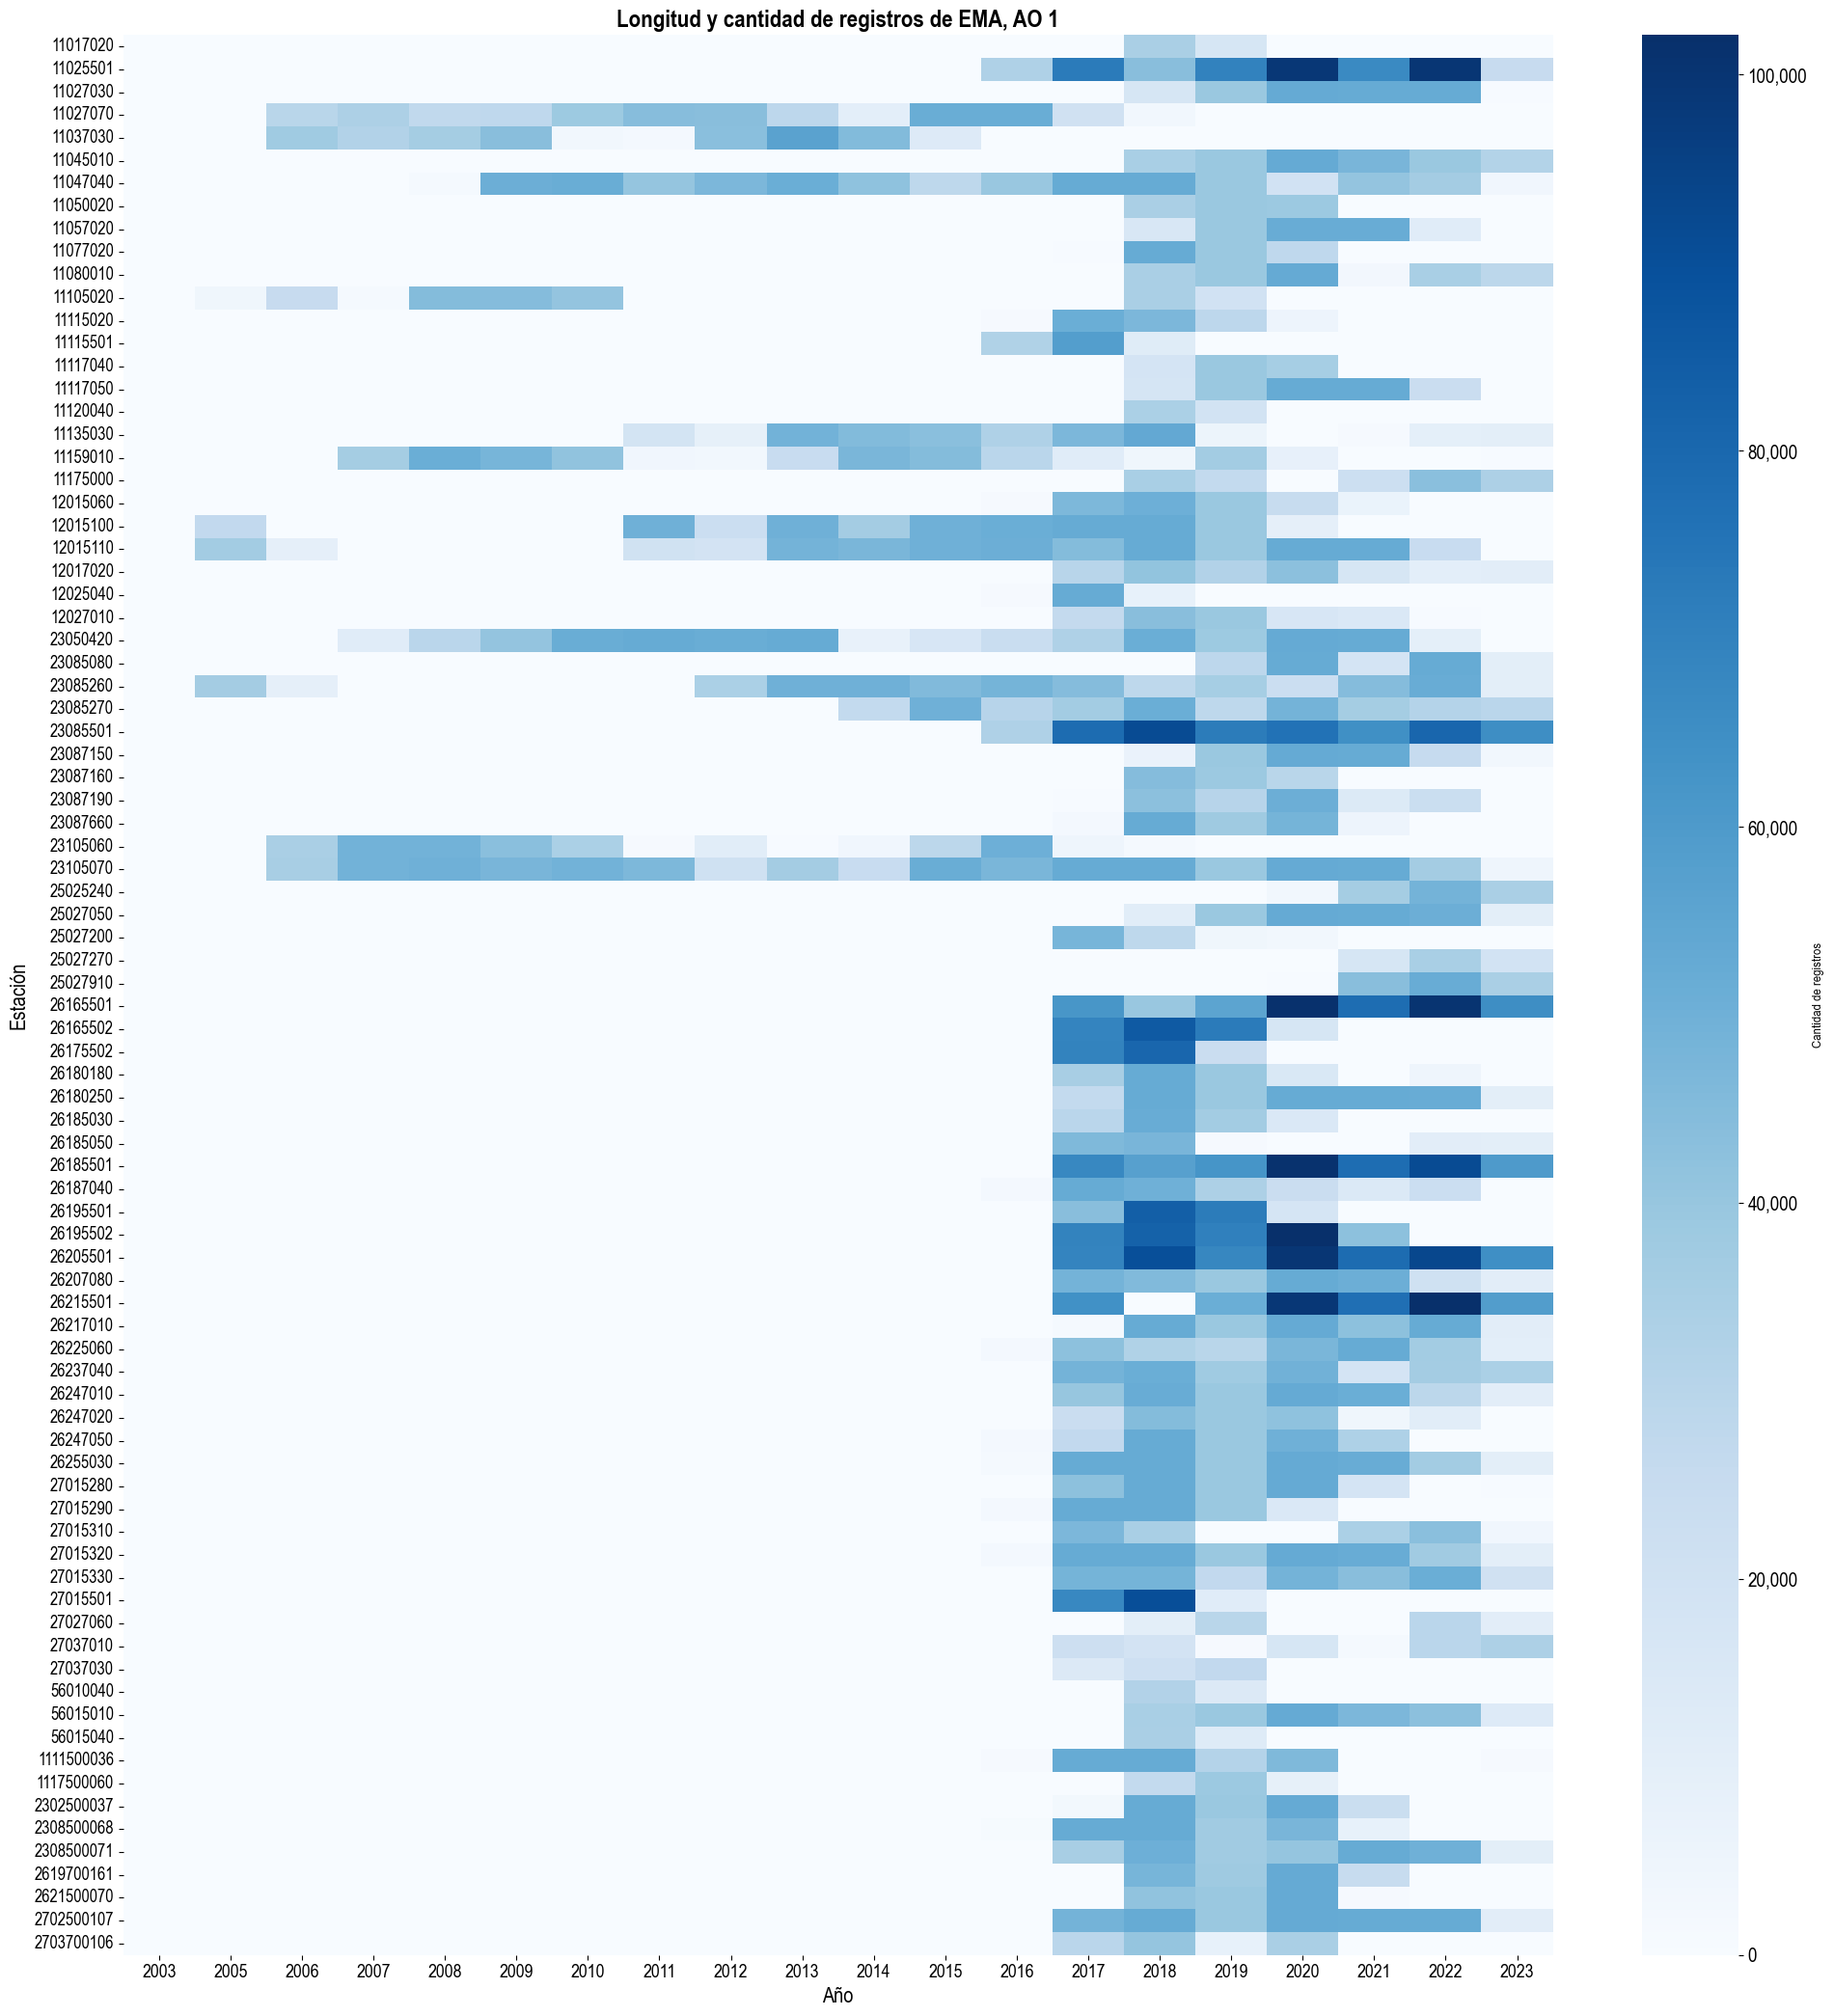

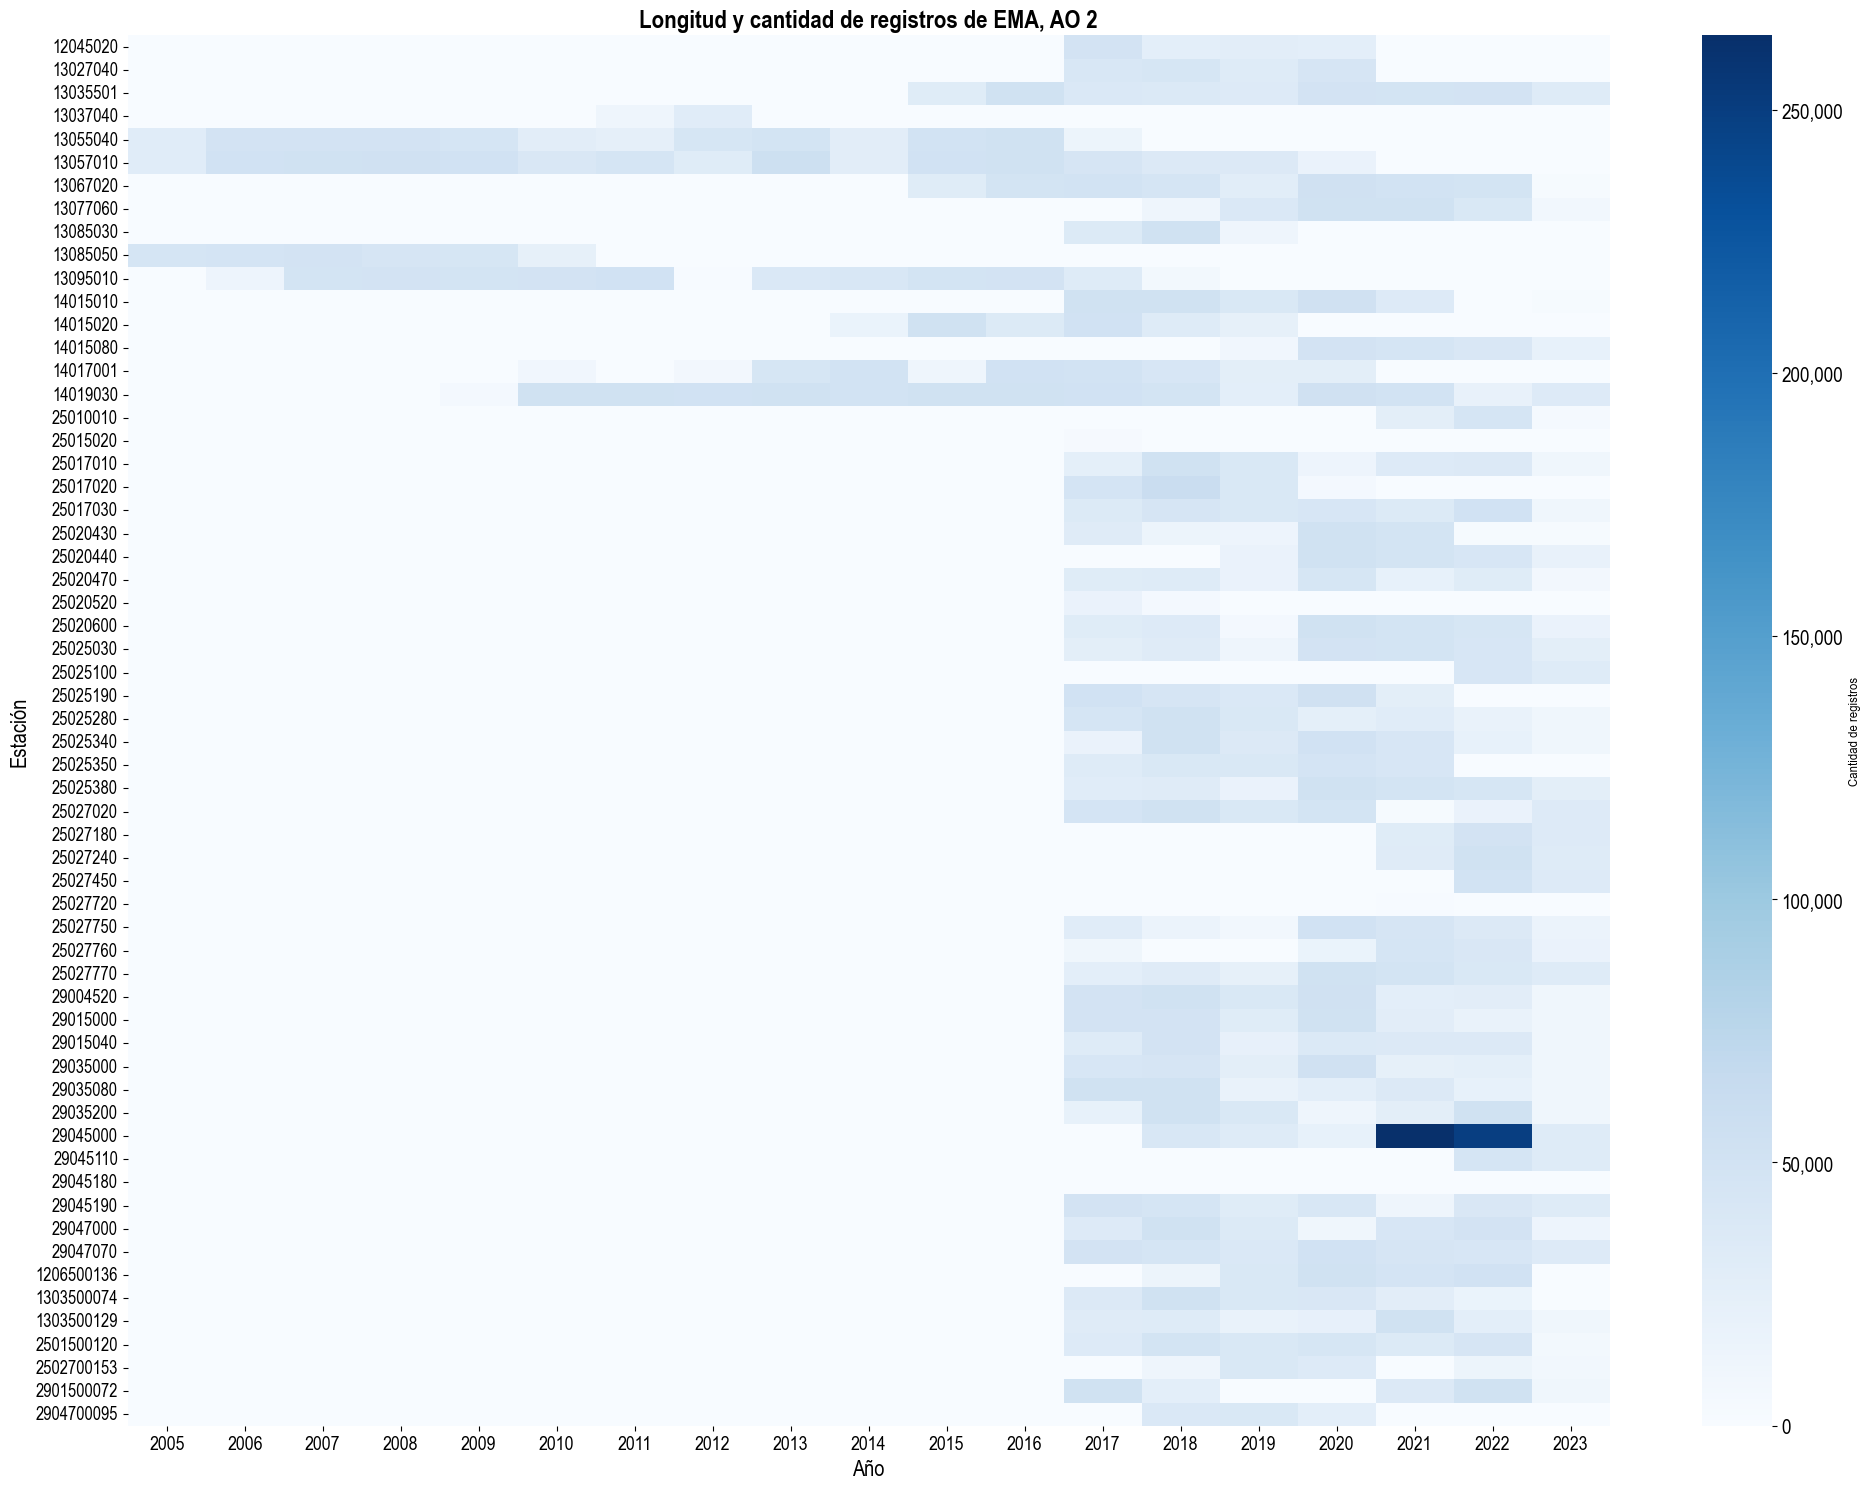

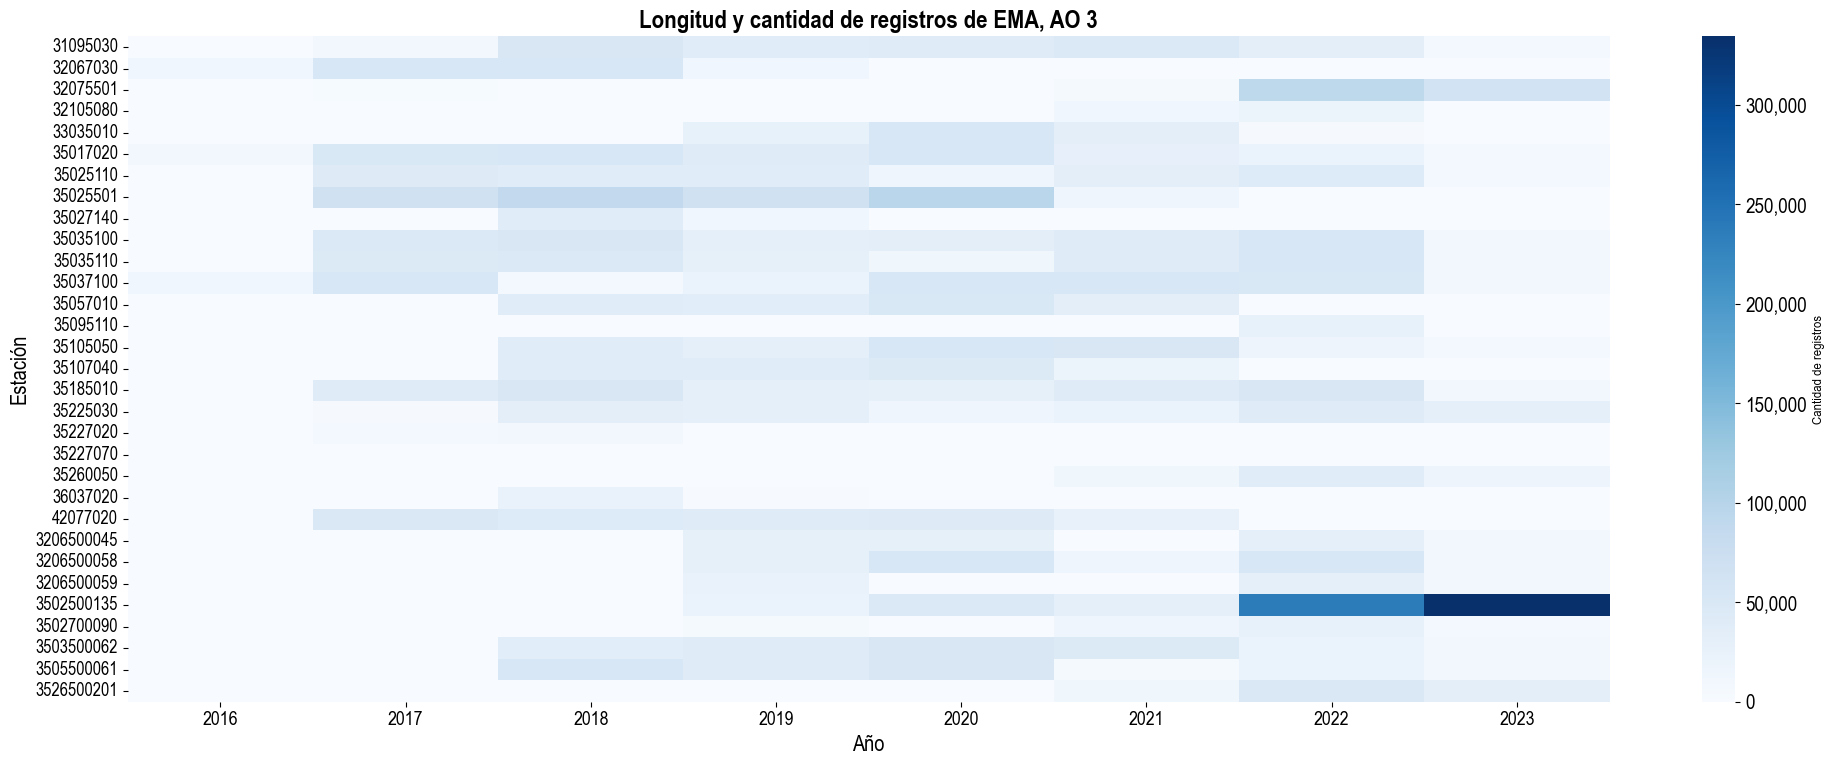

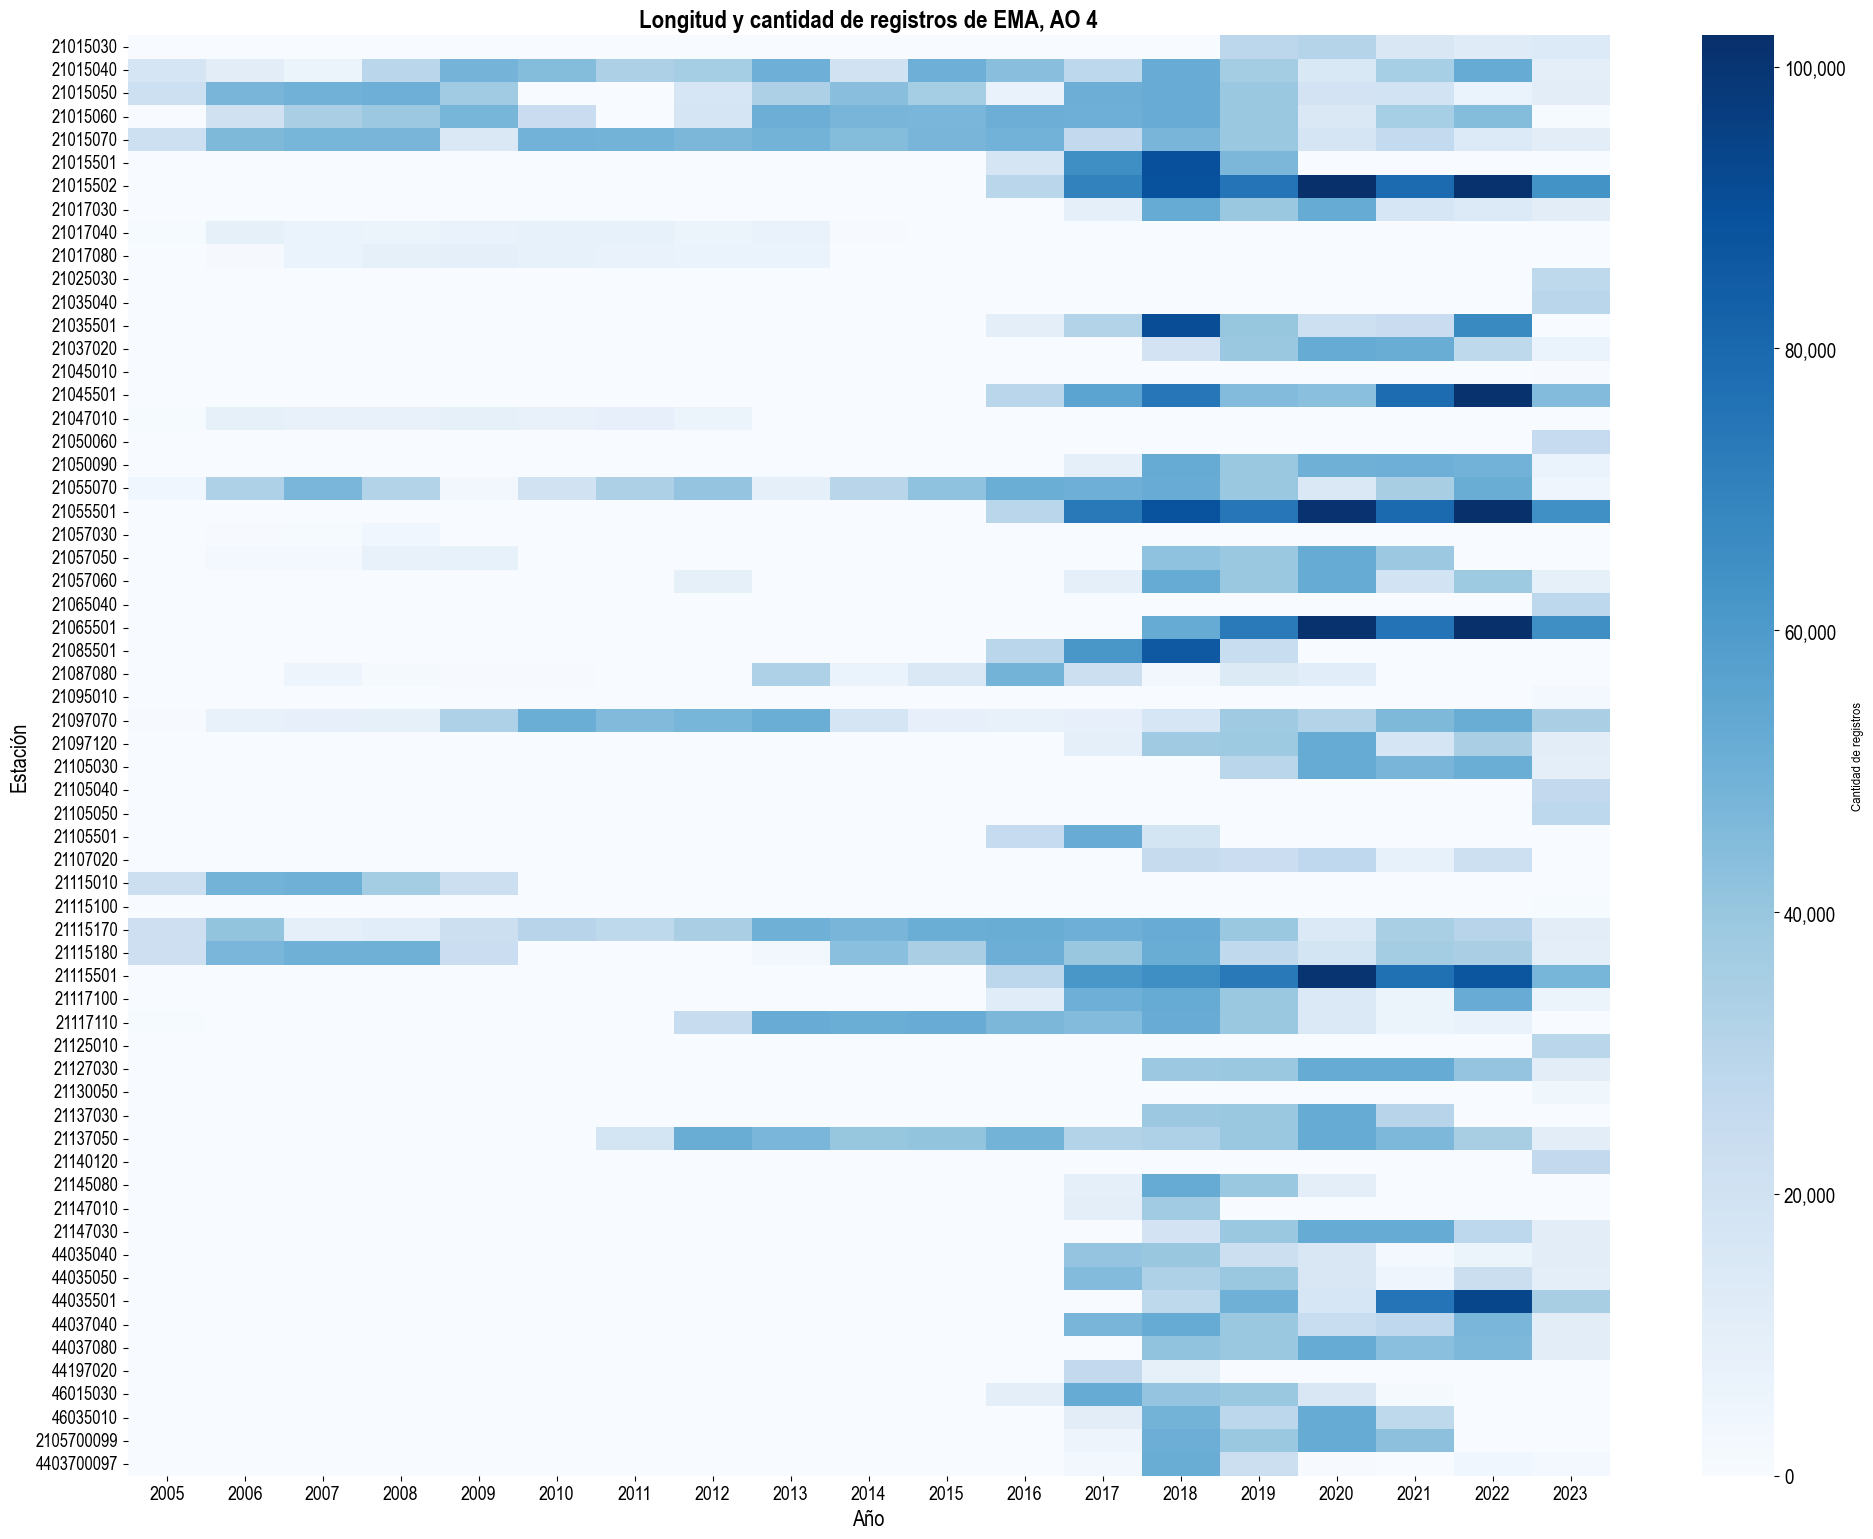

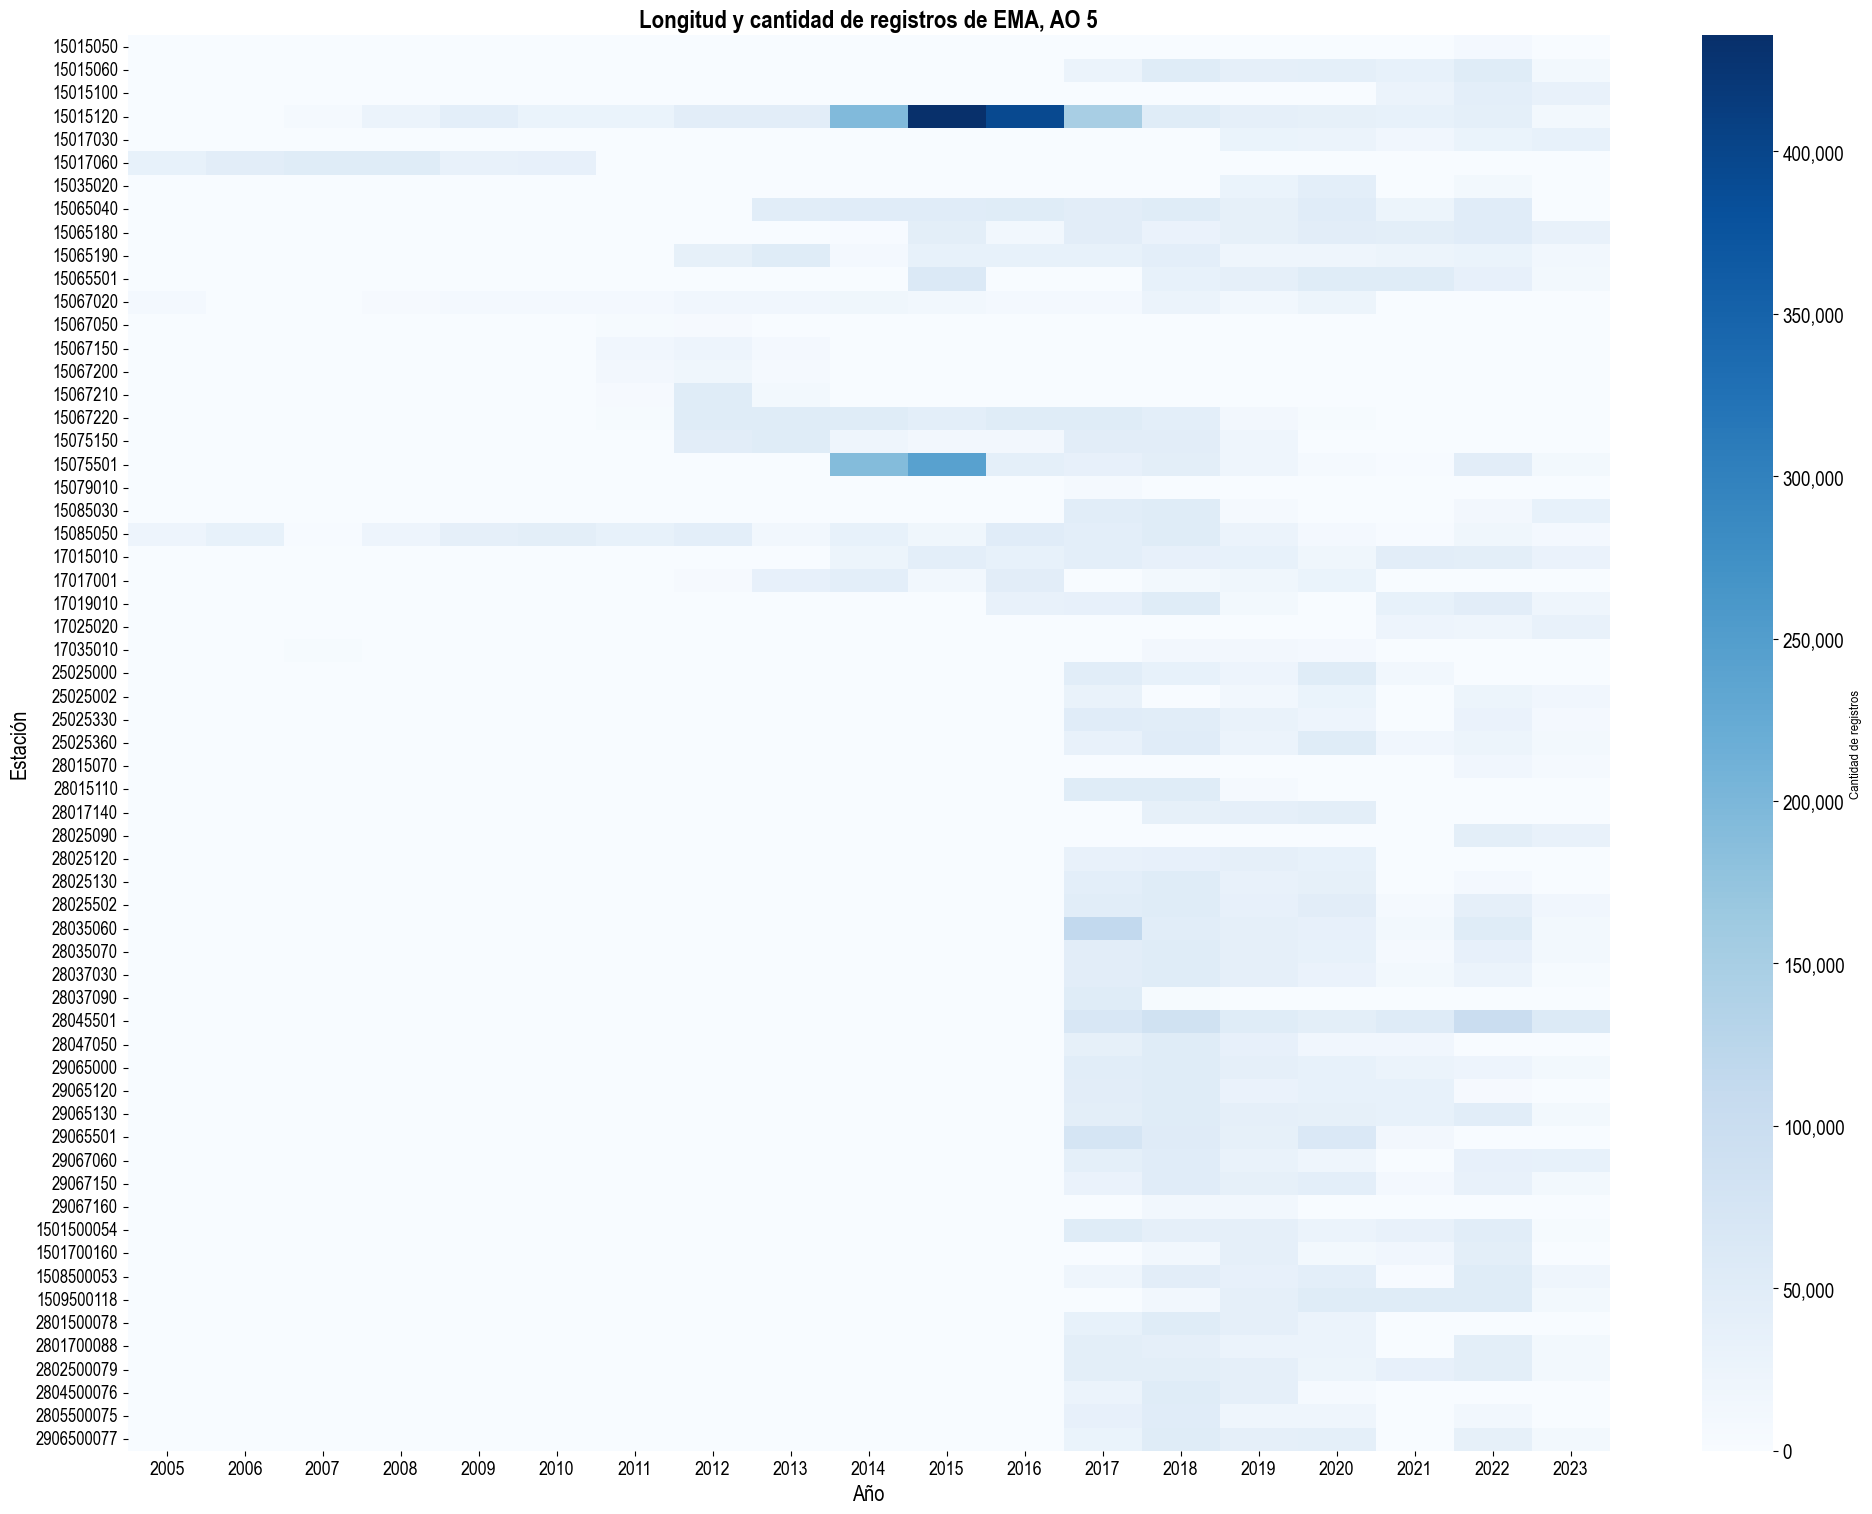

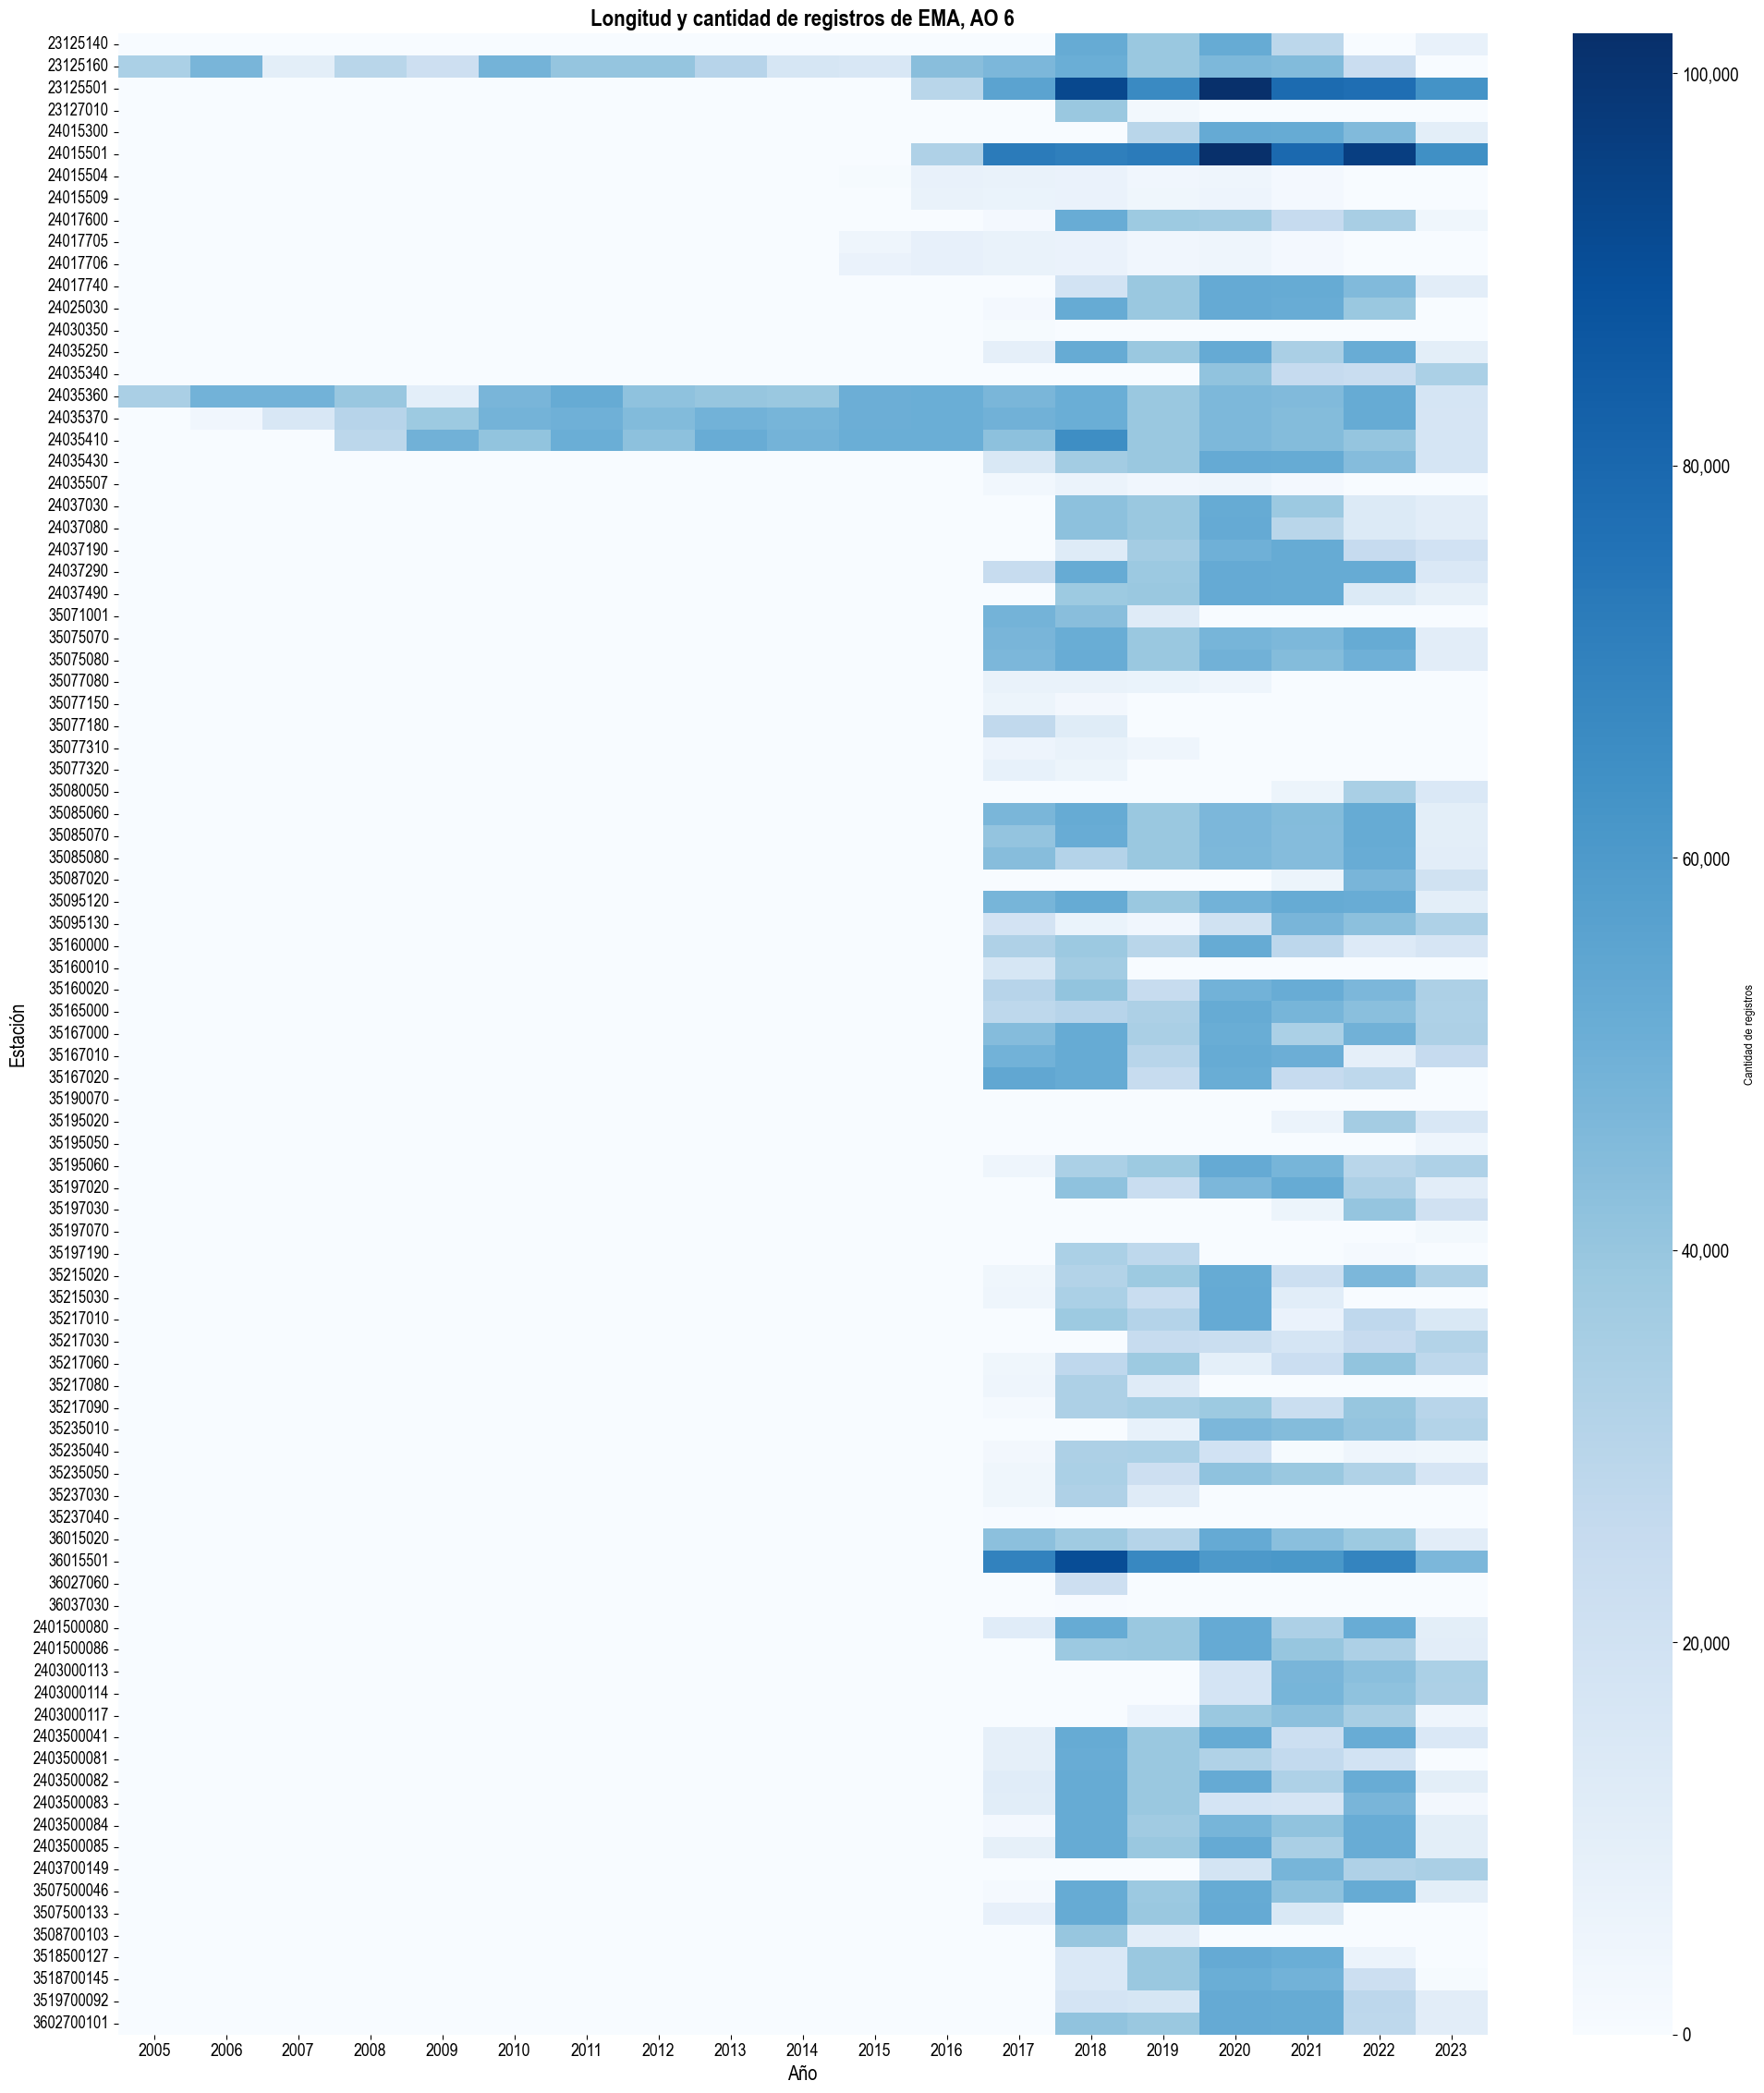

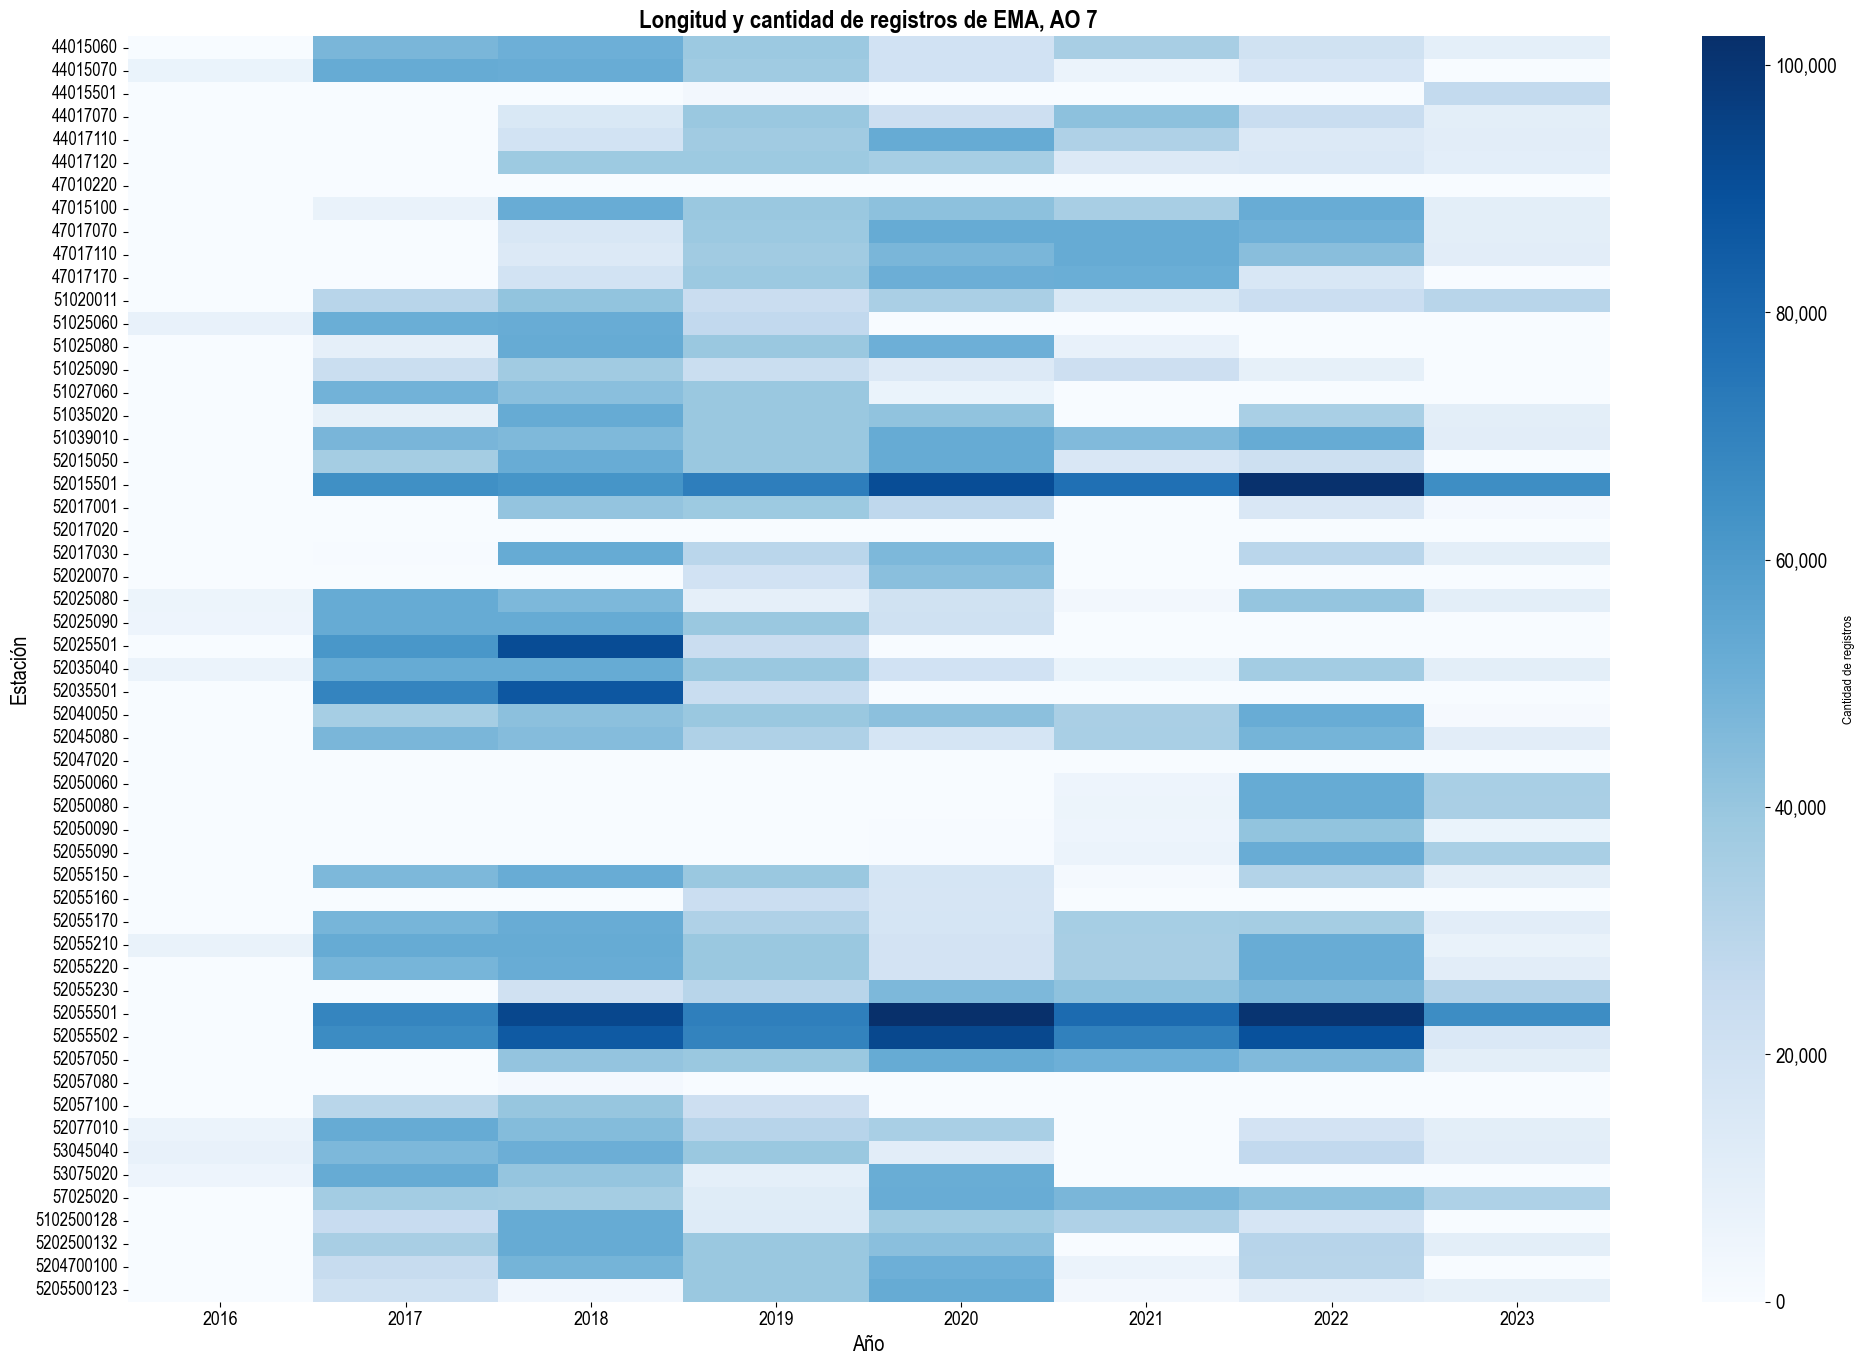

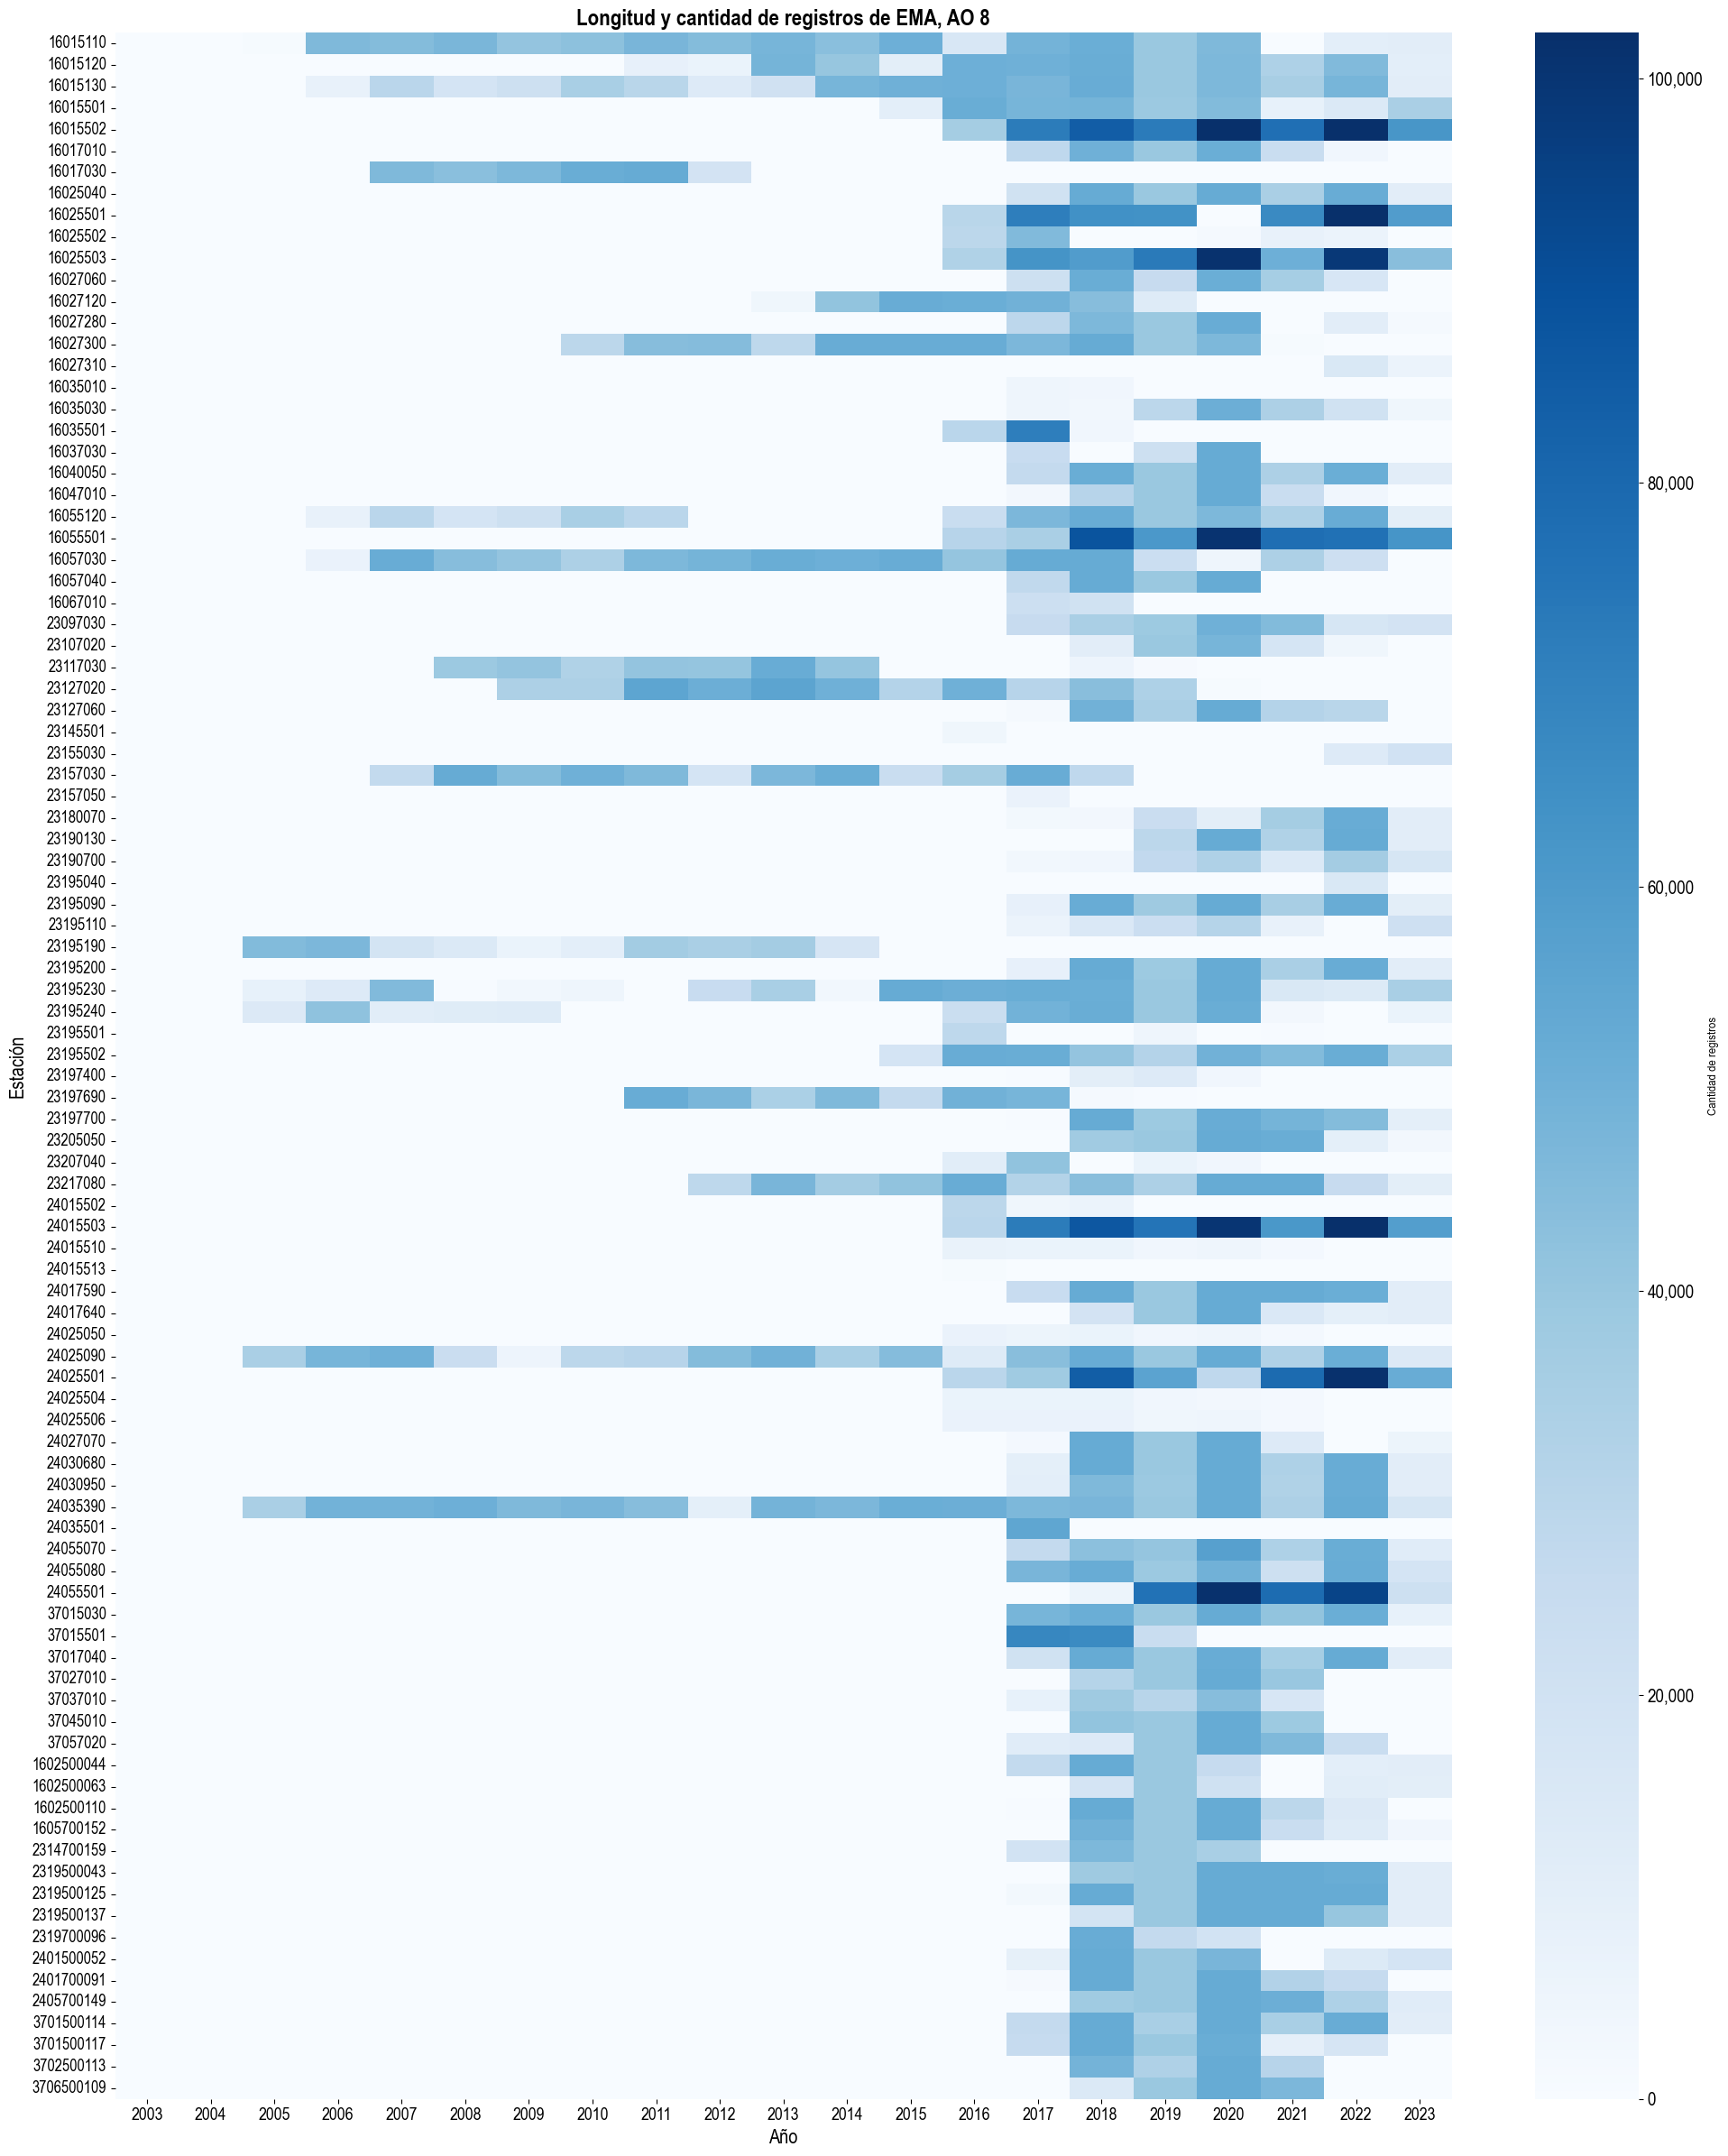

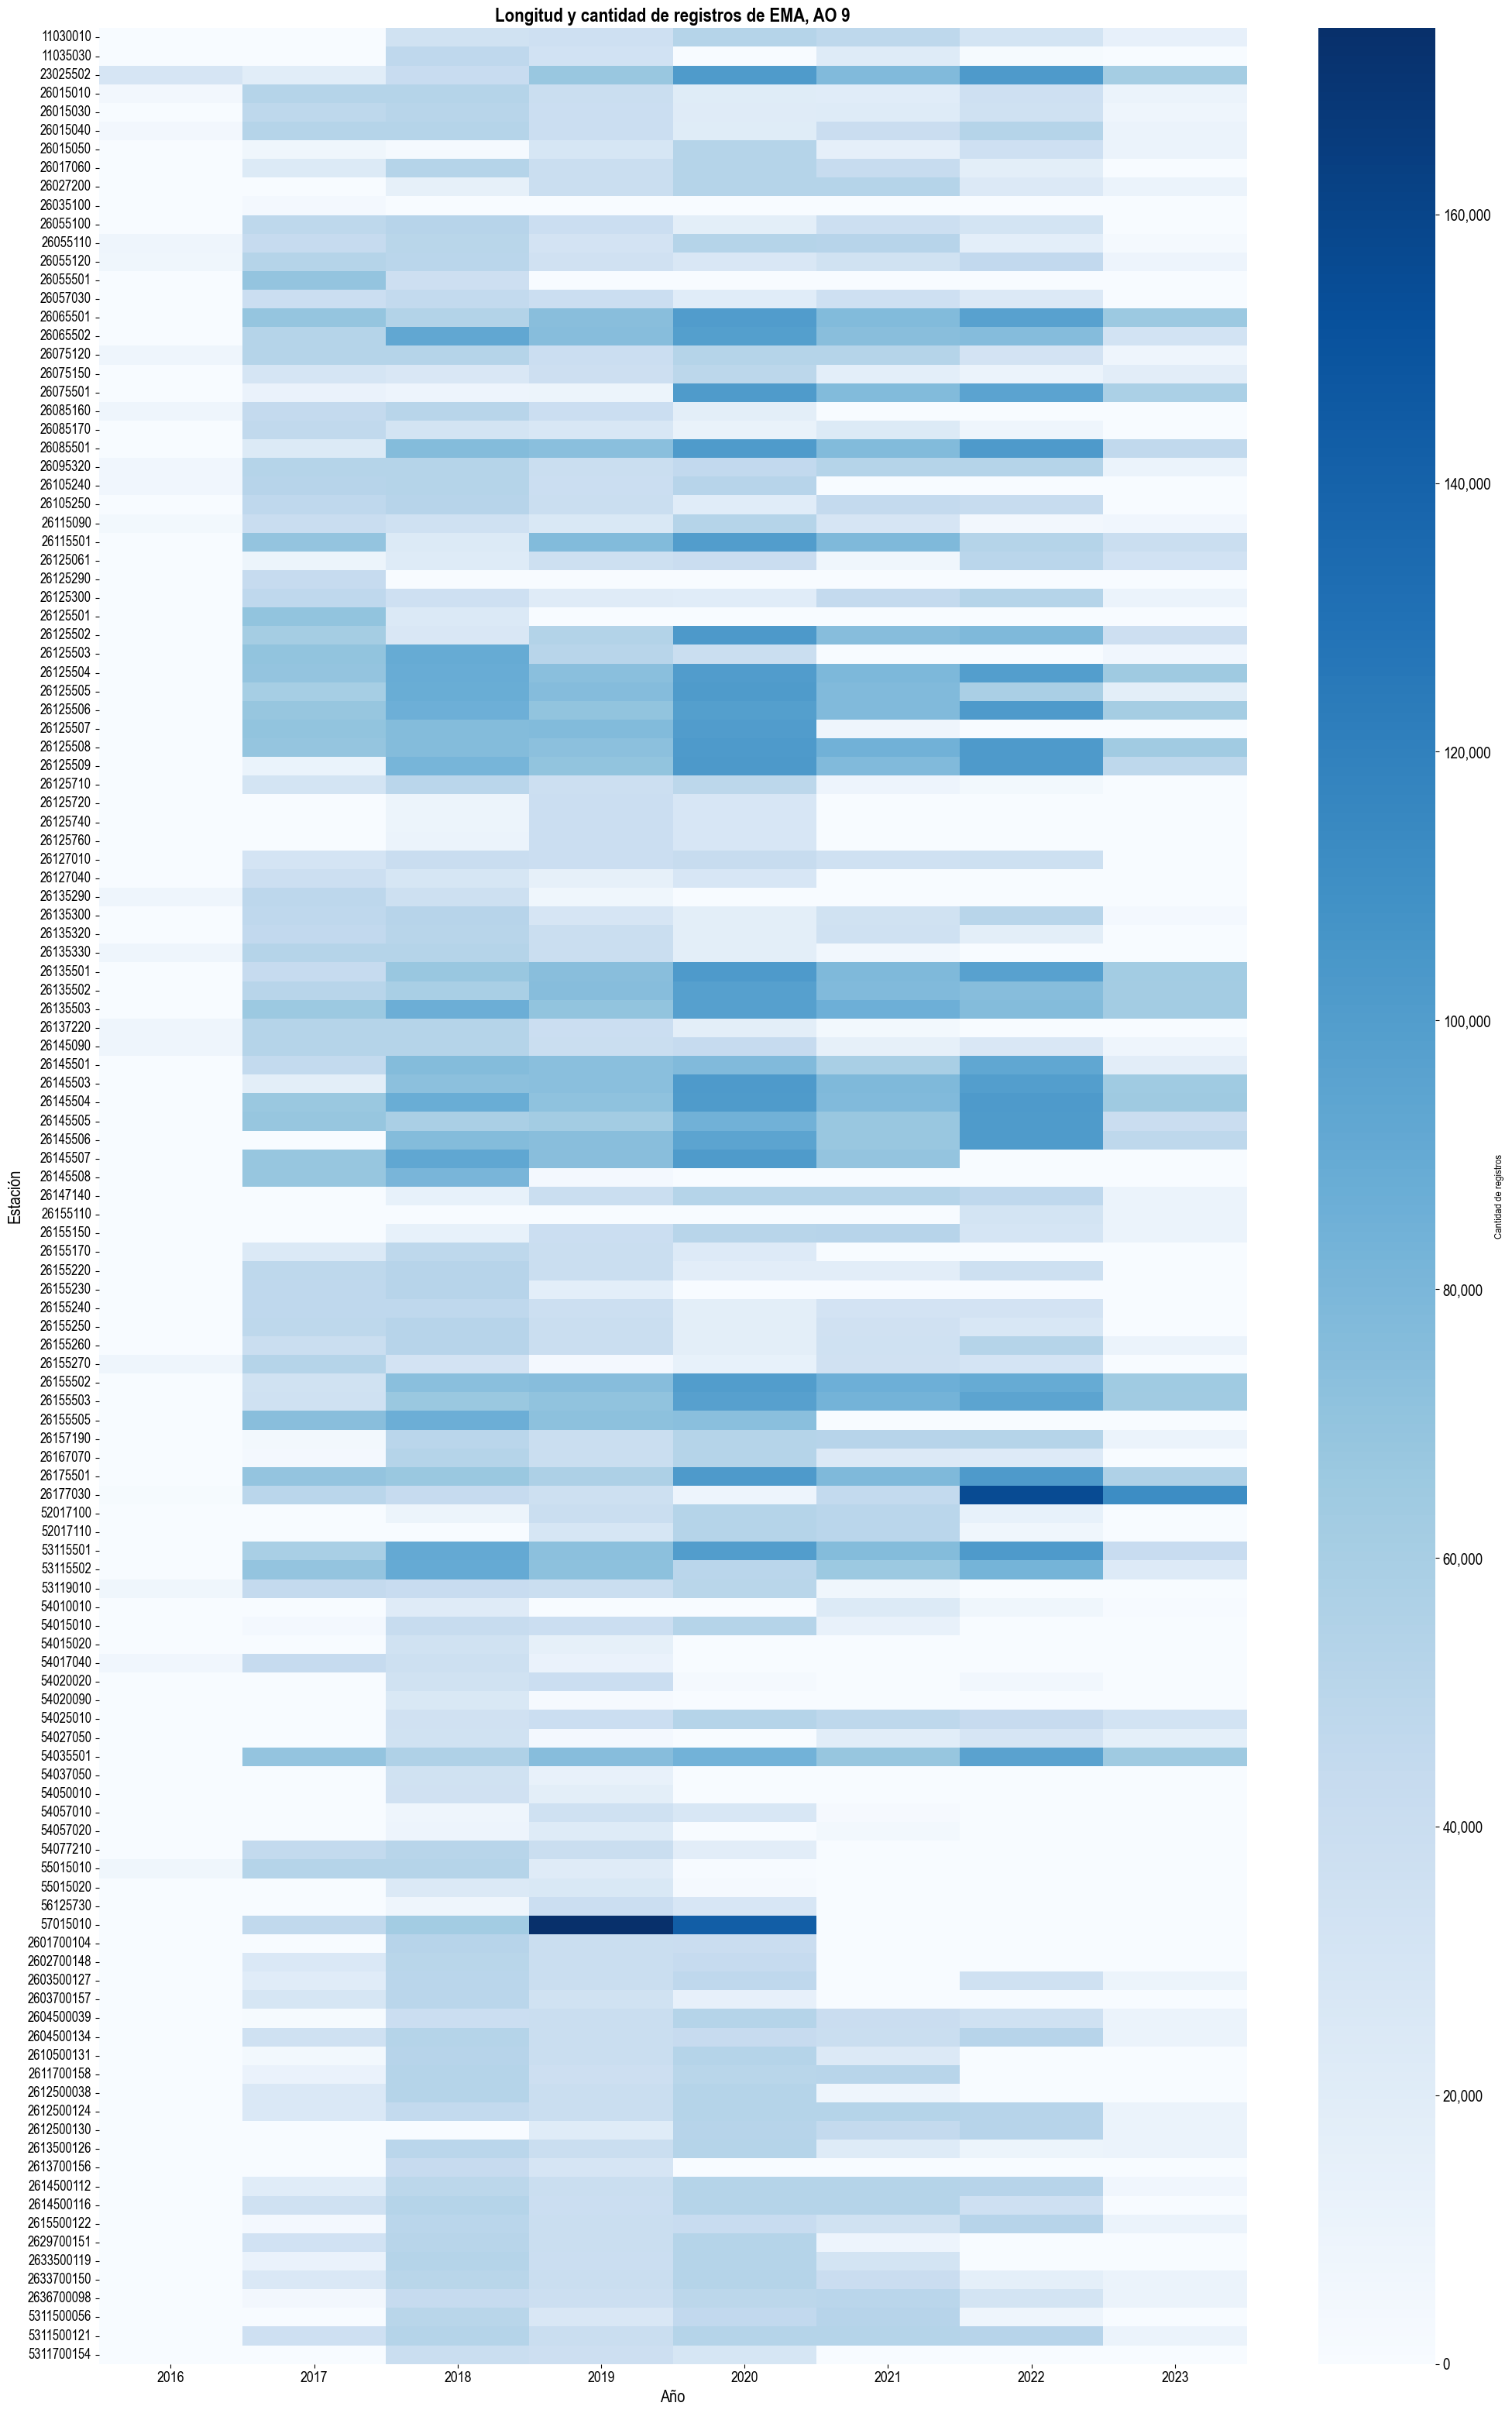

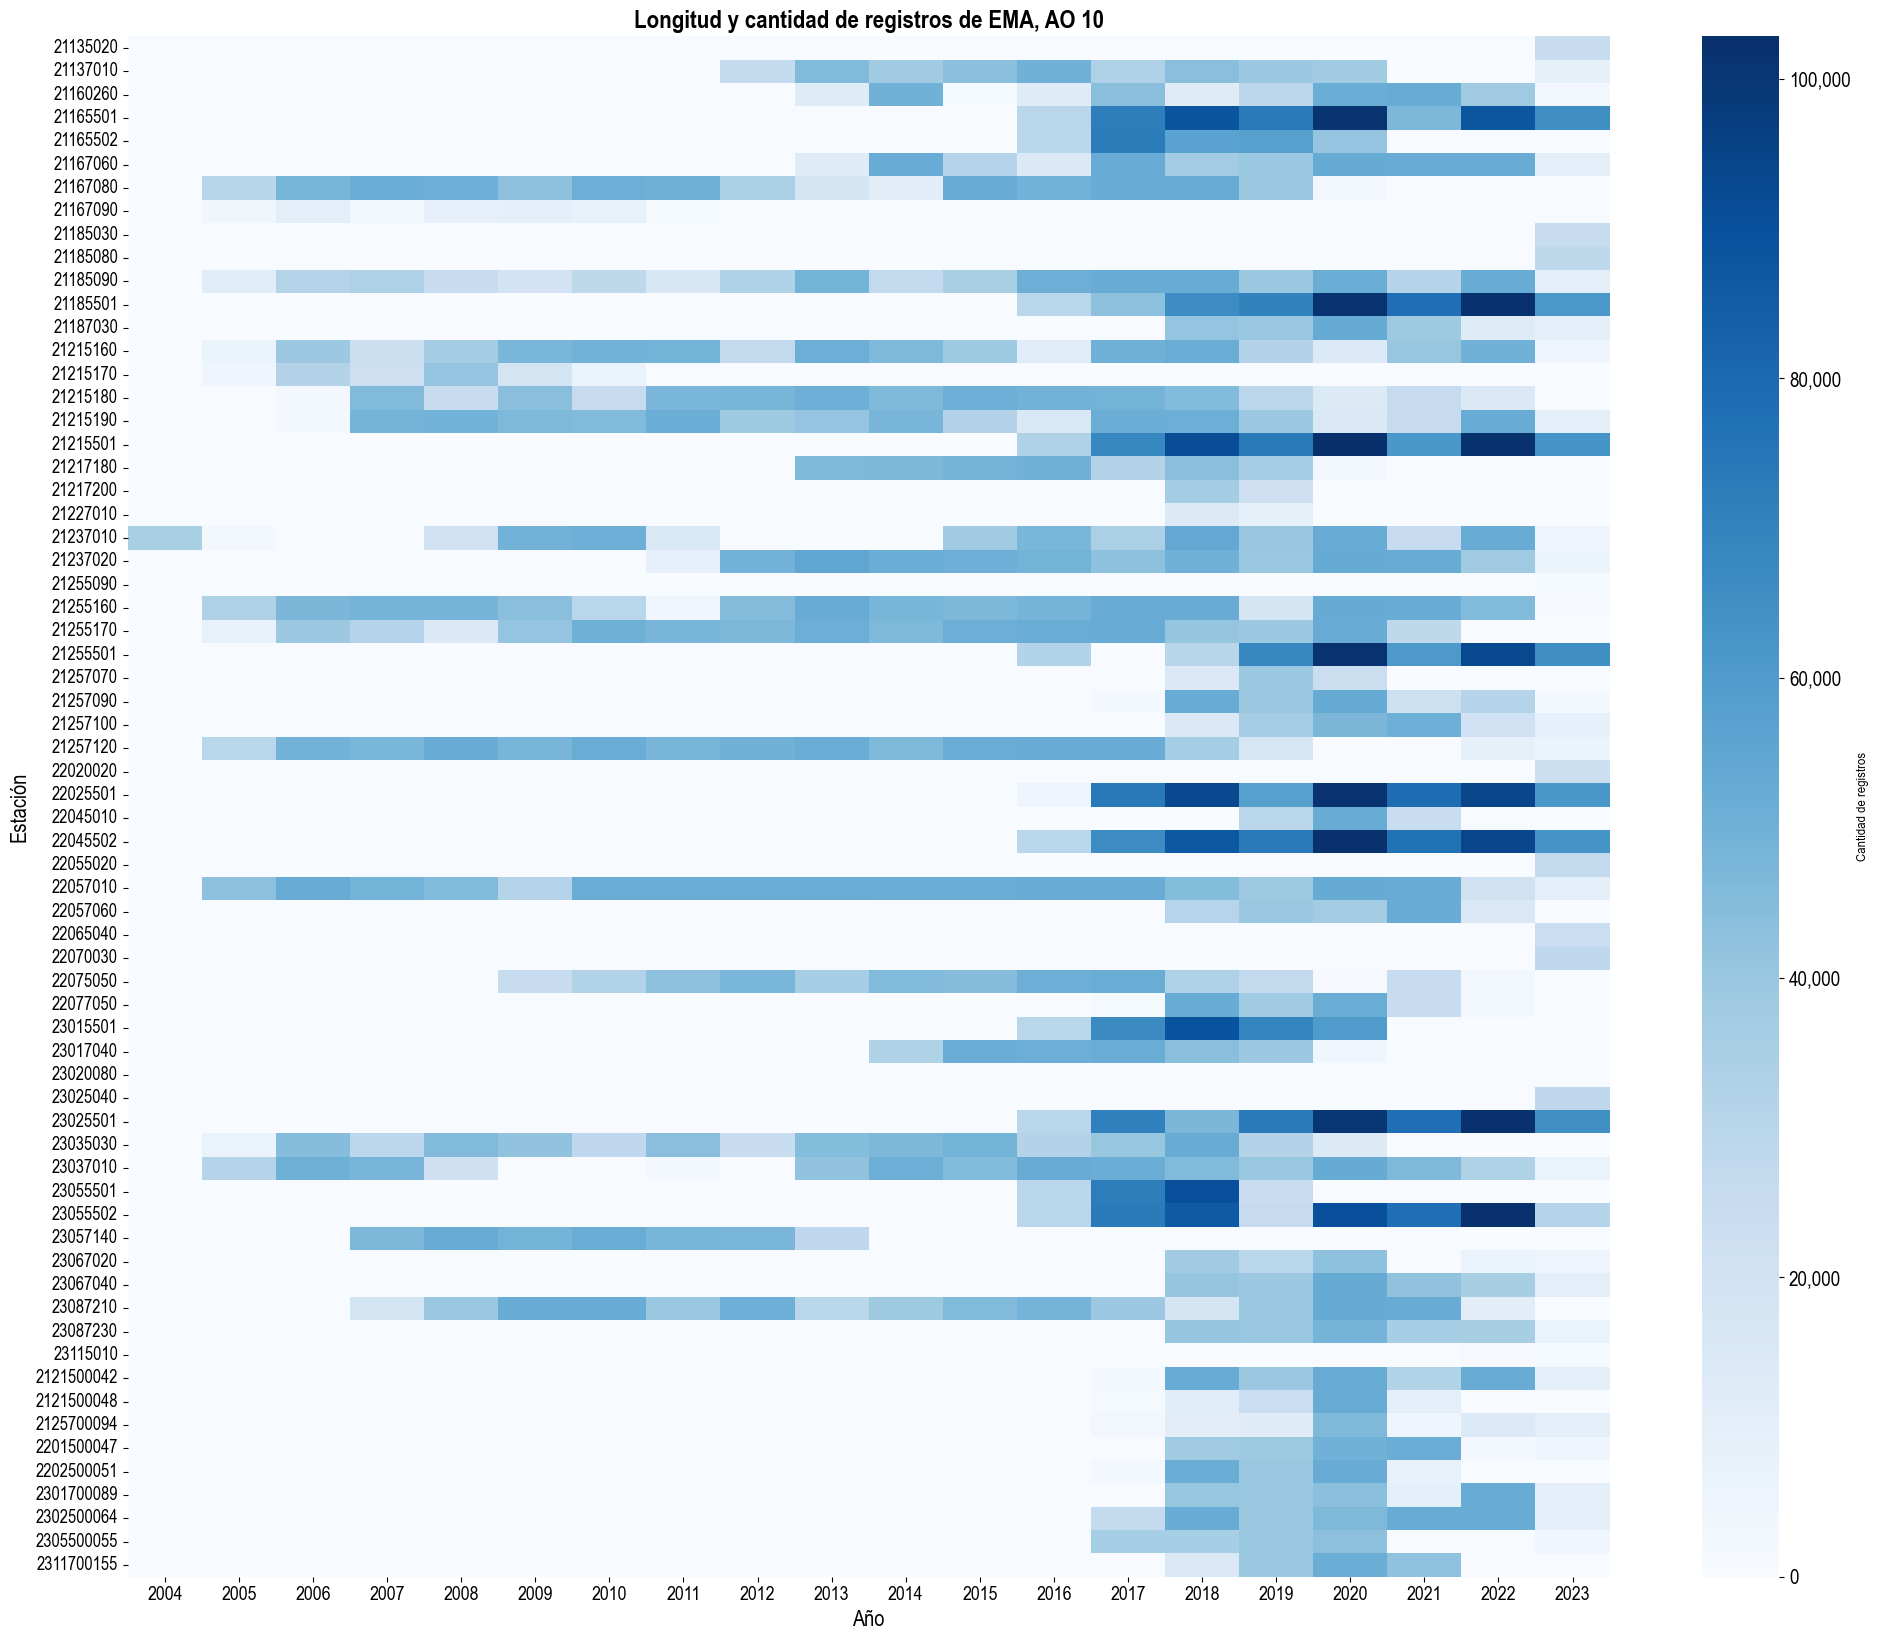

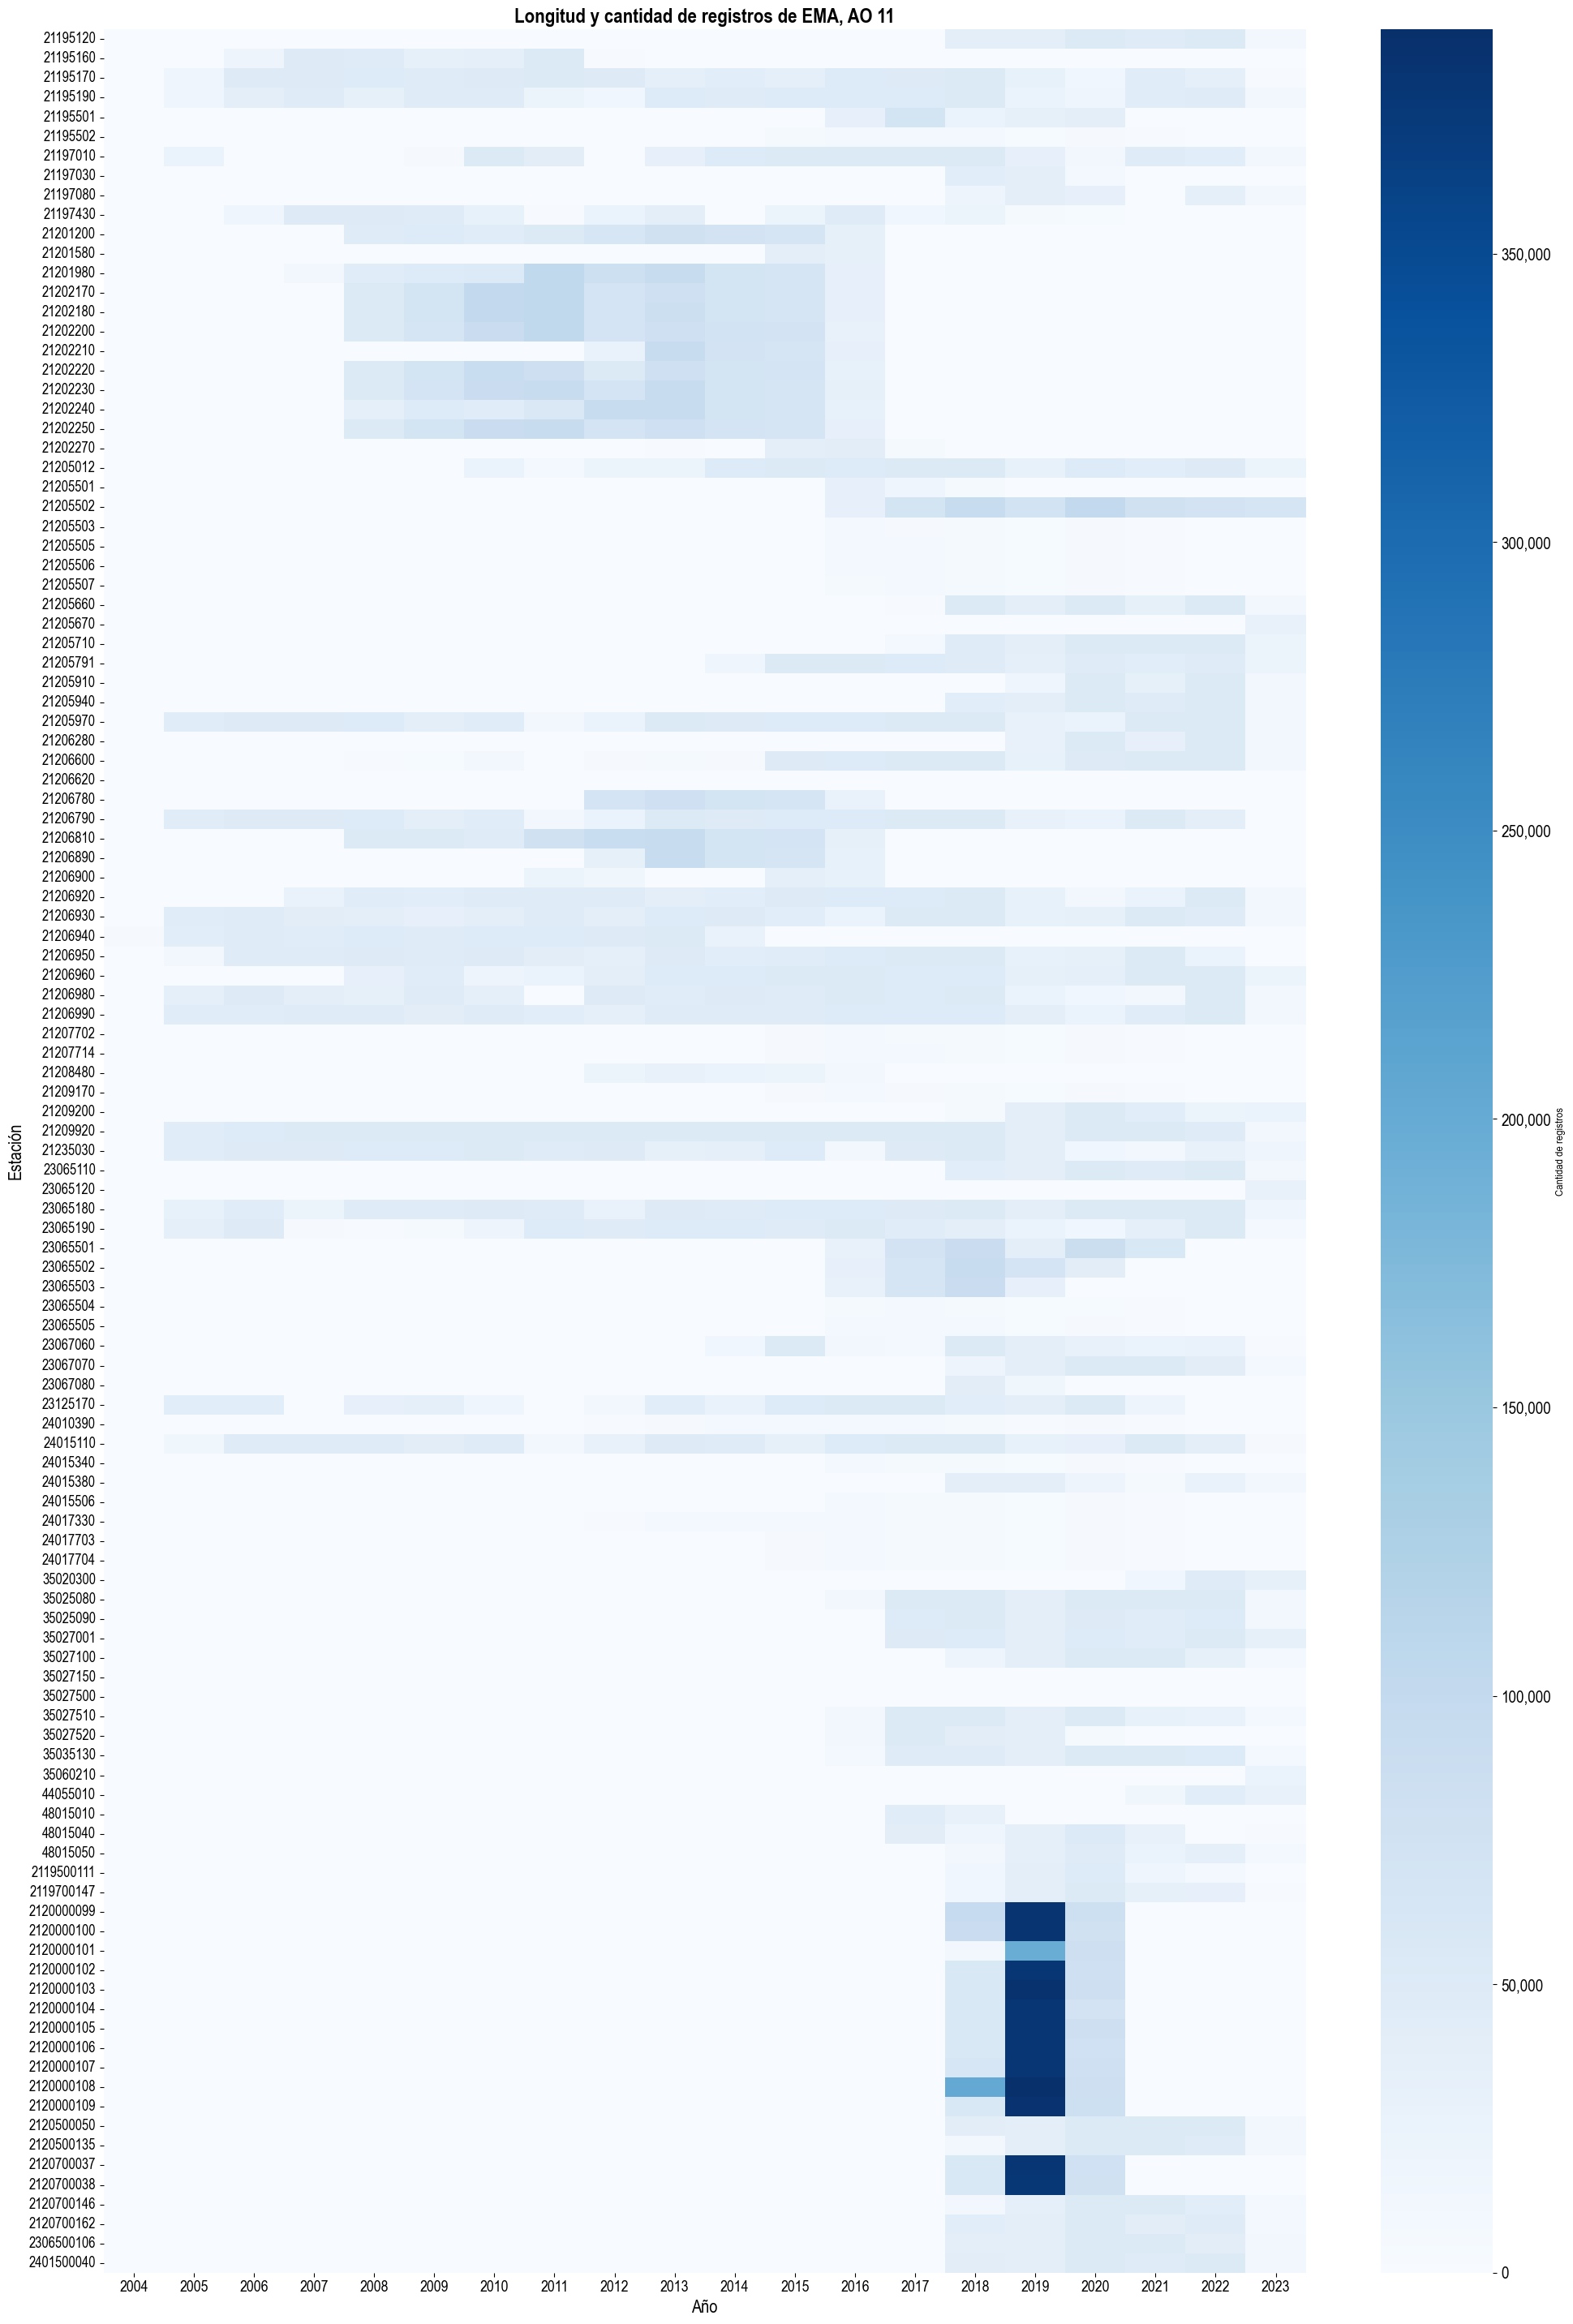

In [13]:
## Primera forma de graficar
# Merge final_df con ema_df para obtener AO_Cod para cada Station
merged_df = final_df.merge(ema_df[['Station', 'AO_Cod']], on='Station')

# Agrupar estaciones según 'AO_Cod'
grouped = merged_df.groupby('AO_Cod')['Station'].unique()

# Establecer estilo global
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.stretch'] = 'condensed'

# Para cada grupo de estaciones, hacer una gráfica
for ao_cod, stations, projects in grouped.items():
    try:
        ao_cod = int(ao_cod)  # Intentar convertir ao_cod a entero
    except (ValueError, TypeError):
        print(f"No se pudo convertir {ao_cod} a entero. Continuando con el siguiente grupo.")
        continue  # Continuar con la siguiente iteración del bucle
    df_group = merged_df[merged_df['Station'].isin(stations)]
    
    # Crear una tabla pivot sumando los registros por año
    pivot_table = df_group.pivot_table(index='Station', columns='Año', values='Count', aggfunc='sum').fillna(0)
    
    # Crear el heatmap
    plt.figure(figsize=(20, 0.25 * len(stations)))
    ax = sns.heatmap(pivot_table, cmap="Blues", cbar=True, yticklabels=True, xticklabels=True, 
                     cbar_kws={"format": '{:,}', "label": "Cantidad de registros"})

    # Ajustar la apariencia de los ticks de la colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=15, labelrotation=0)  # Cambia '12' al tamaño de fuente deseado
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    
    # Ajustes del plot
    plt.title(f"Longitud y cantidad de registros de EMA, AO {ao_cod}", 
              fontsize=18, fontweight='bold')
    plt.ylabel("Estación", fontsize=16)
    plt.xlabel("Año", fontsize=16)
    plt.yticks(rotation=0, fontsize=13)
    plt.xticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()

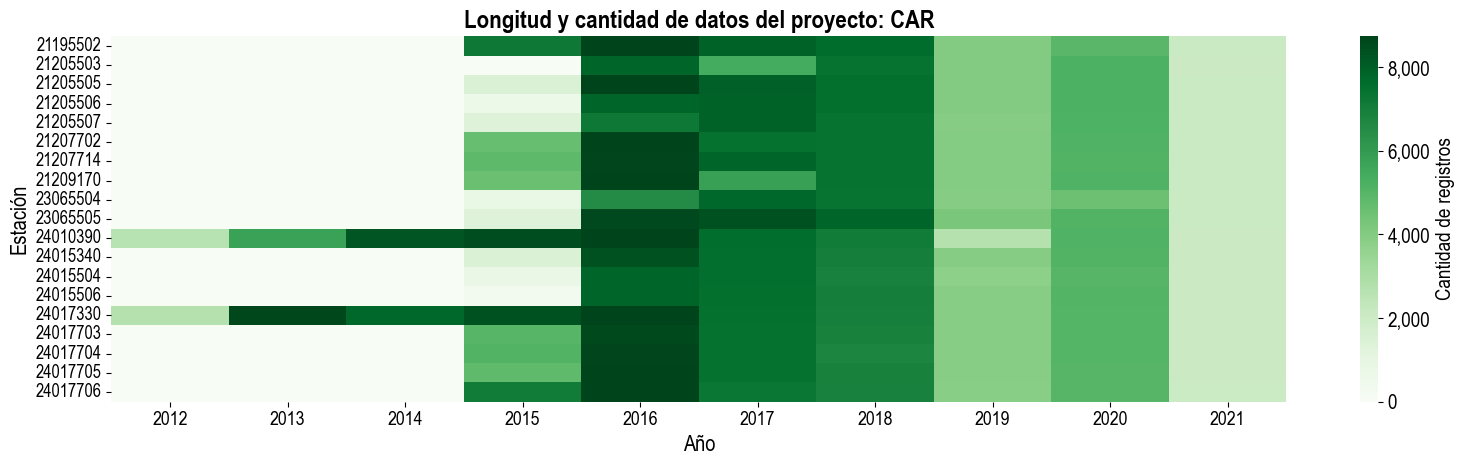

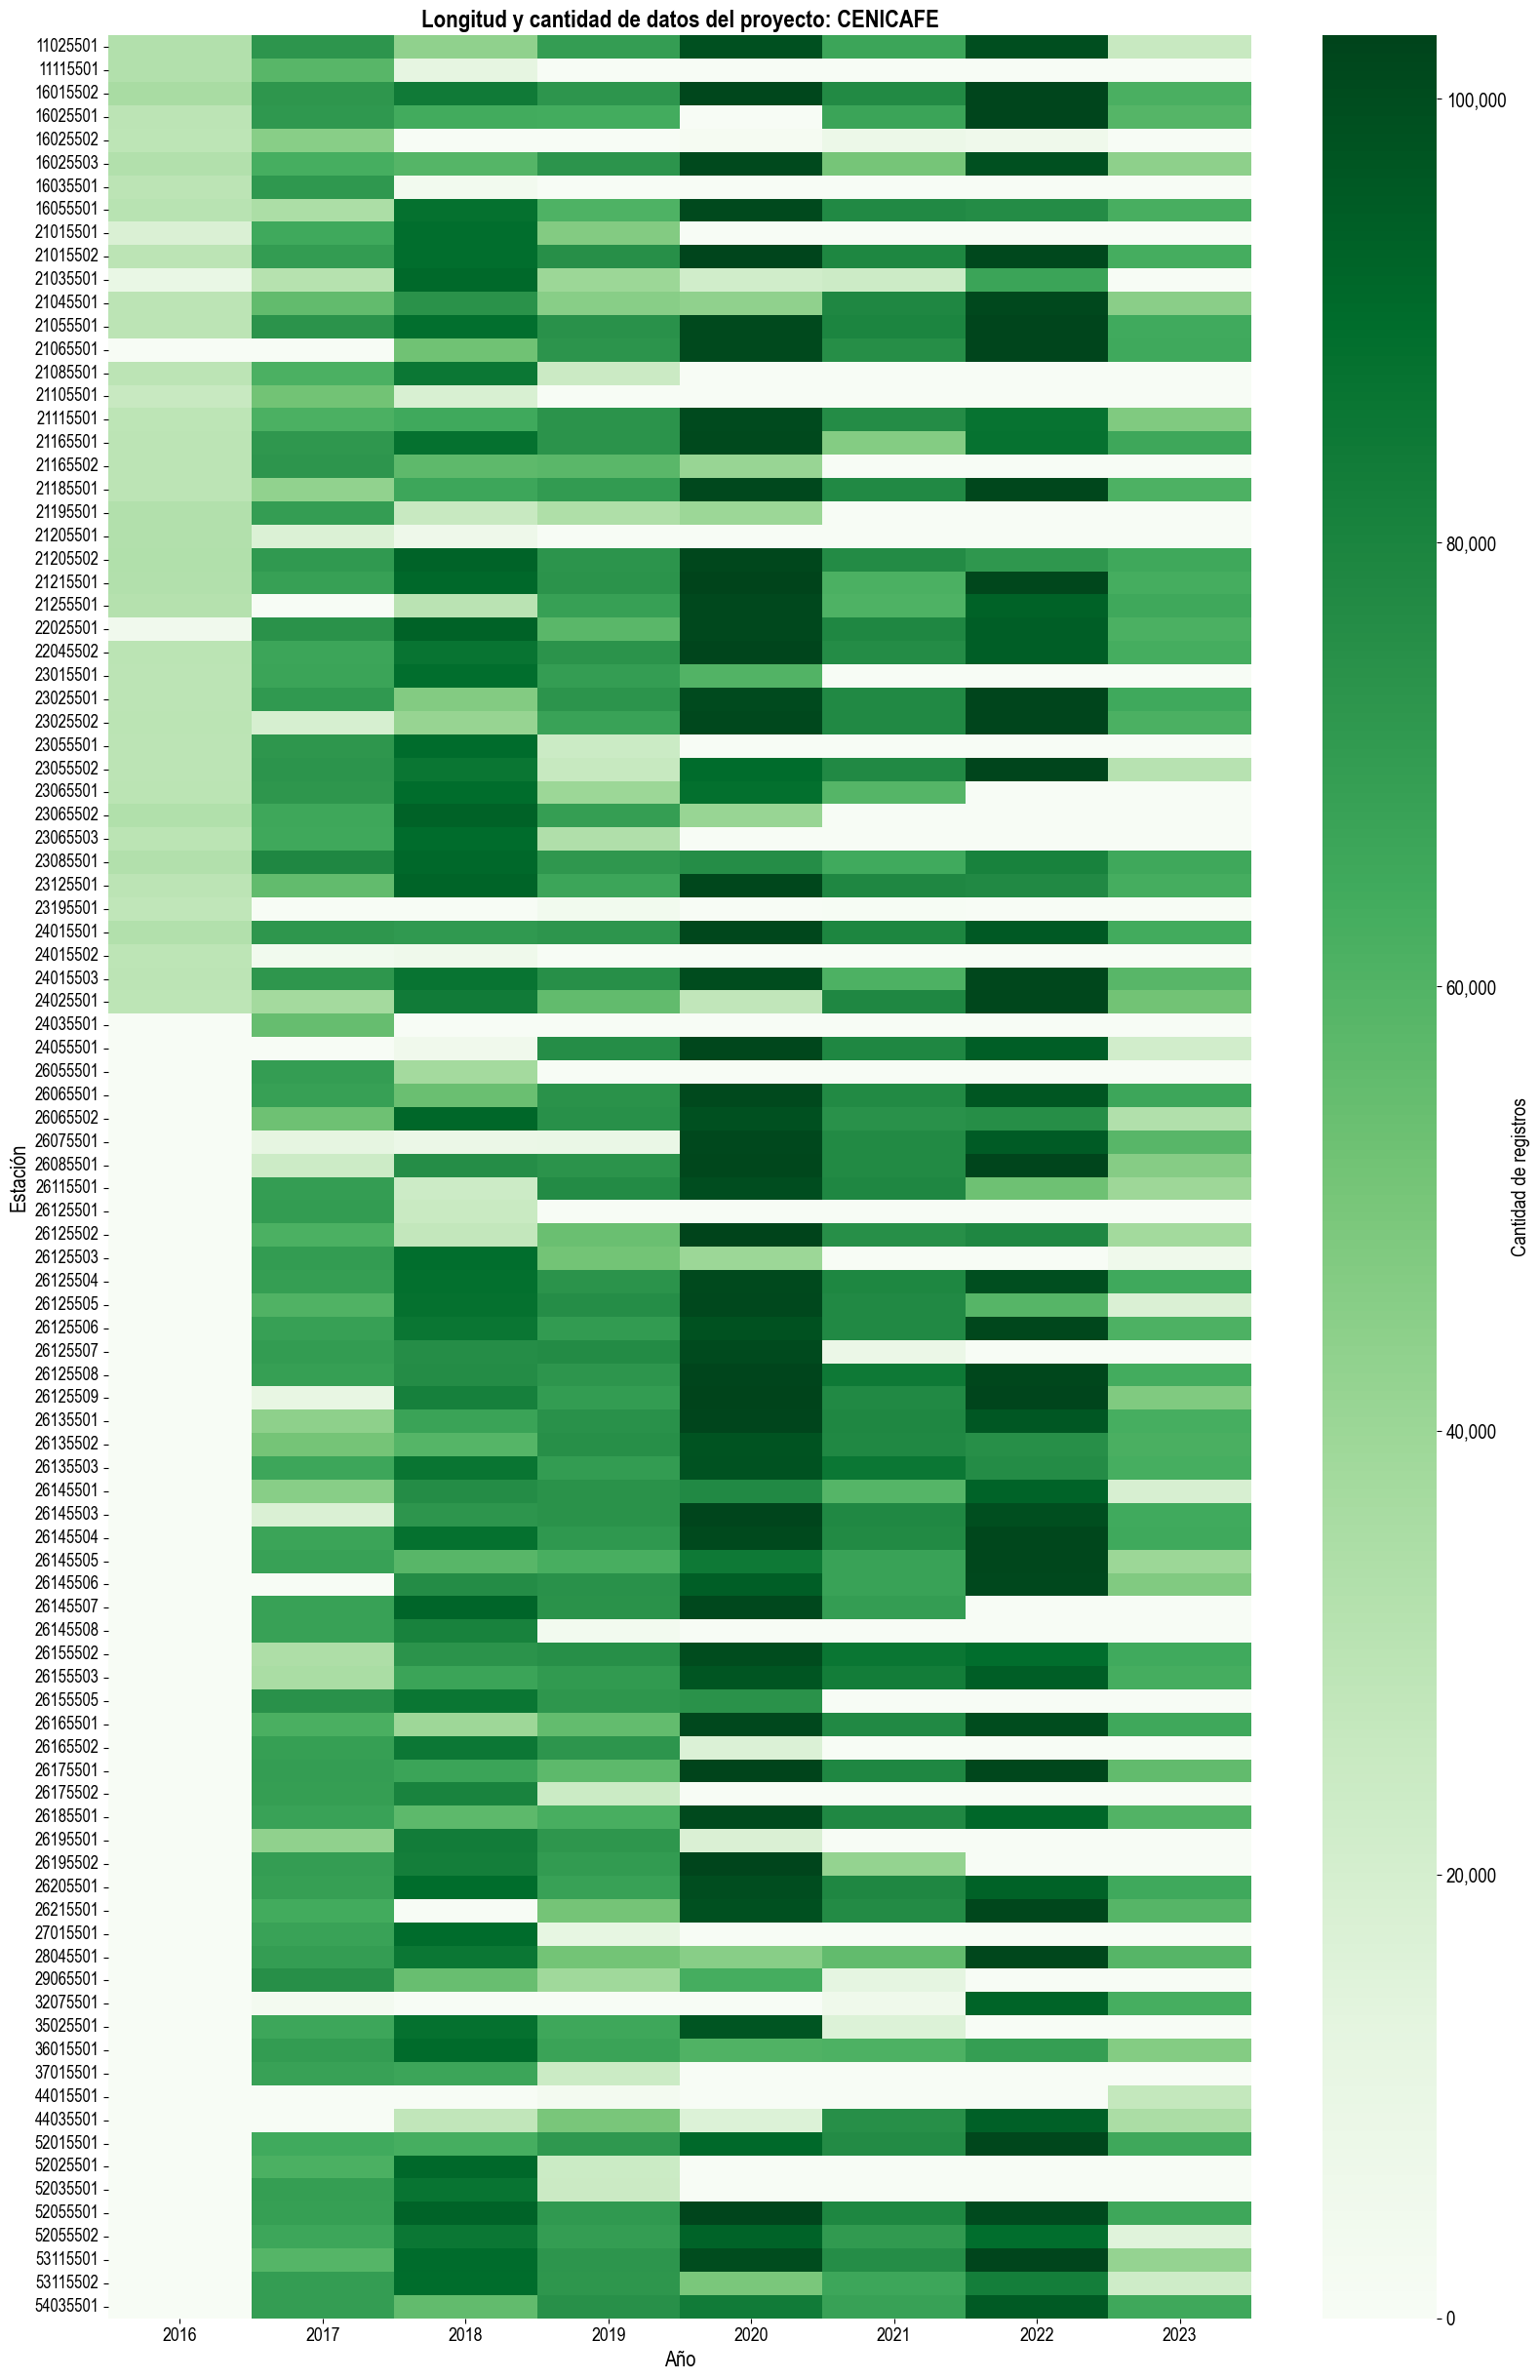

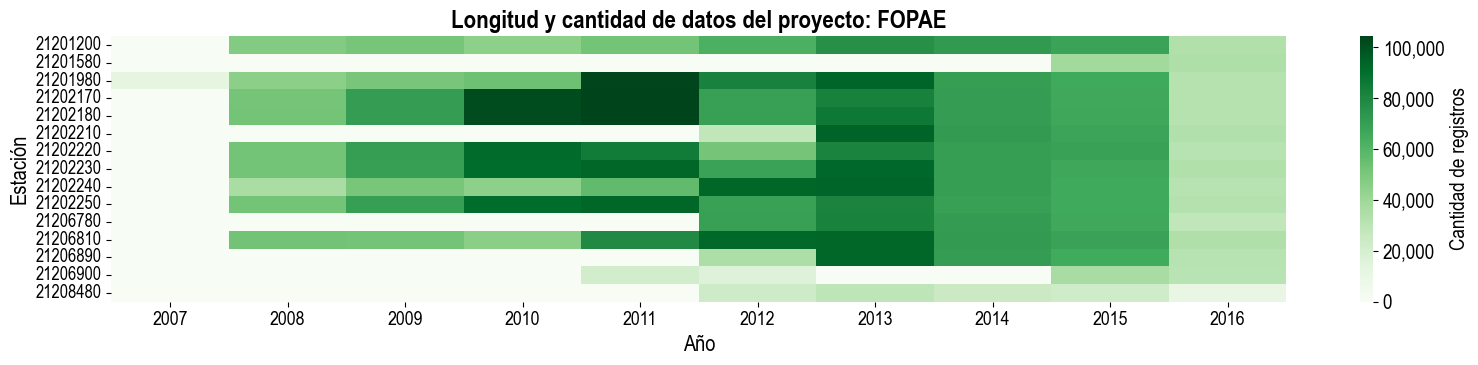

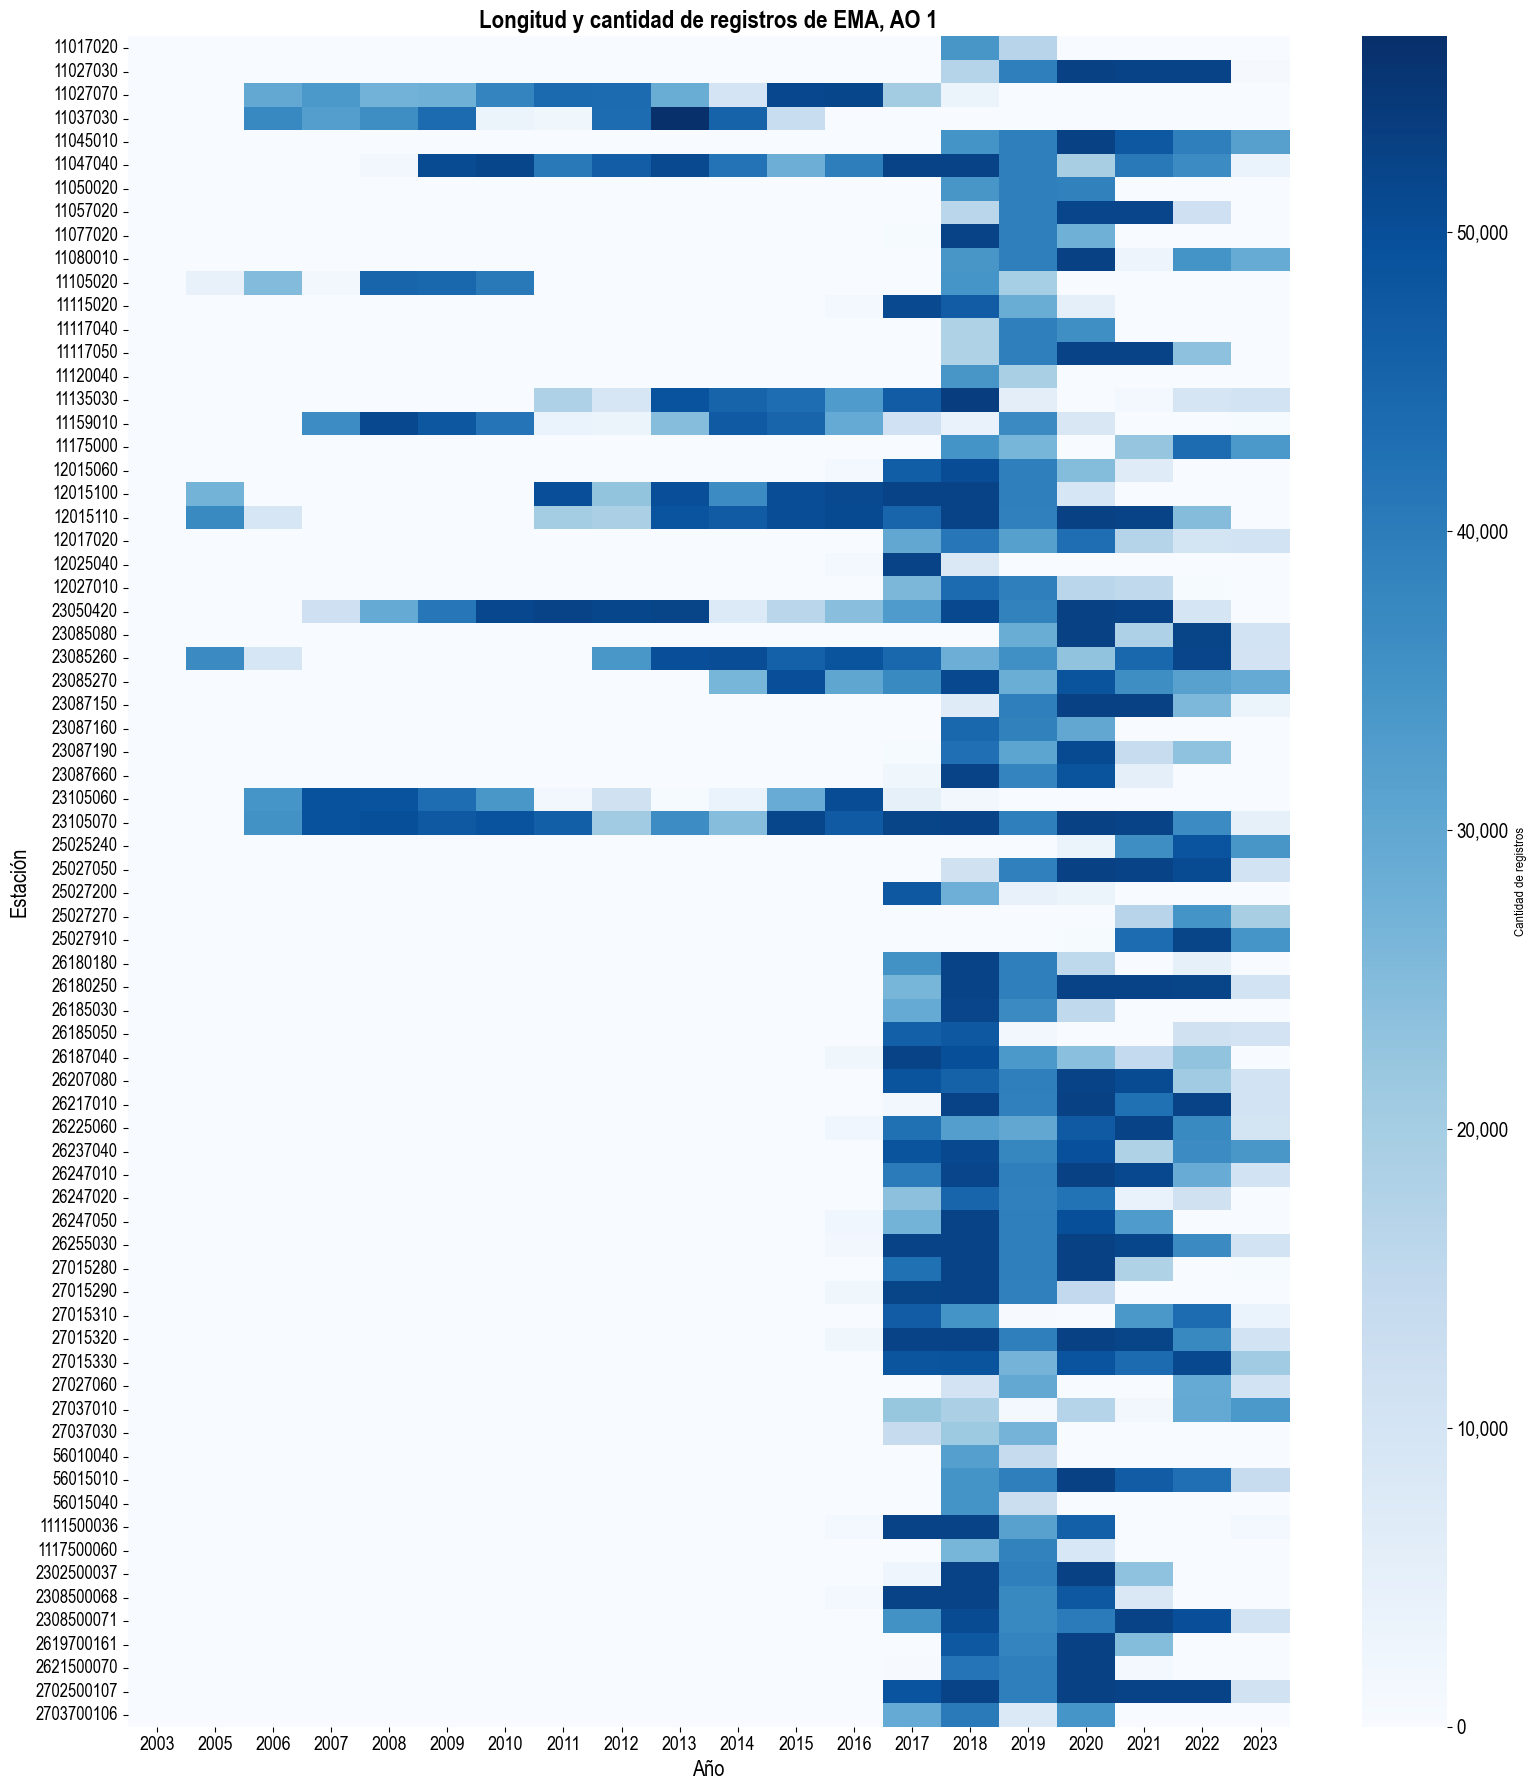

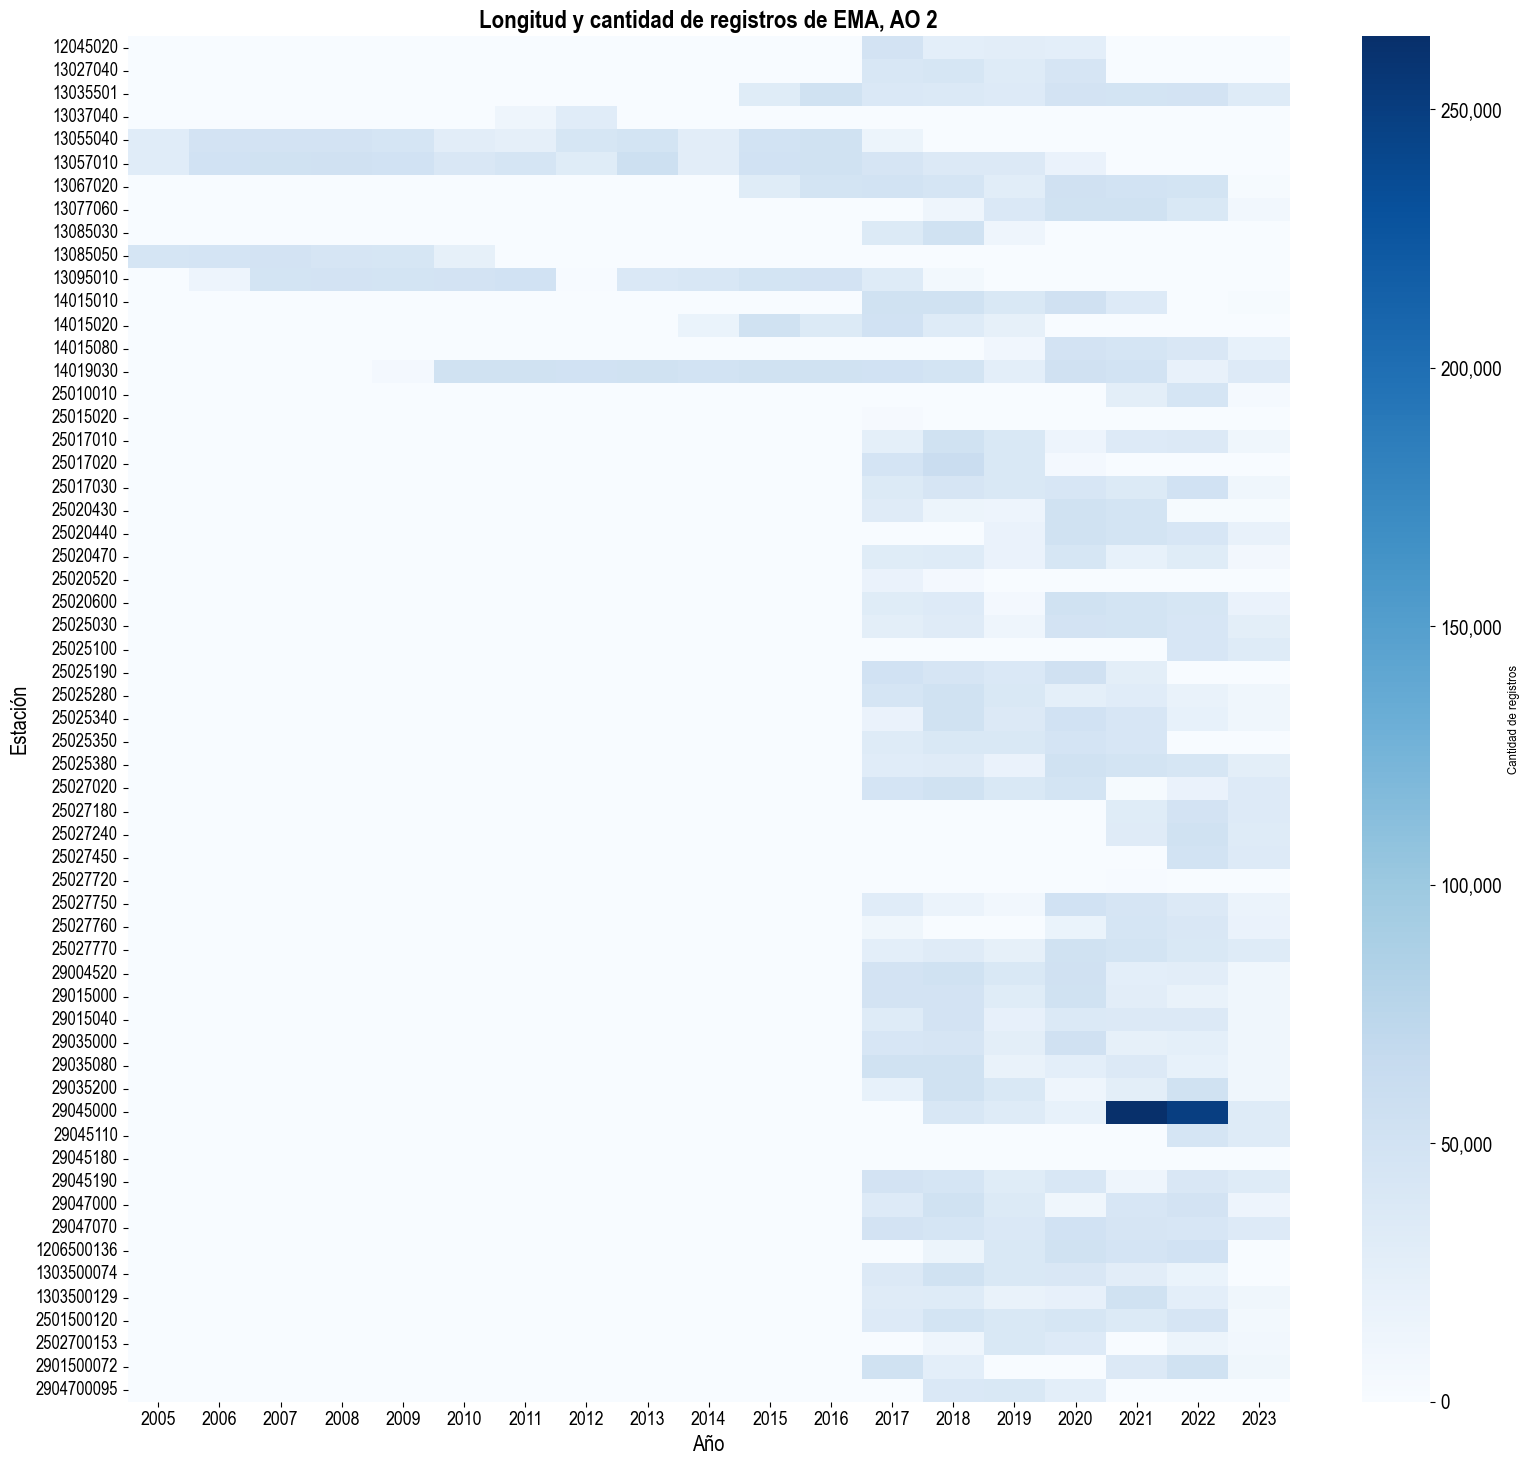

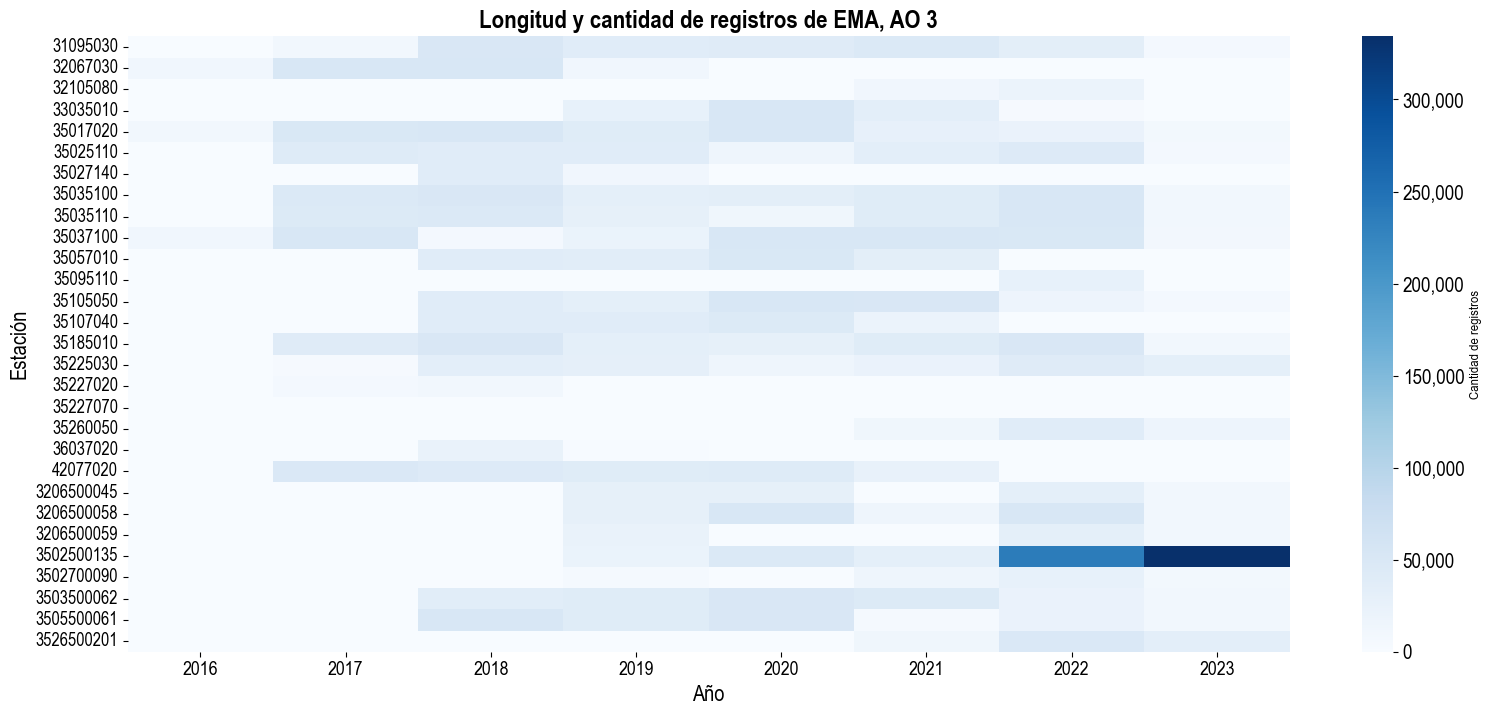

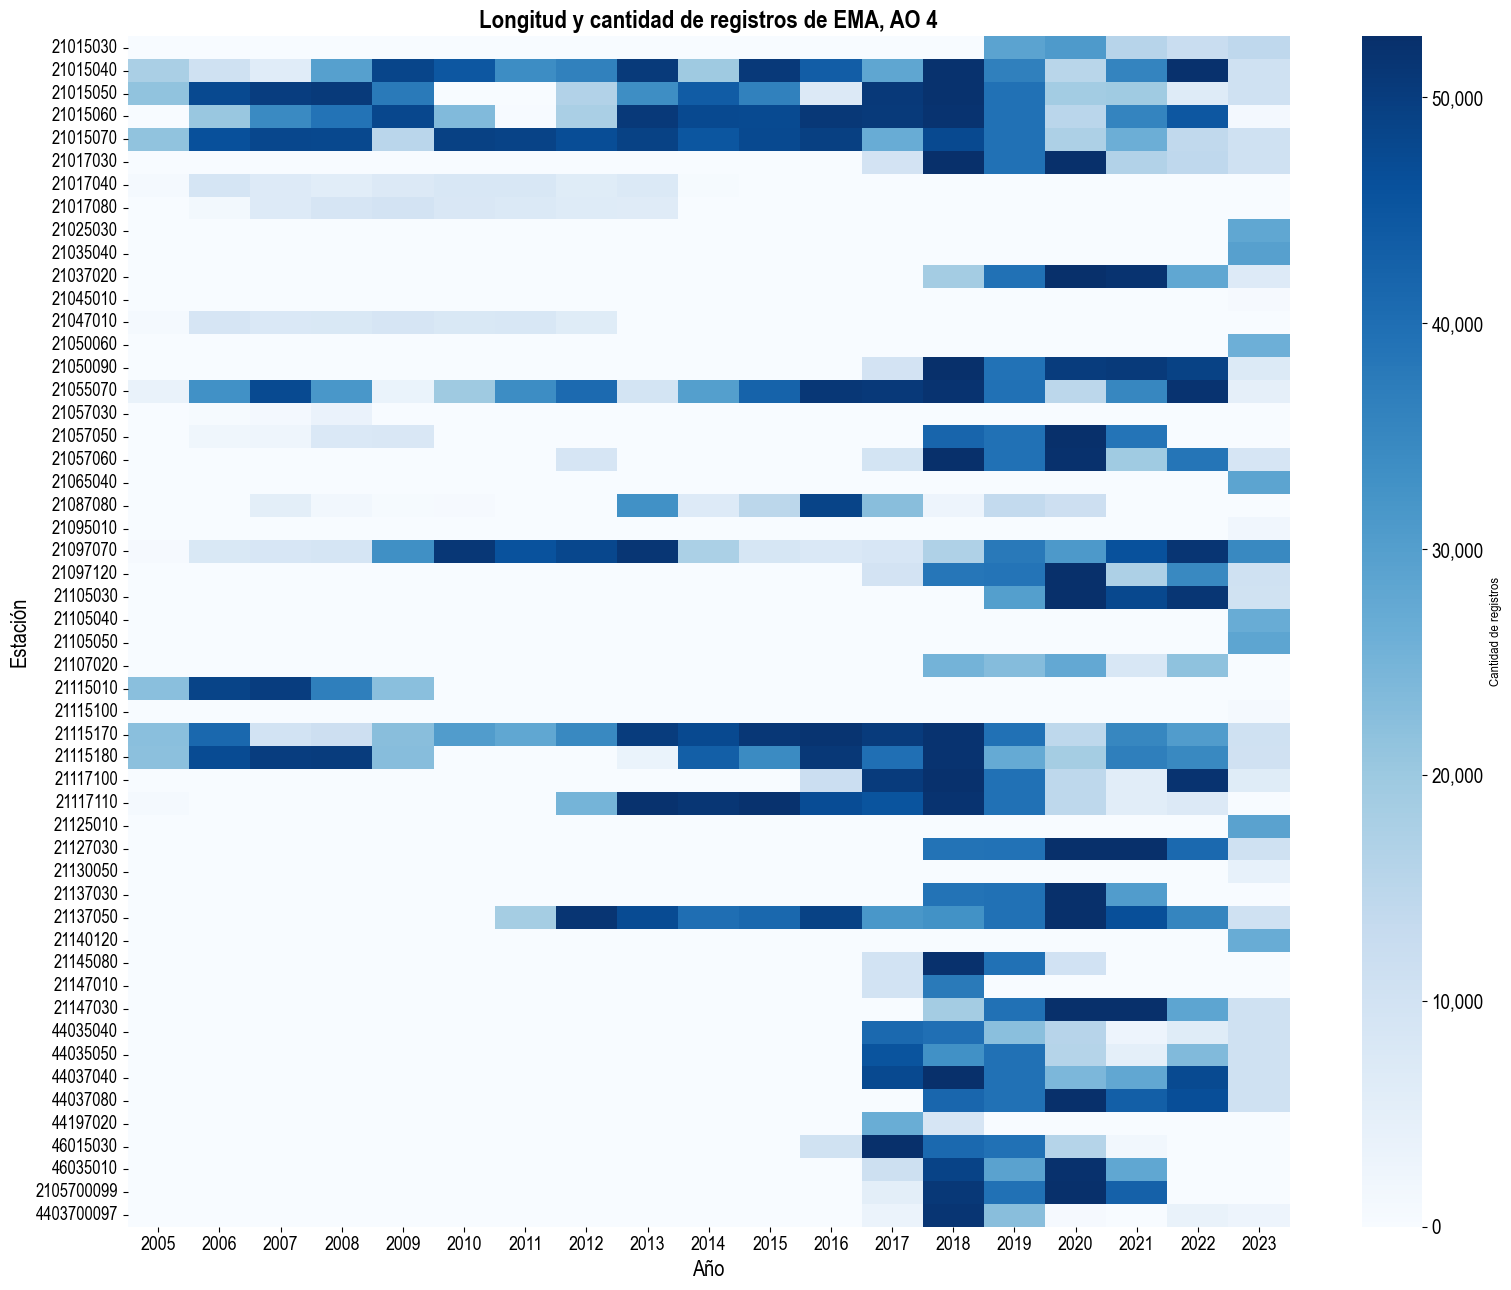

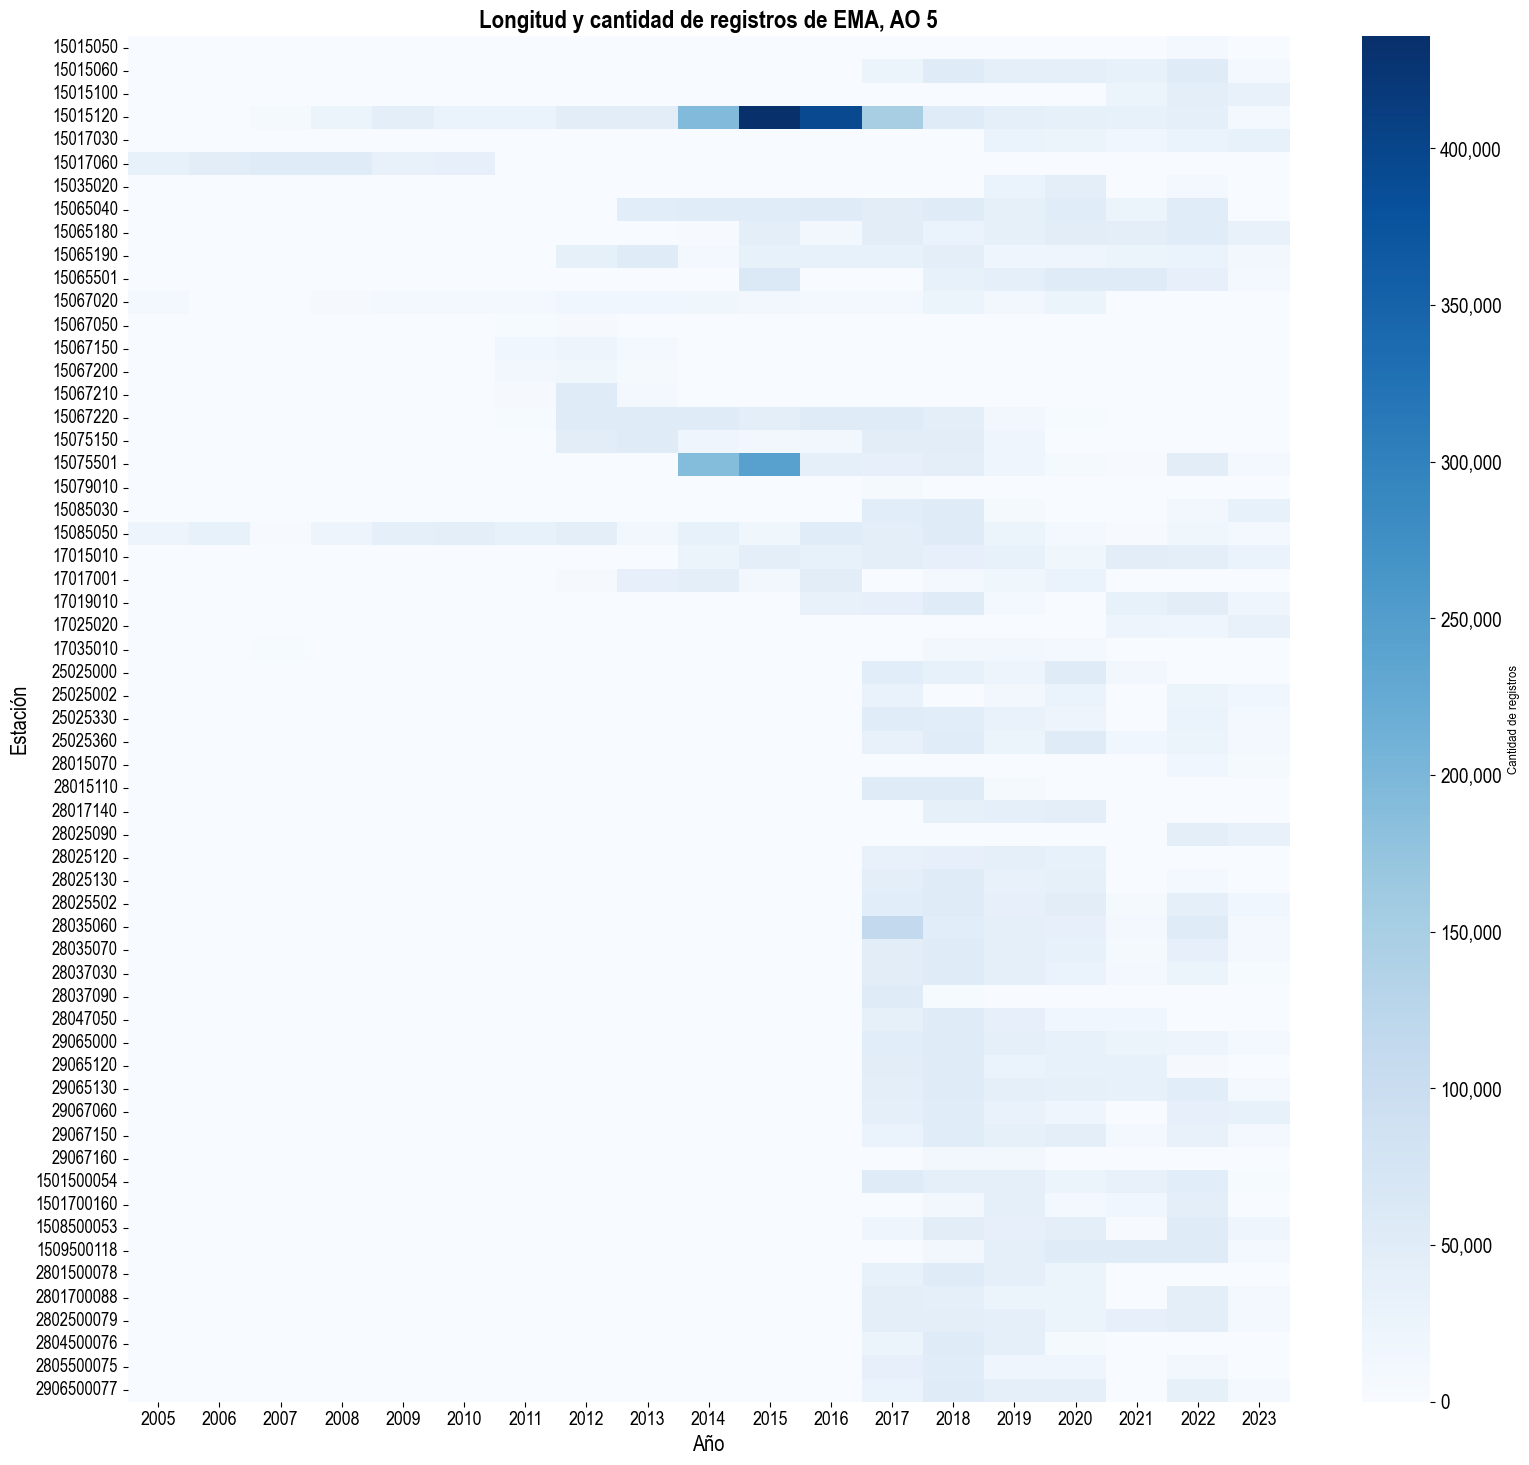

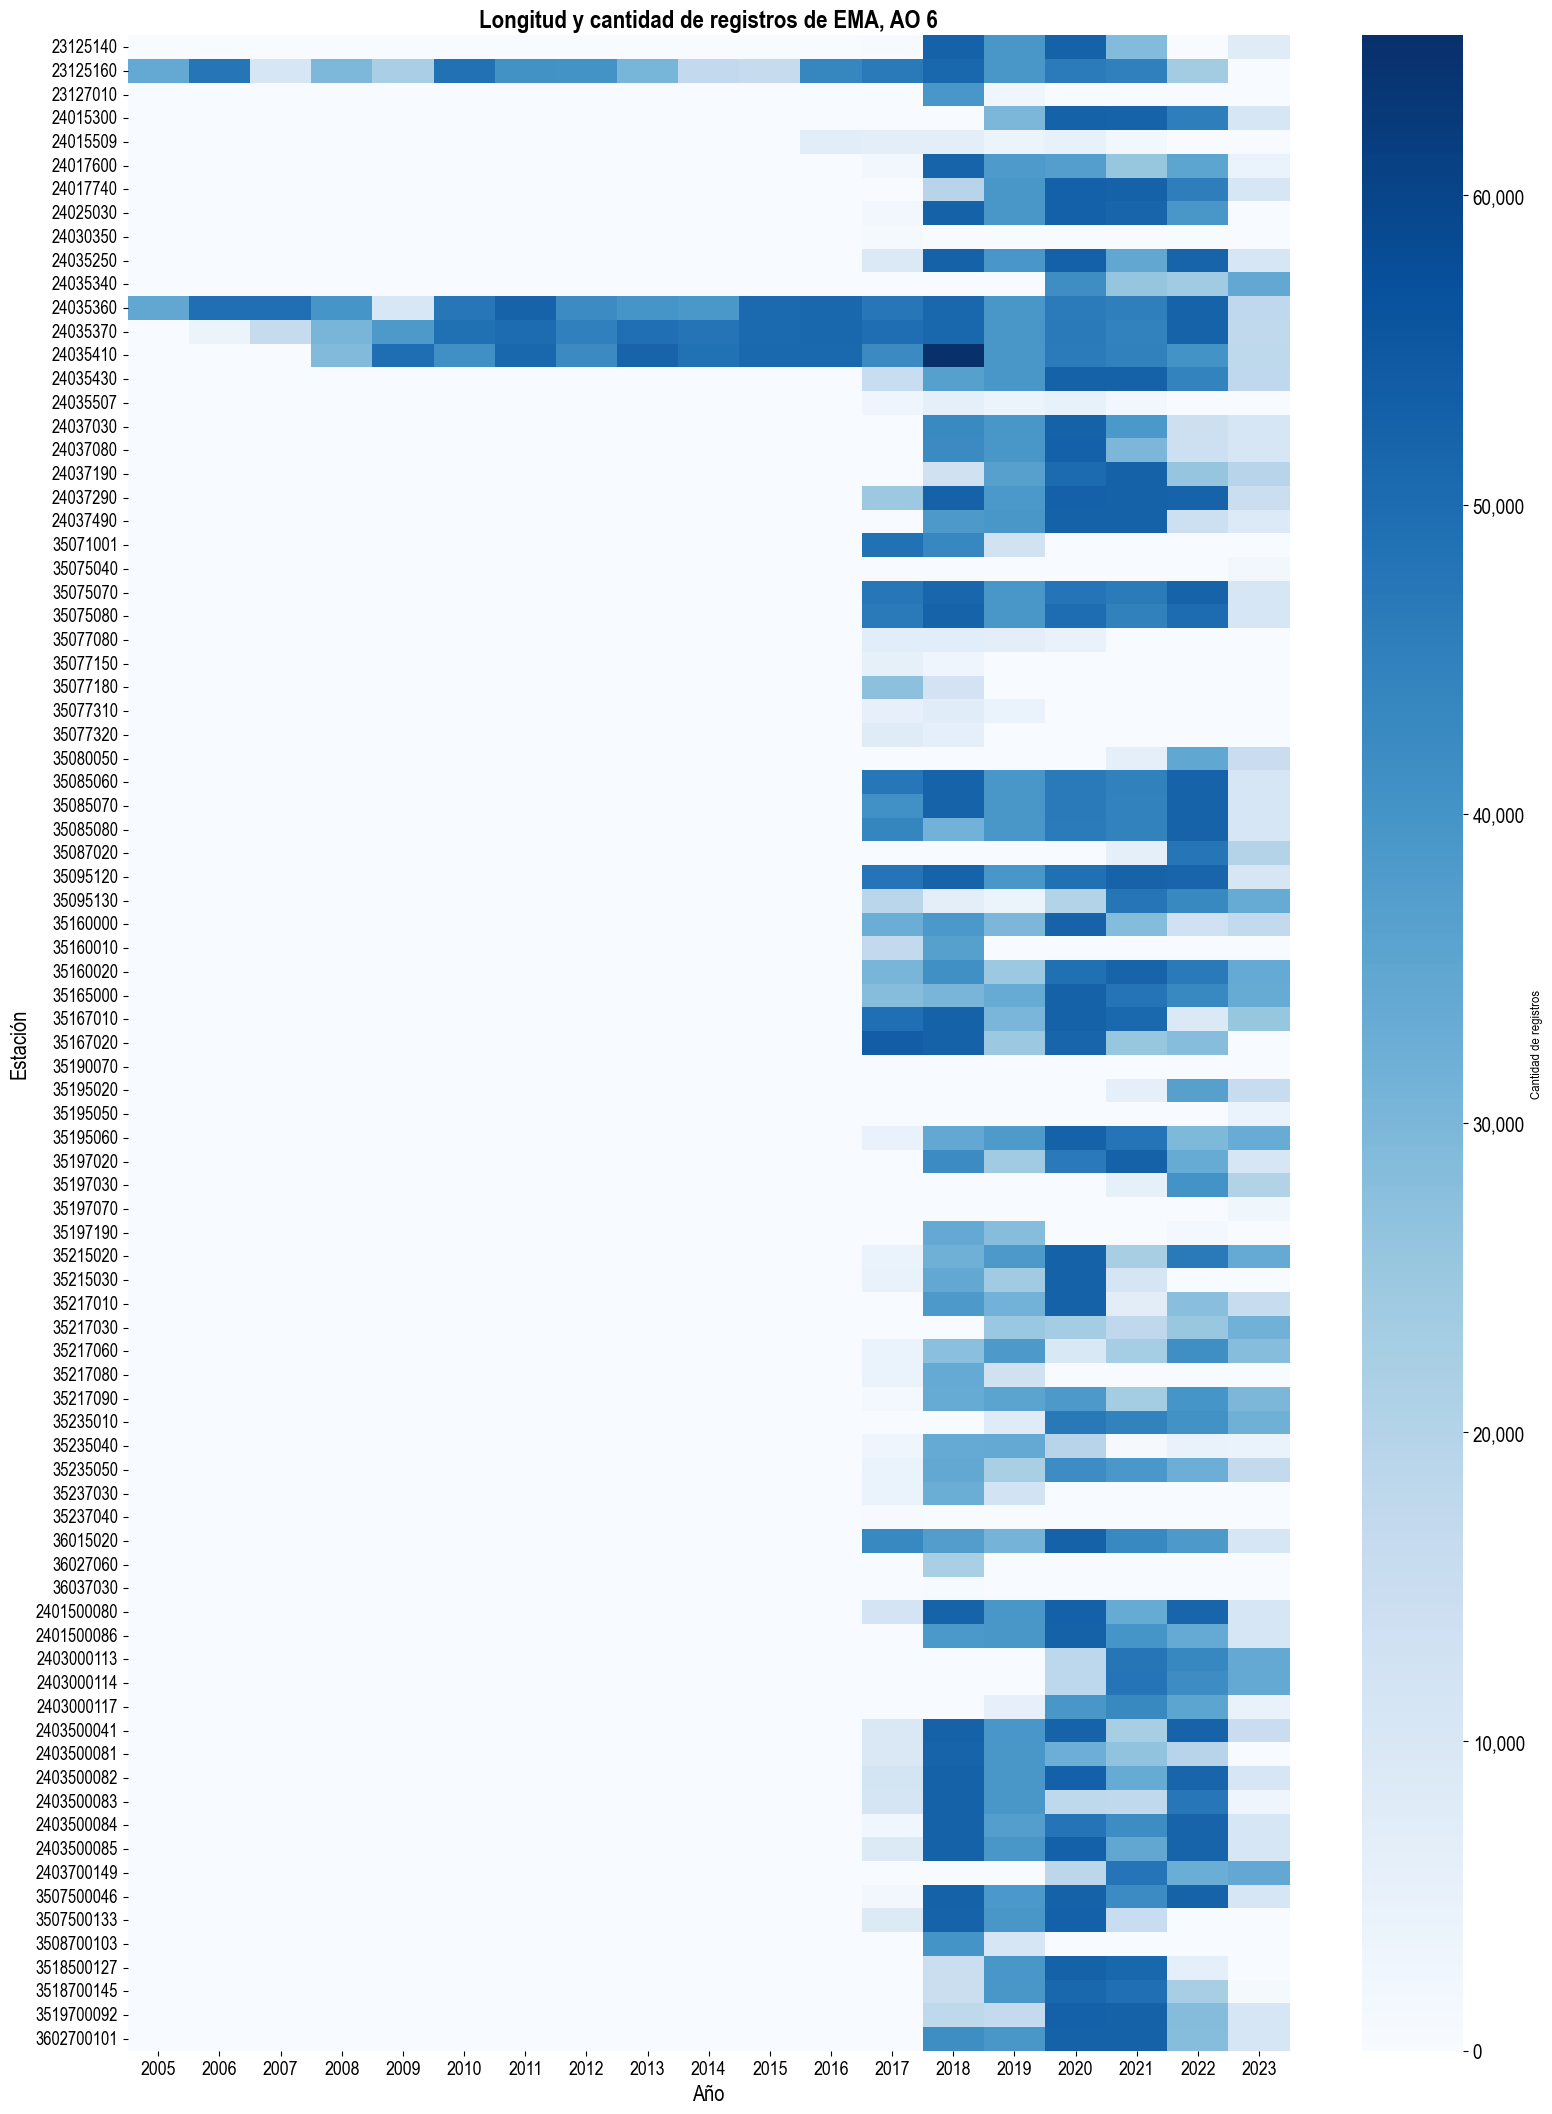

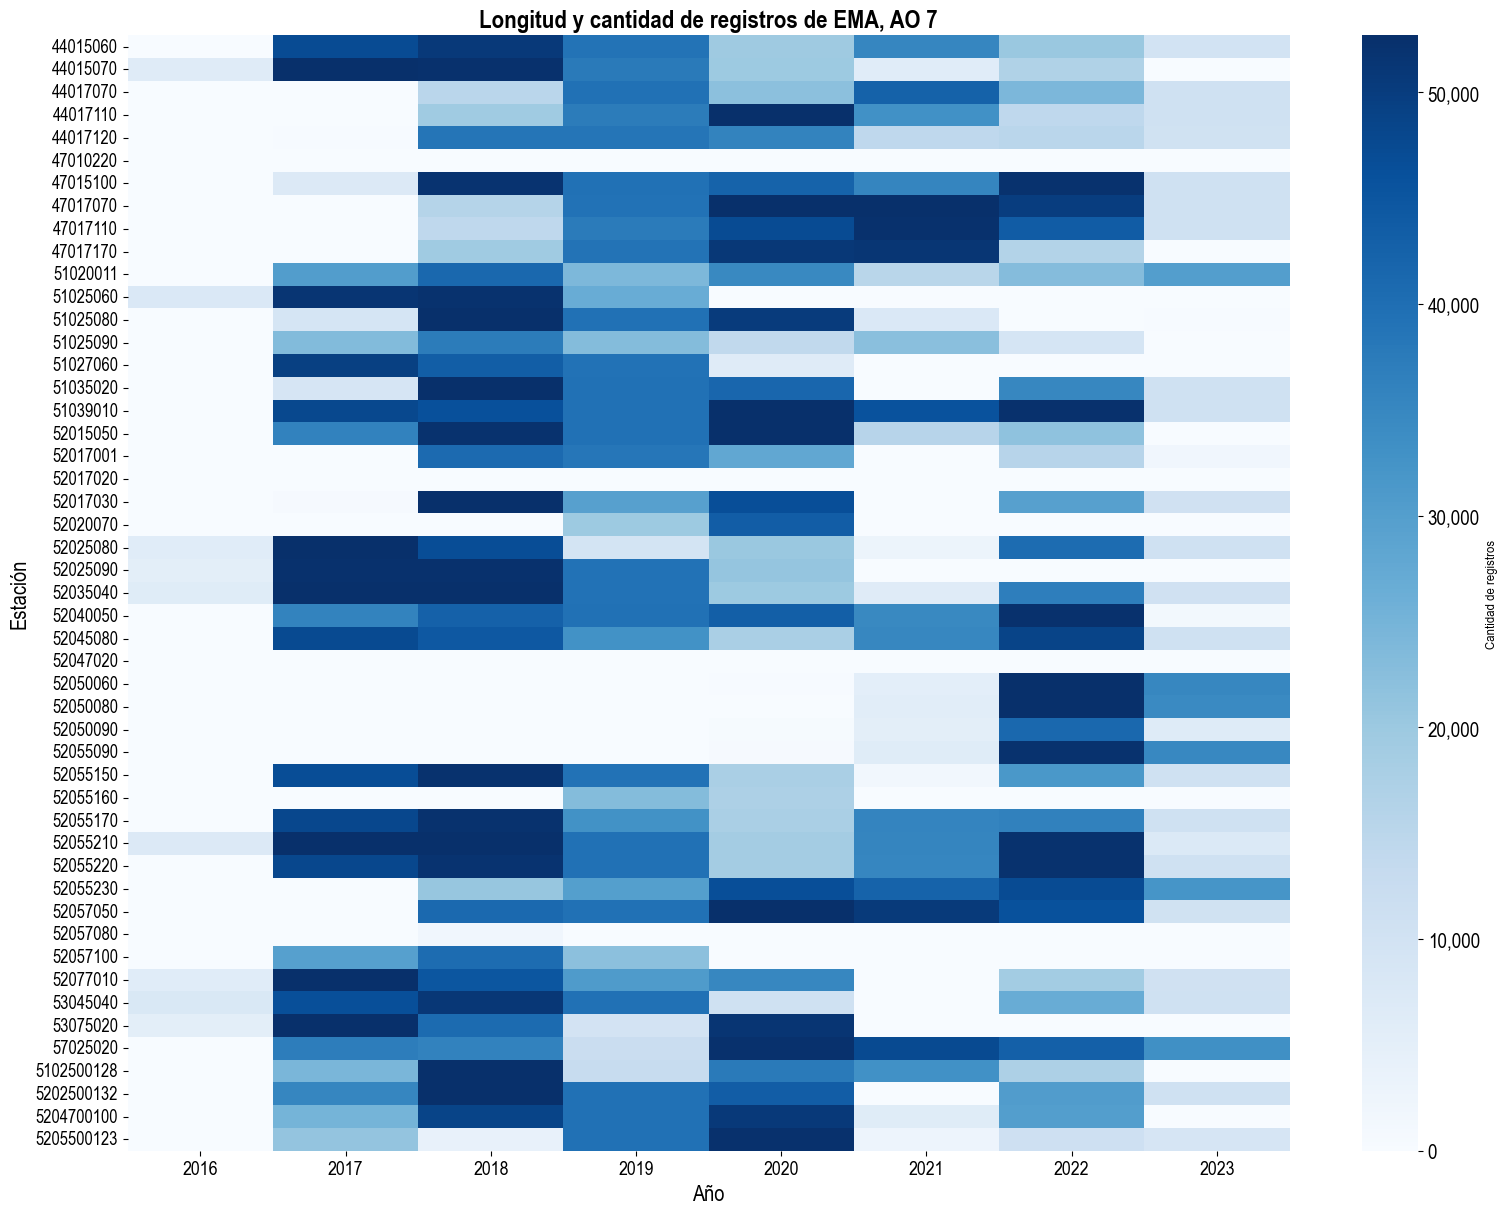

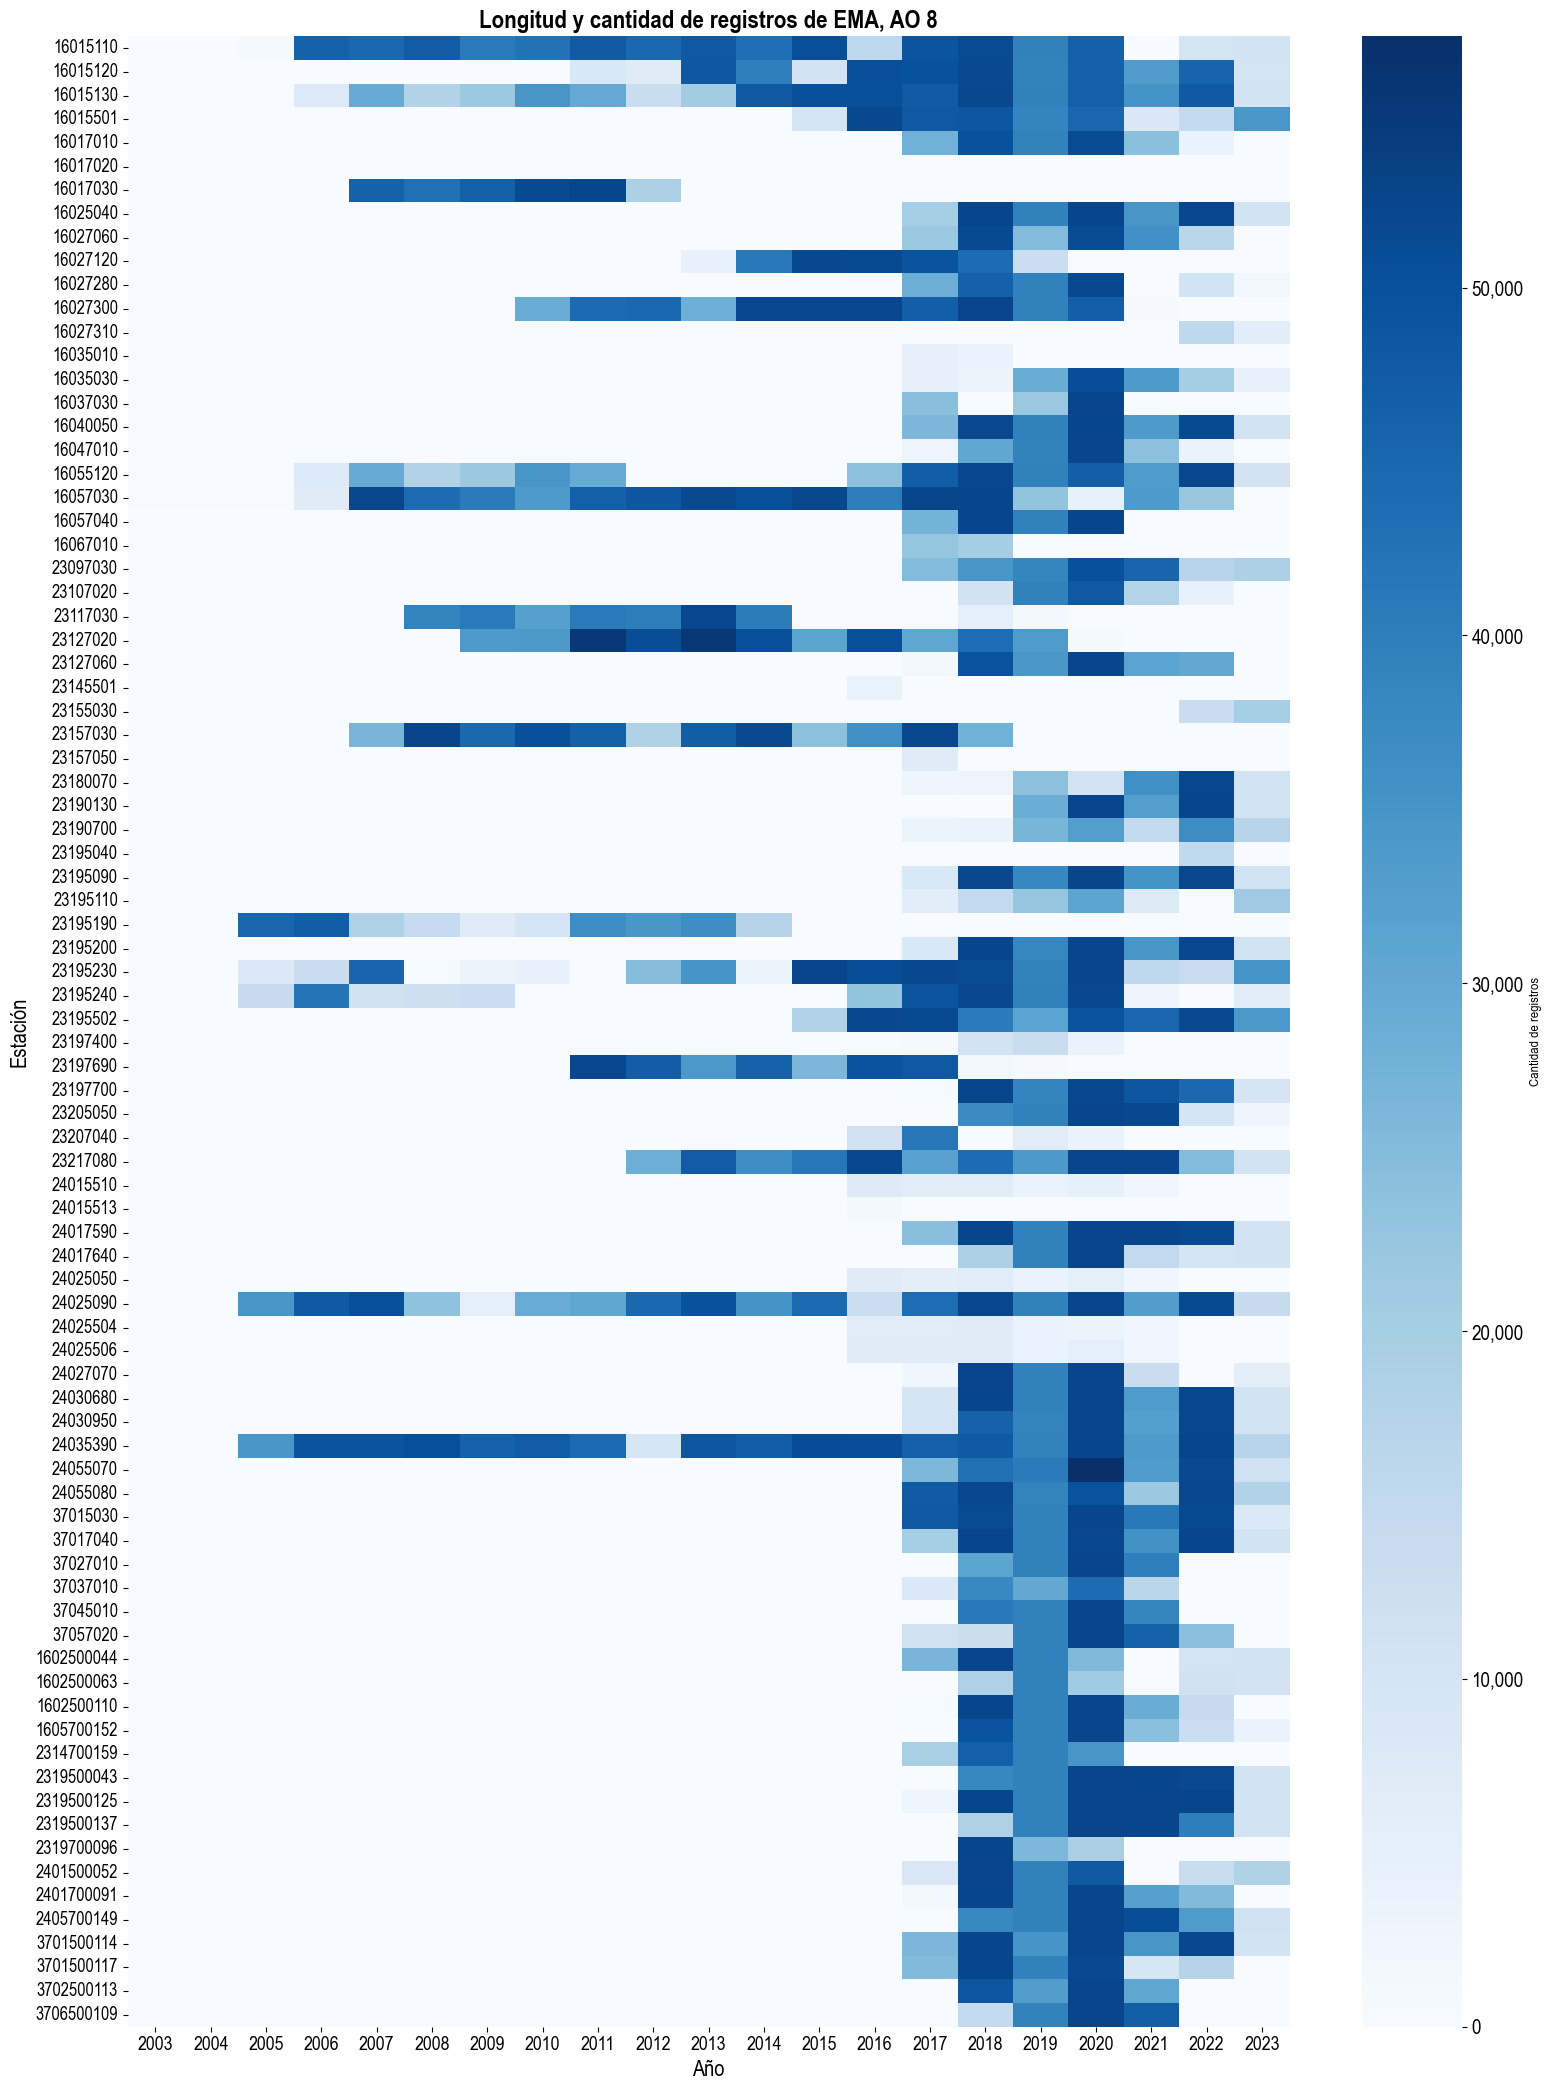

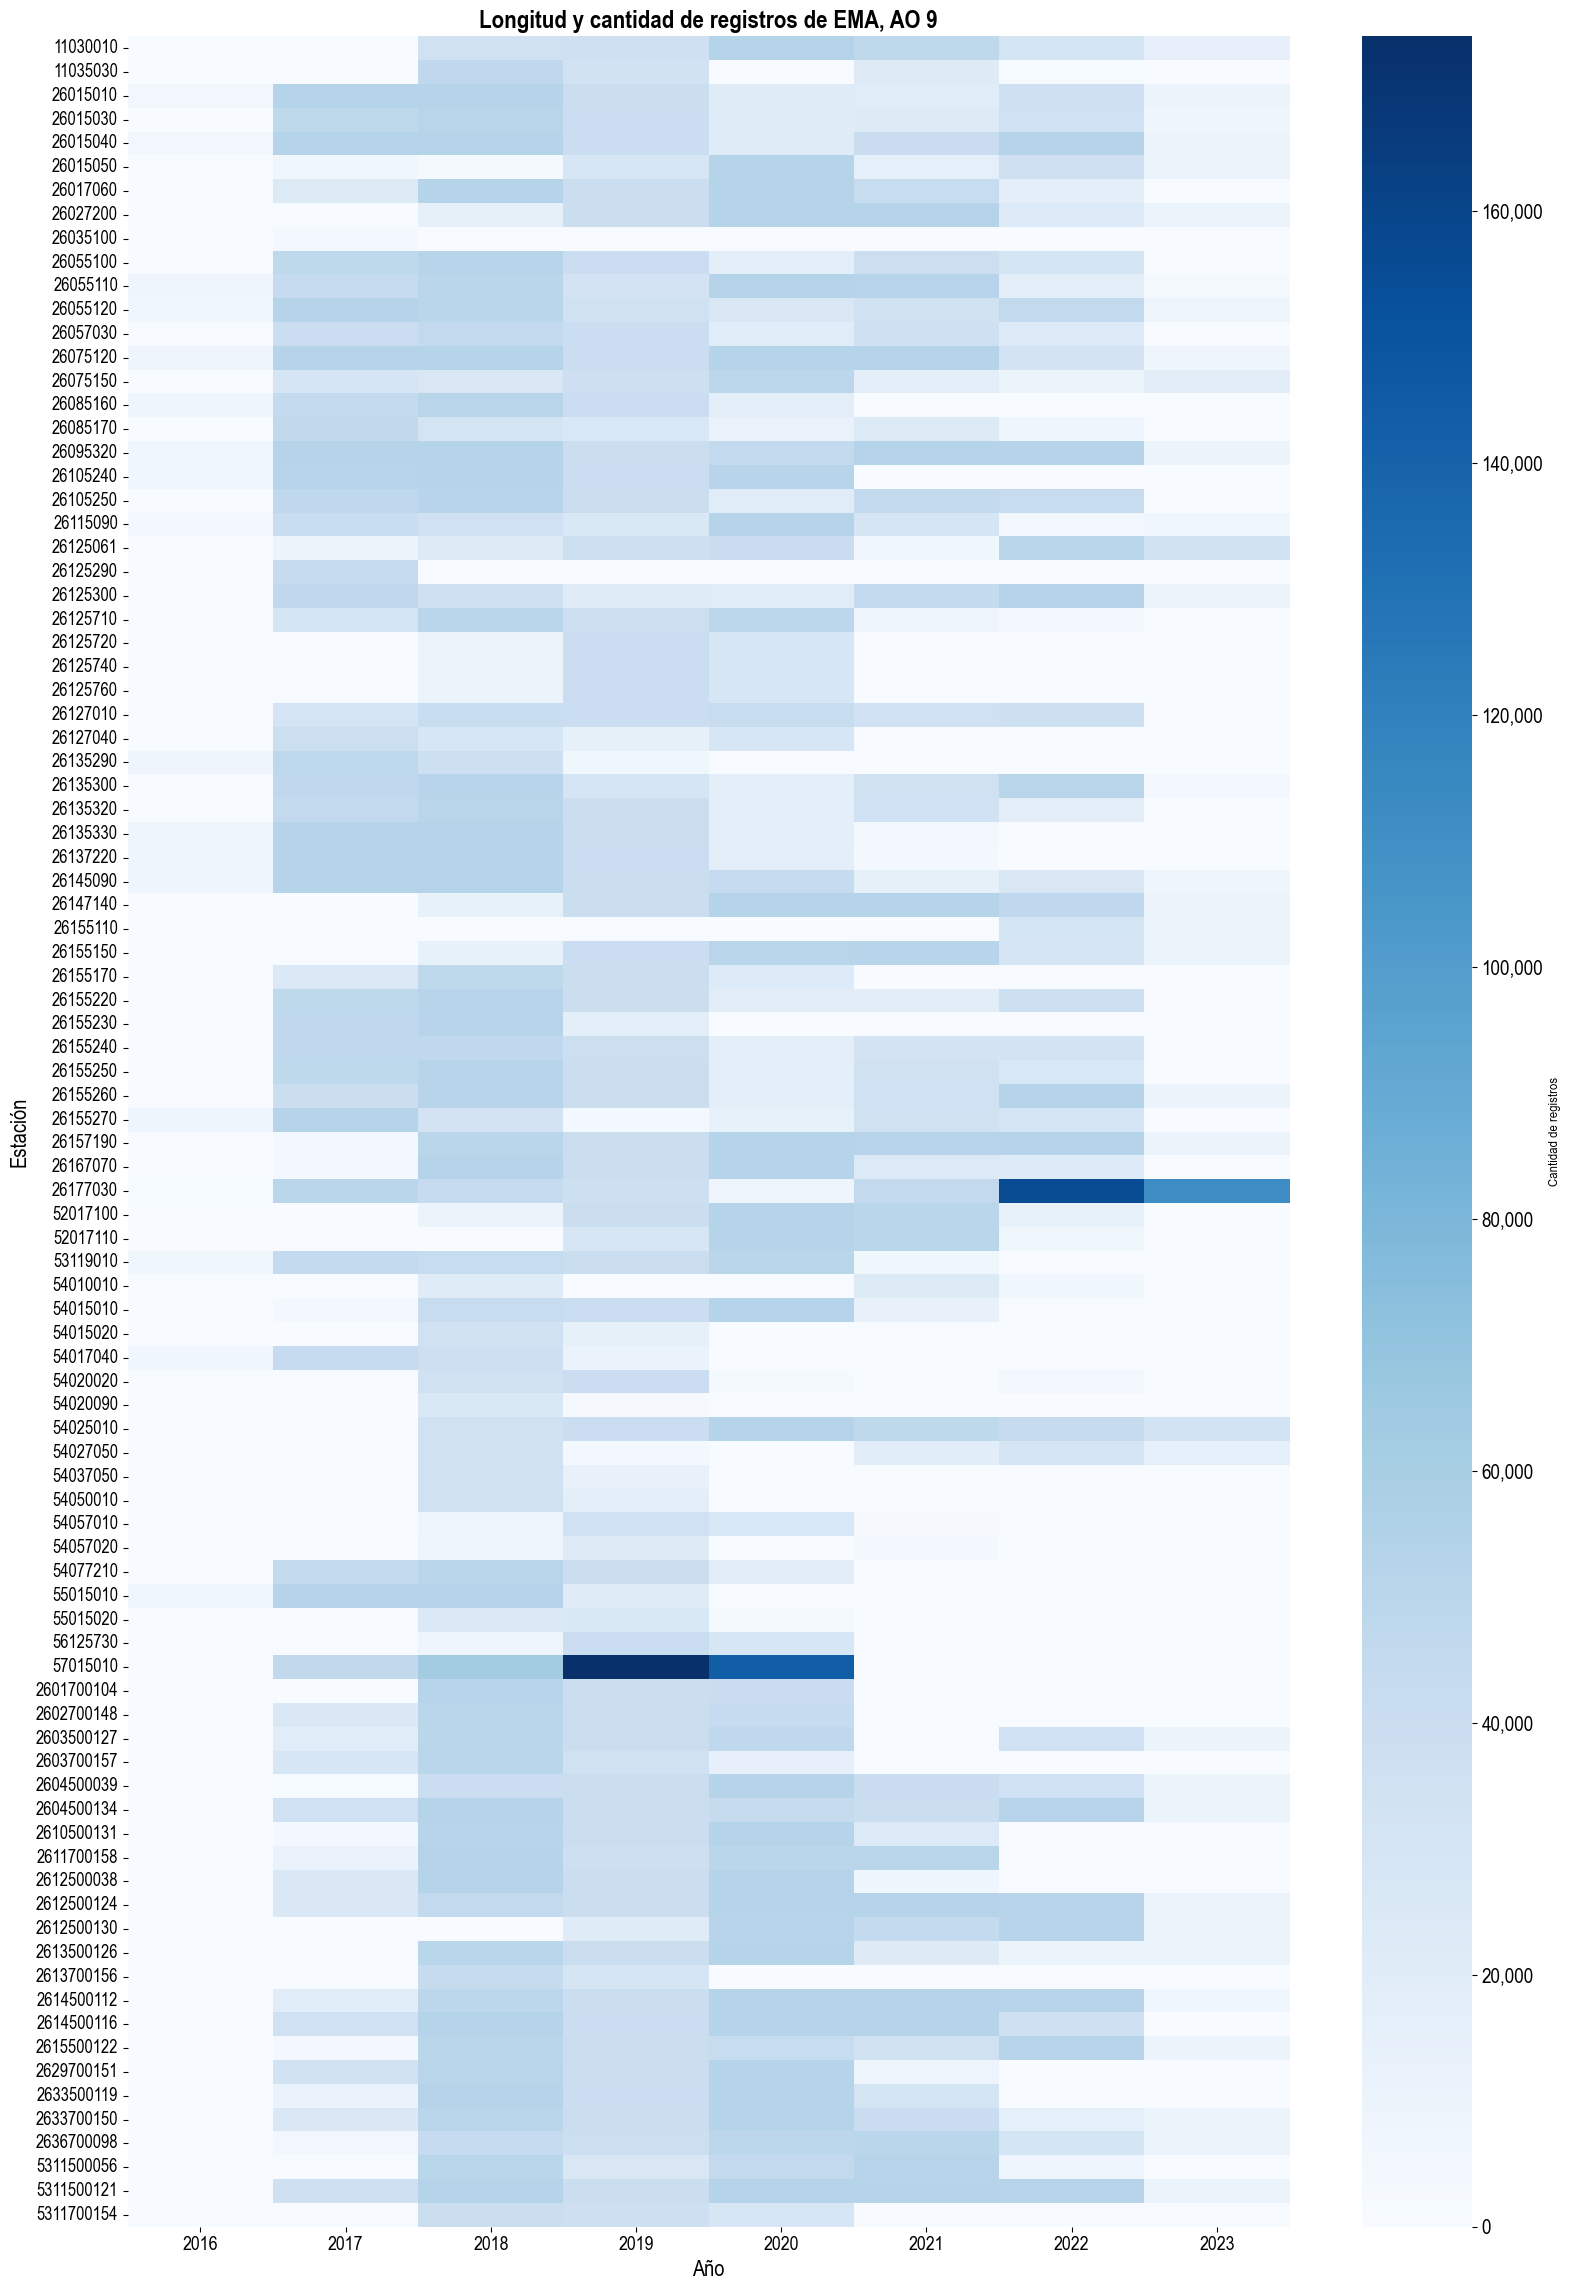

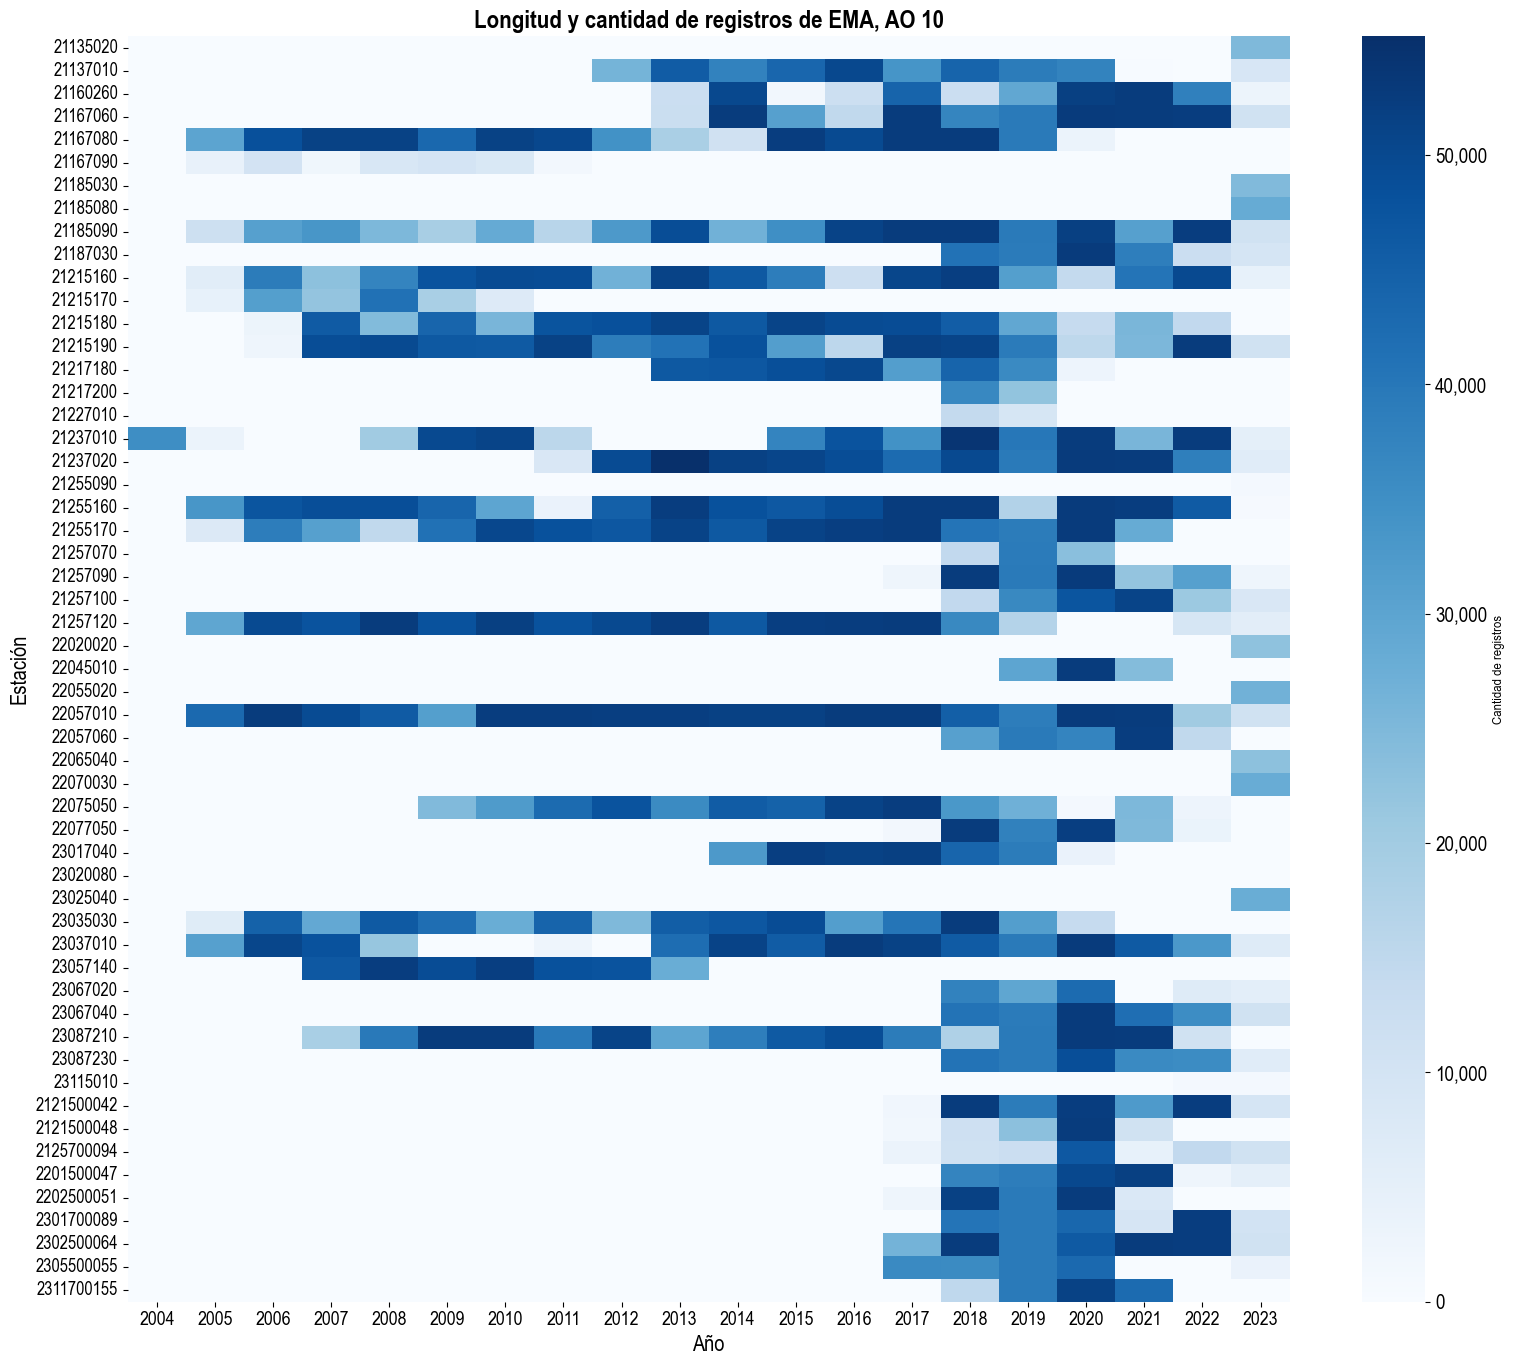

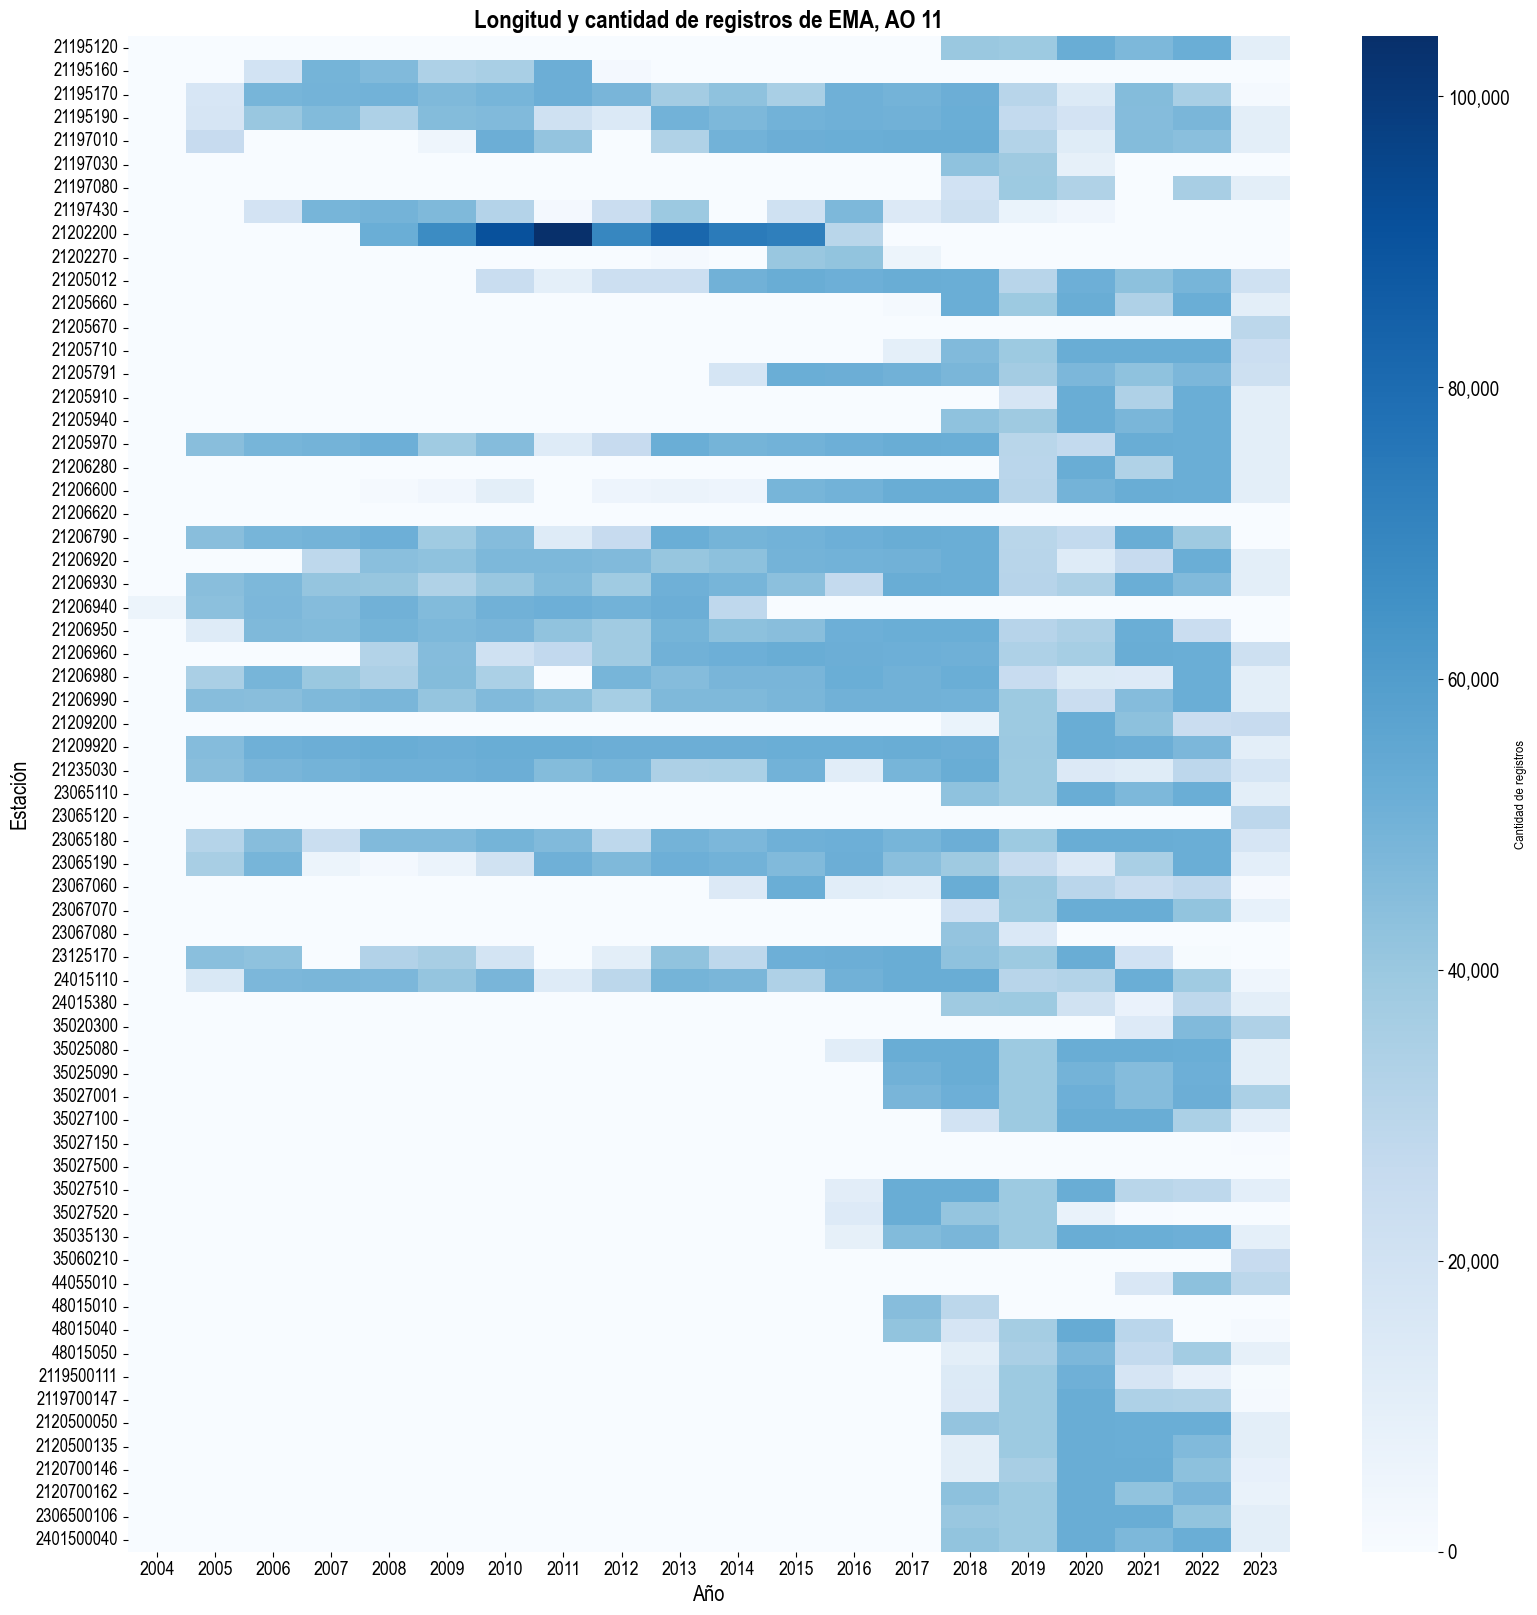

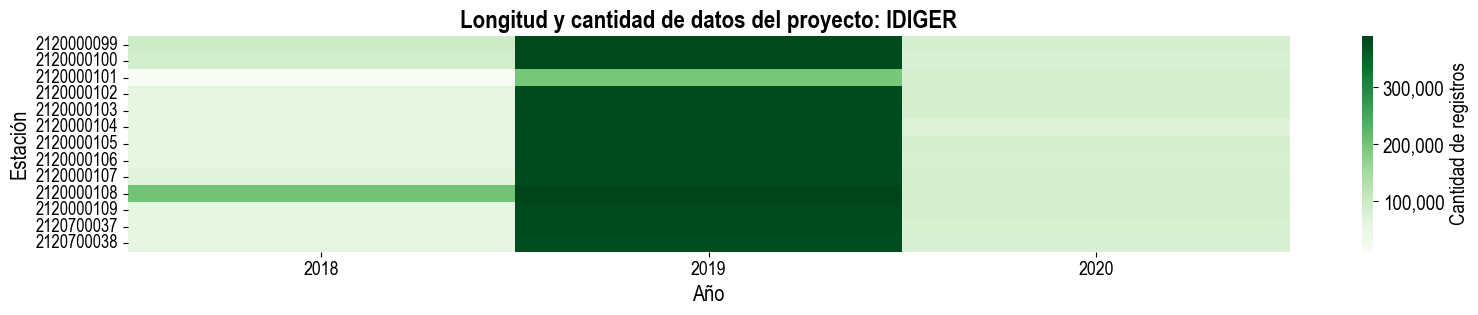

C:\Users\user\AppData\Local\Temp\ipykernel_12936\4019980001.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


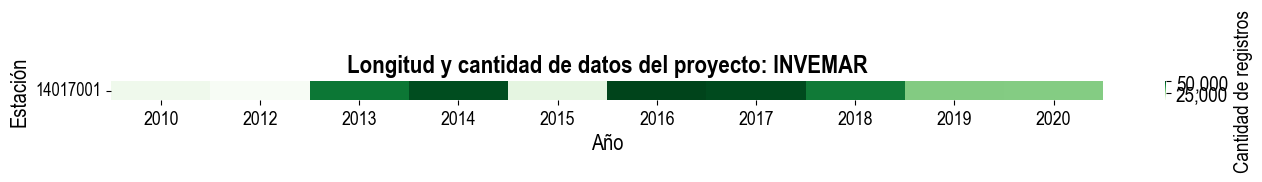

C:\Users\user\AppData\Local\Temp\ipykernel_12936\4019980001.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


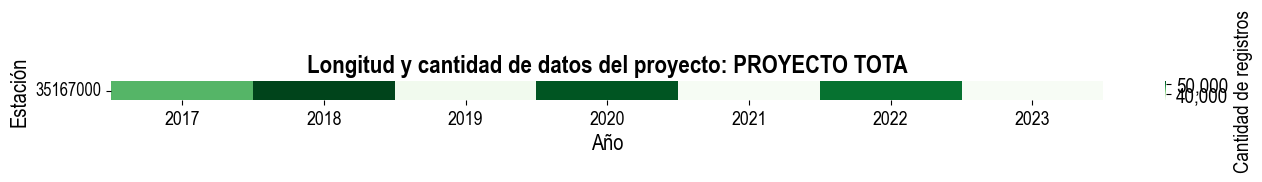

In [15]:
## Segunda forma de graficar
# Merge final_df con ema_df para obtener AO_Cod y project para cada Station
merged_df = final_df.merge(ema_df[['Station', 'AO_Cod', 'project']], on='Station')

# Establecer estilo global
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.stretch'] = 'condensed'

# Si el proyecto es 'IDEAM', se agrupa por AO_Cod. De lo contrario, se agrupa solo por proyecto.
for project, project_group in merged_df.groupby('project'):
    if project == 'IDEAM':
        for ao_cod, ao_group in project_group.groupby('AO_Cod'):
            try:
                ao_cod = int(ao_cod) # Se intenta convertir ao_cod a entero
            except (ValueError, TypeError):
                print(f"No se pudo convertir {ao_cod} a entero. Continuando con el siguiente grupo.")
                continue  # Continuar con la siguiente iteración del bucle 
            pivot_table = ao_group.pivot_table(index='Station', columns='Año', values='Count', aggfunc='sum').fillna(0)
            pivot_table.to_csv(f'CantRegistros_{project}_AO{ao_cod}.csv')
            plt.figure(figsize=(16, 0.25 * len(ao_group['Station'].unique())))
            ax = sns.heatmap(pivot_table, cmap="Blues", cbar=True, yticklabels=True, xticklabels=True, 
                             cbar_kws={"format": '{:,}', "label": "Cantidad de registros"})
            # Se ajusta la apariencia de los ticks de la colorbar
            cbar = ax.collections[0].colorbar
            cbar.ax.tick_params(labelsize=15, labelrotation=0)  # Cambia '12' al tamaño de fuente deseado
            cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
            
            # Se ajusta  apariencia del plot
            plt.title(f"Longitud y cantidad de registros de EMA, AO {ao_cod}", fontsize=18, fontweight='bold')
            plt.ylabel("Estación", fontsize=16)
            plt.xlabel("Año", fontsize=16)
            plt.yticks(rotation=0, fontsize=13)
            plt.xticks(rotation=0, fontsize=14)
            plt.tight_layout()
            plt.show()
            
    else:
        pivot_table = project_group.pivot_table(index='Station', columns='Año', values='Count', aggfunc='sum').fillna(0)
        pivot_table.to_csv(f'CantRegistros_{project}.csv')
        plt.figure(figsize=(16, 0.25 * len(project_group['Station'].unique())))
        ax = sns.heatmap(pivot_table, cmap='Greens', cbar=True, yticklabels=True, xticklabels=True,
                    cbar_kws={"format": '{:,}', "label": "Cantidad de registros"})
        # Se ajusta la apariencia de los ticks de la colorbar
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=15, labelrotation=0)  # Cambia '12' al tamaño de fuente deseado
        cbar.set_label("Cantidad de registros", size=15)  
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
        
        # Se ajusta  apariencia del plot
        plt.title(f"Longitud y cantidad de datos del proyecto: {project}", fontsize=18, fontweight='bold')
        plt.ylabel("Estación", fontsize=16)
        plt.xlabel("Año", fontsize=16)
        plt.yticks(rotation=0, fontsize=13)
        plt.xticks(rotation=0, fontsize=14)
        plt.tight_layout()
        plt.show()

### Cantidad total de datos

In [2]:
## Se indaga sobre cuál es la cantidad de datos de todas las series descargadas en el período 2003-01-01 al 2023-08-31
# Se crea la función cantidad_datos
def cantidad_datos(archivos):
    total_filas = 0

    for archivo in archivos:
        # Se utiliza el método 'chunksize' de pandas para leer los archivos por partes (chunks)
        # y procesarlos de forma incremental sin cargar todos los datos en memoria al mismo tiempo
        chunks = pd.read_csv(archivo, encoding='latin-1', chunksize=100000)  # Se establece este valor de chunk para poder hacer otras actividades

        for chunk in chunks:
            total_filas += len(chunk)

    return total_filas

# Ruta de la carpeta con los archivos CSV
carpeta_proces = 'RawUnmodified/'

# Obtener la lista de archivos en la carpeta
archivos = [carpeta_proces + archivo for archivo in os.listdir(carpeta_proces) if archivo.endswith('.csv')]

# Llamar a la función para contar las filas
total_filas = cantidad_datos(archivos)

# Imprimir el resultado
print("El número total de datos es:", total_filas)

El número total de datos es: 206810240


### Obtener fechas iniciales y finales de estaciones

In [5]:
def obtener_fechas(archivo):
    try:
        # Se lee el archivo
        datos = pd.read_csv(archivo, encoding='latin-1')#, names=['Fecha', 'Valor'])
        try:
            datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%S')
        
        # Se obtiene el código de la estación
        station = datos['Station'].values[0]
        
        # Se obtiene primera y última fecha 
        fecha_inicial = datos['Fecha'].iloc[0]
        fecha_final = datos['Fecha'].iloc[-1]
        
        return station, fecha_inicial, fecha_final
    
    except Exception as e:
        print(f"Error con el archivo {archivo}: {e}")
        return None, None, None

def main():
    # Cambia la ruta según la ubicación de tu carpeta
    ruta_carpeta = 'RawUnmodified'

    # Listamos todos los archivos en la carpeta que terminen con .csv
    archivos = [f for f in os.listdir(ruta_carpeta) if f.endswith('.csv')]
    
    # Creamos una lista para almacenar los resultados
    resultados = []

    # Iteramos sobre cada archivo y obtenemos las fechas
    for archivo in archivos:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        station, fecha_inicial, fecha_final = obtener_fechas(ruta_archivo)
        
        if station and fecha_inicial and fecha_final:
            resultados.append([station, fecha_inicial, fecha_final])
    
    # Convertimos los resultados a un DataFrame
    resultados_df = pd.DataFrame(resultados, columns=['CodEstacion', 'fecha_inicial', 'fecha_final'])
    
    # Guardamos el DataFrame como un archivo CSV
    resultados_df.to_csv('FechaInicialFinal_Precip.csv', index=False)

if __name__ == "__main__":
    main()

### Obtener estadísticos descriptivos

In [2]:
def obtener_EstadDescript(archivo):
    try:
        # Se lee el archivo
        datos = pd.read_csv(archivo, encoding='latin-1')#, names=['Fecha', 'Valor'])
        try:
            datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%S')
        
        # Se obtiene el código de la estación
        station = datos['Station'].values[0]
        
        # Se obtienen los estadísticos descriptivos
        minimo = datos['Valor'].min()
        maximo = datos['Valor'].max()
        media = datos['Valor'].mean()
        #mediana = datos['Valor'].median()
        desvest = datos['Valor'].std()
        varianza = datos['Valor'].var()
        #first_q = datos['Valor'].quantile(0.25)
        #third_q = datos['Valor'].quantile(0.75)
        
        return station, minimo, maximo, media, desvest, varianza, #first_q, third_q, mediana --no fue posible calcular estos estad.
    
    except Exception as e:
        print(f"Error con el archivo {archivo}: {e}")
        print(e.__class__)
        return None, None, None, None, None, None#, None, None, None --no fue posible calcular estos estad.

def main():
    # Cambia la ruta según la ubicación de tu carpeta
    ruta_carpeta = 'RawUnmodified'

    # Listamos todos los archivos en la carpeta que terminen con .csv
    archivos = [f for f in os.listdir(ruta_carpeta) if f.endswith('.csv')]
    
    # Creamos una lista para almacenar los resultados
    resultados = []

    # Iteramos sobre cada archivo y obtenemos las fechas
    for archivo in archivos:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        station, minimo, maximo, media, desvest, varianza= obtener_EstadDescript(ruta_archivo)
        
        if station and minimo and maximo and media and desvest and varianza:
            resultados.append([station, minimo, maximo, media, desvest, varianza])
    
    # Convertimos los resultados a un DataFrame
    resultados_df = pd.DataFrame(resultados, columns=['Station', 'minimo', 'maximo', 'media', 'desvest', 'varianza'])
    
    print(resultados_df)
    
    # Guardamos el DataFrame como un archivo CSV
    resultados_df.to_csv('EstadDescript_Precip_Crudos.csv', index=False)

if __name__ == "__main__":
    main()

        Station    minimo    maximo       media      desvest      varianza
0      11027070   -3270.0    3277.8    0.422997    36.891433  1.360978e+03
1      11030010   -7925.0   13107.2    9.872508  1120.237858  1.254933e+06
2      11035030 -126976.0  131072.0  144.308794  2755.844087  7.594677e+06
3      11037030   -3248.8    2955.5    3.483427    76.523652  5.855869e+03
4      11047040  -12802.7   10668.8    0.061470    44.300385  1.962524e+03
..          ...       ...       ...         ...          ...           ...
160    56015010   -7925.0   13107.2  332.274367  2060.274946  4.244733e+06
161    56015040   -7925.0   13107.2    1.461146   147.216779  2.167278e+04
162    57015010   -3249.8    3228.8   42.189583   151.850418  2.305855e+04
163    57025020   -3225.6    2950.4    0.081171    20.315057  4.127016e+02
164  2403000114    -246.6       1.2   -0.000655     0.654812  4.287789e-01

[165 rows x 6 columns]


In [ ]:
# De datos con QC
def obtener_EstadDescript(archivo):
    try:
        # Se lee el archivo
        datos = pd.read_csv(archivo, encoding='latin-1')#, names=['Fecha', 'Valor'])
        try:
            datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%S')
        
        # Se hace el filtro para que solo queden los valores que superaron las pruebas
        dfC = datos[datos['Estado'].apply(lambda x: any([str(x).startswith(prefix) for prefix in ['0PC']]))]
        
        # Se obtiene el código de la estación
        station = dfC['Station'].values[0]
        
        # Se obtienen los estadísticos descriptivos
        minimo = dfC['Valor'].min()
        maximo = dfC['Valor'].max()
        media = dfC['Valor'].mean()
        #mediana = datos['Valor'].median()
        desvest = dfC['Valor'].std()
        varianza = dfC['Valor'].var()
        #first_q = datos['Valor'].quantile(0.25)
        #third_q = datos['Valor'].quantile(0.75)
        
        return station, minimo, maximo, media, desvest, varianza, #first_q, third_q, mediana --no fue posible calcular estos estad.
    
    except Exception as e:
        print(f"Error con el archivo {archivo}: {e}")
        print(e.__class__)
        return None, None, None, None, None, None#, None, None, None --no fue posible calcular estos estad.

def main():
    # Cambia la ruta según la ubicación de tu carpeta
    ruta_carpeta = 'DatosEjemplo'

    # Listamos todos los archivos en la carpeta que terminen con .csv
    archivos = [f for f in os.listdir(ruta_carpeta) if f.endswith('.csv')]
    
    # Creamos una lista para almacenar los resultados
    resultados = []

    # Iteramos sobre cada archivo y obtenemos las fechas
    for archivo in archivos:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        station, minimo, maximo, media, desvest, varianza= obtener_EstadDescript(ruta_archivo)
        
        if station and minimo and maximo and media and desvest and varianza:
            resultados.append([station, minimo, maximo, media, desvest, varianza])
    
    # Convertimos los resultados a un DataFrame
    resultados_df = pd.DataFrame(resultados, columns=['Station', 'minimo', 'maximo', 'media', 'desvest', 'varianza'])
    
    # Guardamos el DataFrame como un archivo CSV
    resultados_df.to_csv('EstadDescript_Precip_QC.csv', index=False)

if __name__ == "__main__":
    main()

_____

## Gráficas y análisis resultados obtenidos durante los QC

In [3]:
## Se observa por cada estación la cantidad de datos etiquetados y su porcentaje
def generar_dataframe_compilado(archivos):
    datos = []

    for archivo in archivos:
        # Leer el archivo CSV en modo iterador y especificar los tipos de datos
        reader = pd.read_csv(archivo, iterator=True, dtype={'Station': str, 'Estado': str}, chunksize=70000)

        # Inicializar contador de filas y contador de '0PAT0'
        total_filas = 0
        cantidad_0PSO = 0
        cantidad_0PER = 0
        cantidad_0PAT = 0
        cantidad_0PC = 0

        # Obtener los chunks de datos del archivo
        for chunk in reader:
            total_filas += len(chunk)
            cantidad_0PSO +=  chunk[chunk['Estado'].str.startswith('0PSO', na=False)].shape[0]
            cantidad_0PER +=  chunk[chunk['Estado'].str.startswith('0PER', na=False)].shape[0]
            cantidad_0PAT +=  chunk[chunk['Estado'].str.startswith('0PAT', na=False)].shape[0]
            cantidad_0PC += chunk[chunk['Estado'].str.startswith('0PC', na=False)].shape[0]

        cantidad_0P = cantidad_0PSO + cantidad_0PER + cantidad_0PAT
        
        # Obtener el 'Station' respectivo
        station = chunk['Station'].iloc[0]
        
        # Obtener porcentajes
        perc_0PSO = round((cantidad_0PSO/total_filas*100),2)
        perc_0PER = round((cantidad_0PER/total_filas*100),2)
        perc_0PAT = round((cantidad_0PAT/total_filas*100),2)
        perc_0P = round((cantidad_0P/total_filas*100),2)
        perc_0PC = round((cantidad_0PC/total_filas*100),2)

        # Agregar los datos a la lista
        datos.append({'Station': station, 'TotalDatos': total_filas, 'Estado_0PSO': cantidad_0PSO, 
                      'Estado_0PAT': cantidad_0PAT, 'Estado_0PER': cantidad_0PER, 'Estado_0P': cantidad_0P,
                      'Estado_0PC': cantidad_0PC, 'Per_0PSO': perc_0PSO, 'Per_0PAT': perc_0PAT, 
                      'Per_0PER': perc_0PER, 'Per_0P': perc_0P, 'Per_0PC': perc_0PC})
        #print(datos)

    # Crear el nuevo DataFrame compilado
    df_compilado = pd.DataFrame(datos)

    return df_compilado

# Ruta de la carpeta con los archivos CSV
carpeta = 'ReadytoCassandraFiles/'

# Obtener la lista de archivos en la carpeta
archivos = [carpeta + archivo for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]

# Llamar a la función para generar el nuevo DataFrame compilado
df_compilado = generar_dataframe_compilado(archivos)

# Imprimir el nuevo DataFrame
print(df_compilado)

# Exportar el df compilado
df_compilado.to_csv('Precip_0P_V2.csv', index=False)

        Station  TotalDatos  Estado_0PSO  Estado_0PAT  Estado_0PER  Estado_0P  \
0      11017020       51335          353            0         4692       5045   
1      11025501      509883        26424            0          154      26578   
2      11027030      214987          921          144           16       1081   
3      11027070      410143        12273         1566         1702      15541   
4      11030010      217484         4917            0         6862      11779   
..          ...         ...          ...          ...          ...        ...   
844  5204700100      200335         7384          432            0       7816   
845  5205500123      139852         3332          144           12       3488   
846  5311500056      183746         1754          431          148       2333   
847  5311500121      296217          443          676           26       1145   
848  5311700154      105858         2255          558           29       2842   

     Estado_0PC  Per_0PSO  

In [4]:
## Datos etiquetados y porcentaje por entidad
def generar_dataframe_compilado(archivos):
    datos = []

    for archivo in archivos:
        # Leer el archivo CSV en modo iterador y especificar los tipos de datos
        reader = pd.read_csv(archivo, iterator=True, dtype={'Station': str, 'Estado': str}, chunksize=70000)

        # Inicializar contador de filas y contador de '0PAT0'
        total_filas = 0
        cantidad_0PSO = 0
        cantidad_0PER = 0
        cantidad_0PAT = 0
        cantidad_0PC = 0

        # Obtener los chunks de datos del archivo
        for chunk in reader:
            total_filas += len(chunk)
            cantidad_0PSO +=  chunk[chunk['Estado'].str.startswith('0PSO', na=False)].shape[0]
            cantidad_0PER +=  chunk[chunk['Estado'].str.startswith('0PER', na=False)].shape[0]
            cantidad_0PAT +=  chunk[chunk['Estado'].str.startswith('0PAT', na=False)].shape[0]
            cantidad_0PC += chunk[chunk['Estado'].str.startswith('0PC', na=False)].shape[0]

        cantidad_0P = cantidad_0PSO + cantidad_0PER + cantidad_0PAT
        
        # Obtener el 'Station' respectivo
        station = chunk['Station'].iloc[0]
        
        # Obtener porcentajes
        perc_0PSO = round((cantidad_0PSO/total_filas*100),2)
        perc_0PER = round((cantidad_0PER/total_filas*100),2)
        perc_0PAT = round((cantidad_0PAT/total_filas*100),2)
        perc_0P = round((cantidad_0P/total_filas*100),2)
        perc_0PC = round((cantidad_0PC/total_filas*100),2)

        # Agregar los datos a la lista
        datos.append({'Station': station, 'TotalDatos': total_filas, 'Estado_0PSO': cantidad_0PSO, 
                      'Estado_0PAT': cantidad_0PAT, 'Estado_0PER': cantidad_0PER, 'Estado_0P': cantidad_0P,
                      'Estado_0PC': cantidad_0PC, 'Per_0PSO': perc_0PSO, 'Per_0PAT': perc_0PAT, 
                      'Per_0PER': perc_0PER, 'Per_0P': perc_0P, 'Per_0PC': perc_0PC})

    # Crear el nuevo DataFrame compilado
    df_compilado = pd.DataFrame(datos)
    # Convertir la columna 'Station' a tipo 'int64'
    df_compilado['Station'] = df_compilado['Station'].astype('int64')

    # Cargar el archivo 'EMA_AllInfo.txt'
    ema_all = pd.read_csv('EMA_AllInfo.txt', delimiter=';', encoding='latin-1')
    
    # Convertir la columna 'Station' a tipo 'str'
    ema_all['Station'] = ema_all['Station'].astype('int64')
    
    # Unir los dataframes para agregar la columna 'project'
    df_compilado = pd.merge(df_compilado, ema_all[['Station', 'project']], on='Station', how='left')

    # Agrupar por proyecto y obtener los resultados deseados
    resultado = df_compilado.groupby('project').agg({
        'TotalDatos': 'sum',
        'Estado_0PSO': 'sum',
        'Estado_0PAT': 'sum',
        'Estado_0PER': 'sum',
        'Estado_0P': 'sum',
        'Estado_0PC': 'sum',
        'Per_0PSO': 'mean',
        'Per_0PAT': 'mean',
        'Per_0PER': 'mean',
        'Per_0P': 'mean',
        'Per_0PC': 'mean',
    }).reset_index()

    return resultado

# Ruta de la carpeta con los archivos CSV
carpeta = 'ReadytoCassandraFiles/'

# Obtener la lista de archivos en la carpeta
archivos = [carpeta + archivo for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]

# Llamar a la función para generar el nuevo DataFrame compilado
df_compilado = generar_dataframe_compilado(archivos)

# Imprimir el nuevo DataFrame
print(df_compilado)

# Exportar el df compilado
df_compilado.to_csv('Precip_0P_por_proyecto_V2.csv', index=False)

         project  TotalDatos  Estado_0PSO  Estado_0PAT  Estado_0PER  \
0            CAR      750643        67409         2338          794   
1       CENICAFE    38755174      2405107        86977        12269   
2          FOPAE     6617627      1865041         4303         1498   
3          IDEAM   152978211      5795697       703749      3112891   
4         IDIGER     6756924       389844        12583         1240   
5        INVEMAR      323998        13107           76         3530   
6  PROYECTO TOTA      300826         2338         2538        13967   

   Estado_0P  Estado_0PC   Per_0PSO  Per_0PAT  Per_0PER     Per_0P    Per_0PC  
0      70541      680102   9.152632  0.347895  0.104211   9.605789  90.394211  
1    2504353    36250821   6.670612  0.197143  0.034490   6.901837  93.098163  
2    1870842     4746785  29.748000  0.056667  0.025333  29.830000  70.170000  
3    9612337   143365874   6.163818  0.473077  2.229202   8.866040  91.133960  
4     403667     6353257   5.88

In [5]:
## Datos etiquetados y porcentaje por Área Operativa
def generar_dataframe_compilado(archivos):
    datos = []

    for archivo in archivos:
        # Leer el archivo CSV en modo iterador y especificar los tipos de datos
        reader = pd.read_csv(archivo, iterator=True, dtype={'Station': str, 'Estado': str}, chunksize=70000)

        # Inicializar contador de filas y contador de '0PAT0'
        total_filas = 0
        cantidad_0PSO = 0
        cantidad_0PER = 0
        cantidad_0PAT = 0
        cantidad_0PC = 0

        # Obtener los chunks de datos del archivo
        for chunk in reader:
            total_filas += len(chunk)
            cantidad_0PSO +=  chunk[chunk['Estado'].str.startswith('0PSO', na=False)].shape[0]
            cantidad_0PER +=  chunk[chunk['Estado'].str.startswith('0PER', na=False)].shape[0]
            cantidad_0PAT +=  chunk[chunk['Estado'].str.startswith('0PAT', na=False)].shape[0]
            cantidad_0PC += chunk[chunk['Estado'].str.startswith('0PC', na=False)].shape[0]

        cantidad_0P = cantidad_0PSO + cantidad_0PER + cantidad_0PAT
        
        # Obtener el 'Station' respectivo
        station = chunk['Station'].iloc[0]
        
        # Obtener porcentajes
        perc_0PSO = round((cantidad_0PSO/total_filas*100),2)
        perc_0PER = round((cantidad_0PER/total_filas*100),2)
        perc_0PAT = round((cantidad_0PAT/total_filas*100),2)
        perc_0P = round((cantidad_0P/total_filas*100),2)
        perc_0PC = round((cantidad_0PC/total_filas*100),2)

        # Agregar los datos a la lista
        datos.append({'Station': station, 'TotalDatos': total_filas, 'Estado_0PSO': cantidad_0PSO, 
                      'Estado_0PAT': cantidad_0PAT, 'Estado_0PER': cantidad_0PER, 'Estado_0P': cantidad_0P,
                      'Estado_0PC': cantidad_0PC, 'Per_0PSO': perc_0PSO, 'Per_0PAT': perc_0PAT, 
                      'Per_0PER': perc_0PER, 'Per_0P': perc_0P, 'Per_0PC': perc_0PC})

    # Crear el nuevo DataFrame compilado
    df_compilado = pd.DataFrame(datos)
    # Convertir la columna 'Station' a tipo 'int64'
    df_compilado['Station'] = df_compilado['Station'].astype('int64')

    # Cargar el archivo 'EMA_AllInfo.txt'
    ema_all = pd.read_csv('EMA_AllInfo.txt', delimiter=';', encoding='latin-1')
    
    # Convertir la columna 'Station' a tipo 'str'
    ema_all['Station'] = ema_all['Station'].astype('int64')
    
    # Unir los dataframes para agregar las columnas 'project' y 'AO_Cod'
    df_compilado = pd.merge(df_compilado, ema_all[['Station', 'project', 'AO_Cod']], on='Station', how='left')
    
    # Se genera lista de resultados
    resultados = []
    
    # Se filtra por IDEAM
    df_ideam = df_compilado[df_compilado['project'] == 'IDEAM']

    # Agrupar por AO
    for ao_cod, ao_group in df_ideam.groupby('AO_Cod'):
        resultado = ao_group.agg({
            'TotalDatos': 'sum',
            'Estado_0PSO': 'sum',
            'Estado_0PAT': 'sum',
            'Estado_0PER': 'sum',
            'Estado_0P': 'sum',
            'Estado_0PC': 'sum',
            'Per_0PSO': 'mean',
            'Per_0PAT': 'mean',
            'Per_0PER': 'mean',
            'Per_0P': 'mean',
            'Per_0PC': 'mean',
        }).reset_index()
        resultado['AO_Cod'] = ao_cod
        resultados.append(resultado)

    df_resultado = pd.concat(resultados)

    return df_resultado

# Ruta de la carpeta con los archivos CSV
carpeta = 'ReadytoCassandraFiles/'

# Obtener la lista de archivos en la carpeta
archivos = [carpeta + archivo for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]

# Llamar a la función para generar el nuevo DataFrame compilado
df_compilado = generar_dataframe_compilado(archivos)

# Imprimir el nuevo DataFrame
print(df_compilado)

# Exportar el df compilado
df_compilado.to_csv('Precip_0P_porAO_V2.csv', index=False)

          index             0  AO_Cod
0    TotalDatos  1.566734e+07     1.0
1   Estado_0PSO  5.184740e+05     1.0
2   Estado_0PAT  3.720900e+04     1.0
3   Estado_0PER  1.830710e+05     1.0
4     Estado_0P  7.387540e+05     1.0
..          ...           ...     ...
6      Per_0PSO  4.629692e+00    11.0
7      Per_0PAT  3.850769e-01    11.0
8      Per_0PER  2.695385e+00    11.0
9        Per_0P  7.709077e+00    11.0
10      Per_0PC  9.229092e+01    11.0

[121 rows x 3 columns]


In [6]:
## Se genera rutina para analizar los porcentajes obtenidos de datos etiquetados
dfflag = pd.read_csv('Precip_0P_V2.csv')
dfflag.head(2)

Station  TotalDatos  Estado_0PSO  Estado_0PAT  Estado_0PER  Estado_0P  \
0  11017020       51335          353            0         4692       5045   
1  11025501      509883        26424            0          154      26578   

   Estado_0PC  Per_0PSO  Per_0PAT  Per_0PER  Per_0P  Per_0PC  
0       46290      0.69       0.0      9.14    9.83    90.17  
1      483305      5.18       0.0      0.03    5.21    94.79

In [7]:
dfflag['Per_0PSO'].value_counts(ascending=True)

Per_0PSO
2.38      1
2.89      1
2.77      1
1.48      1
7.86      1
         ..
0.37      6
0.38      7
0.28      7
100.00    9
0.19      9
Name: count, Length: 549, dtype: int64

In [8]:
en55 = range(0,101,5)
n5 = []
for n in en55:
    n5.append(n)

In [9]:
en5 = range(0, 101, 5)
n5 = list(en5)

In [ ]:
labels = [f'{i}-{i + 4}' for i in range(0, 101, 5)]
print(labels)

RangPerc0PC
95-99      481
90-94      222
85-89       47
0-4         20
80-84       20
75-79       16
70-74       15
60-64        6
50-54        6
45-49        3
65-69        3
35-39        2
20-24        2
10-14        2
55-59        1
25-29        1
15-19        1
100-104      1
5-9          0
40-44        0
30-34        0
Name: count, dtype: int64


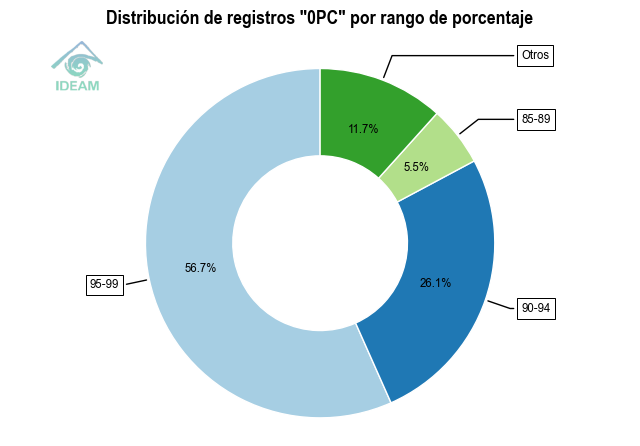

In [10]:
# Generar gráfico por rango de porcentajes obtenidos de '0PC'
# Se crean los rangos de 10 en 10
#bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# Opción de rangos de 5 en 5
en5 = range(0, 106, 5)  # Añadir un bin adicional al final
n5 = list(en5)
bins = n5
labels = [f'{i}-{i + 4}' for i in range(0, 101, 5)]
dfflag['RangPerc0PC'] = pd.cut(dfflag['Per_0PC'], bins=bins, labels=labels, right=False)
sizes = dfflag['RangPerc0PC'].value_counts()
print(sizes)

# Convirtiendo a DataFrame para mejor manejo
df = pd.DataFrame({'Rangos': labels, 'Valores': sizes})

# Calcula el total y el umbral
total = df['Valores'].sum()
threshold = 0.03  # 3%
total = sizes.sum()

# Filtrar aquellos que cumplen con el umbral
mask = sizes/total >= threshold

# Las categorías y valores que cumplen con el umbral
filtered_labels = sizes.index[mask].tolist()
filtered_values = sizes.values[mask].tolist()

# La suma de las categorías que NO cumplen con el umbral
remaining_sum = sizes[~mask].sum()

# Añadir la categoría 'Otros' si hay valores que cumplen el umbral
if remaining_sum > 0:
    filtered_labels.append('Otros')
    filtered_values.append(remaining_sum)

# Colores
colors = plt.cm.Paired(range(len(filtered_labels)))

# Gráfico de torta
fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(filtered_values, labels=None, colors=colors, autopct='%1.1f%%', pctdistance=0.7,
                                  startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))

# Modificar el estilo de los porcentajes
for autotext in autotexts:
    autotext.set_fontname('Arial')
    autotext.set_fontstretch('condensed')

# Estilo para las etiquetas
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# Colocar etiquetas con líneas
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(filtered_labels[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.15*y),
                horizontalalignment=horizontalalignment, fontname='Arial', fontstretch='condensed', **kw)

# Título y formato
plt.title('Distribución de registros "0PCO" por rango de porcentaje', fontname='Arial', fontstretch='condensed', 
          fontsize=14, fontweight='bold', y=1.05)
ax.axis('equal')  # Igualar la relación de aspecto para que la torta sea circular

# Cargar el logo IDEAM
logo = mpimg.imread('Ideam_(Colombia)_logo.png')

# Agregar el logo en la esquina superior izquierda
newax = fig.add_axes([0.04, 0.8, 0.2, 0.1], anchor='NE', zorder=1)
newax.imshow(logo, alpha=0.5) 
newax.axis('off')

plt.show()

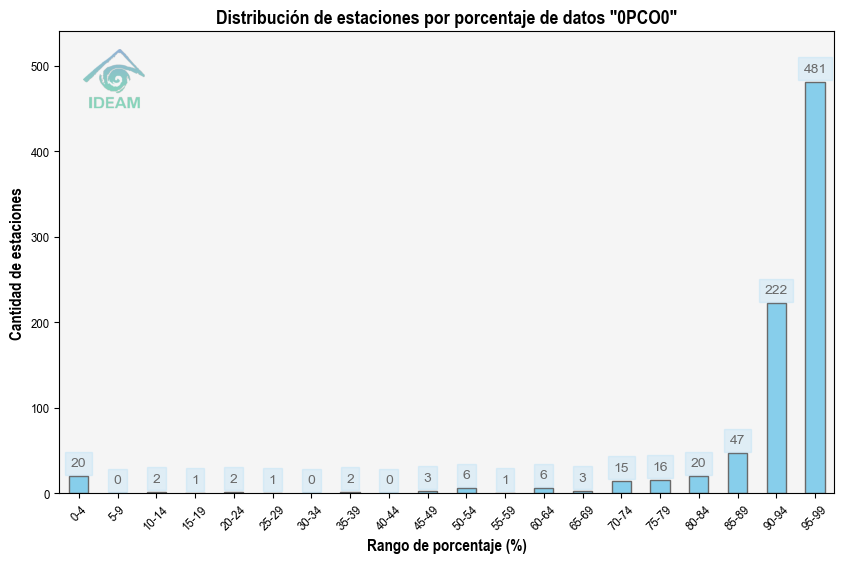

In [11]:
# Generar gráfico por rango de porcentajes obtenidos de '0PC0'
# Se crean los rangos de 10 en 10
#bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# Opción de rangos de 5 en 5
en5 = range(0, 106, 5)  # Añadir un bin adicional al final
n5 = list(en5)
bins = n5
labels = [f'{i}-{i + 4}' for i in range(0, 101, 5)]
dfflag['RangPerc'] = pd.cut(dfflag['Per_0PC'], bins=bins, labels=labels, right=False)


# Crear el gráfico
fig = plt.figure(figsize=(10,6))
ax = dfflag['RangPerc'].value_counts(sort=False).iloc[:-1].plot(kind='bar', color='skyblue', edgecolor='dimgray')
plt.xlabel('Rango de porcentaje (%)', fontname='Arial', fontsize=12, fontweight='bold', fontstretch='condensed')
plt.ylabel('Cantidad de estaciones', fontname='Arial', fontsize=12, fontweight='bold', fontstretch='condensed')
plt.title('Distribución de estaciones por porcentaje de datos "0PCO0"', fontname='Arial', 
          fontsize=14, fontweight='bold', fontstretch='condensed')
plt.xticks(fontname='Arial', fontsize=10, fontstretch='condensed', rotation=45) # si de 5 en 5 rotation=45
plt.yticks(fontname='Arial', fontsize=10, fontstretch='condensed')
plt.ylim(0,540)
ax.set_facecolor('whitesmoke')
#plt.grid(axis='y', linestyle='-', alpha=0.7, color='gainsboro')

color = mcolors.to_rgba('lightskyblue', alpha=0.2)
# Añadir etiquetas de datos
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontname='Arial', color='dimgray', 
             backgroundcolor=color)

# Cargar el logo IDEAM
logo = mpimg.imread('Ideam_(Colombia)_logo.png')

# Agregar el logo en la esquina superior izquierda
newax = fig.add_axes([0.01, 0.75, 0.2, 0.1], anchor='NE', zorder=1)
newax.imshow(logo, alpha=0.5) 
newax.axis('off')

plt.show()

In [12]:
# Exportar los porcentajes
EMARef = pd.read_table('EMA_AllInfo.txt', sep=';',encoding='latin-1')
EMARef.head(2)

Unnamed: 0  OBJECTID   Station     dept_name       lat       long  \
0           0         1  23125170  CUNDINAMARCA  5.333333 -74.016667   
1           1         2  23065120  CUNDINAMARCA  5.142000 -74.139000   

     munic_name                name project FreqInf  ...      LimSup  \
0  SAN CAYETANO  SAN CAYETANO - AUT   IDEAM     10T  ...   78.009126   
1         PACHO          CABRERA LA   IDEAM     10T  ...  149.025936   

   NThsnPol  Altitud   LimSupAlt  RP_ACP LimSup_RP  row_py  col_py  AO_Cod  \
0     T1469   2789.0   97.122673    15.0    277.38    88.0    86.0    11.0   
1      T469   1913.0  125.583923    15.0    277.38    90.0    85.0    11.0   

   Per_0PC  
0    95.24  
1    96.73  

[2 rows x 24 columns]

In [13]:
EMARef.shape

(849, 24)

In [14]:
EMARef.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
distdf = pd.merge(EMARef[['Station', 'name', 'lat','long']], dfflag[['Station','Per_0PC']], on=['Station'], how='left')
distdf

Station                                      name       lat  \
0      23125170                        SAN CAYETANO - AUT  5.333333   
1      23065120                                CABRERA LA  5.142000   
2      37027010                   PE?A DE LOS MICOS - AUT  7.196972   
3      26125501                             GENOVA  - AUT  4.204417   
4    2612500130                             SALENTO - AUT  4.633475   
..          ...                                       ...       ...   
844    25025380  SAN BENITO ABAD - LA MOJANA TX GPRS/GOES  9.164000   
845    23050420                   ARGELIA ANTIOQUIA - AUT  5.731139   
846    16055120                 AGUAS DE LA VIRGEN  - AUT  8.227694   
847    16017020                         LA DONJUANA - AUT  7.687972   
848    35075040              INSTITUCION AGRICOLA MACANAL  4.974361   

          long  Per_0PC  
0   -74.016667    95.21  
1   -74.139000    96.73  
2   -72.424778    99.51  
3   -75.768667    91.71  
4   -75.568858    98.74  
..         ...      ...  
844 -75.045000    91.92  
845 -75.138528    96.60  
846 -73.397500    97.52  
847 -72.605472     0.00  
848 -73.316750    93.11  

[849 rows x 5 columns]

In [16]:
distdf.columns

Index(['Station', 'name', 'lat', 'long', 'Per_0PC'], dtype='object')

In [18]:
distdf.to_csv('EMA_All_Info_PerP0C.csv', encoding='latin-1')

_______

In [10]:
## Revisar dataframes con información de EMA
Alt = pd.read_table('EMA_LimSup_RP_ER_Alt.txt', sep=';')
CDT_AO = pd.read_table('EMA_LimSup_RP_ER_Alt_CDTGr_AO.txt.', sep=';')
PerP0C = pd.read_table('EMA_LimSup_RP_ER_Alt_CDTGr_AO_PerP0C.txt', sep=';')

In [12]:
print(Alt.columns)
print(CDT_AO.columns)
print(PerP0C.columns)

Index(['OBJECTID', 'TARGET_FID', 'Field1', 'Station', 'dept_name', 'lat',
       'long', 'munic_name', 'name', 'project', 'freq', 'Project_1', 'REGIMEN',
       'NEAR_FID', 'NEAR_DIST', 'NEAR_FC', 'LimSup', 'NThsnPol', 'Altitud',
       'LimSupAlt', 'RP_ACP', 'LimSup_RP'],
      dtype='object')
Index(['Unnamed: 0', 'OBJECTID', 'Station', 'brand', 'cod_siapm', 'dept_name',
       'hydrozone', 'lat', 'long', 'lat_D', 'long_D', 'medium', 'munic_name',
       'name', 'offline', 'project', 'Unnamed__0', 'freq', 'Project_1',
       'REGIMEN', 'SZH', 'id', 'left', 'top', 'right', 'bottom', 'row', 'col',
       'row_py', 'col_py', 'AO_Cod', 'Per_0PC'],
      dtype='object')
Index(['Unnamed: 0', 'OBJECTID', 'Station', 'brand', 'dept_name', 'hydrozone',
       'lat', 'long', 'munic_name', 'name', 'project', 'freq', 'Project_1',
       'REGIMEN', 'SZH', 'id', 'row', 'col', 'row_py', 'col_py', 'AO_Cod',
       'Per_0PC'],
      dtype='object')


In [13]:
resultado = pd.merge(Alt, PerP0C[['Station', 'row_py', 'col_py', 'AO_Cod', 'Per_0PC']], 
                     on='Station', 
                     how='left')

In [17]:
resultado.columns

Index(['OBJECTID', 'TARGET_FID', 'Field1', 'Station', 'dept_name', 'lat',
       'long', 'munic_name', 'name', 'project', 'freq', 'Project_1', 'REGIMEN',
       'NEAR_FID', 'NEAR_DIST', 'NEAR_FC', 'LimSup', 'NThsnPol', 'Altitud',
       'LimSupAlt', 'RP_ACP', 'LimSup_RP', 'row_py', 'col_py', 'AO_Cod',
       'Per_0PC'],
      dtype='object')

In [18]:
resultado.head(2)

OBJECTID  TARGET_FID  Field1     Station     dept_name       lat  \
0         1           0       0  23125170.0  CUNDINAMARCA  5.333333   
1         2           1       1  23065120.0  CUNDINAMARCA  5.142000   

        long    munic_name                name project  ...      LimSup  \
0 -74.016667  SAN CAYETANO  SAN CAYETANO - AUT   IDEAM  ...   78.009126   
1 -74.139000         PACHO          CABRERA LA   IDEAM  ...  149.025936   

  NThsnPol Altitud   LimSupAlt  RP_ACP LimSup_RP  row_py col_py  AO_Cod  \
0    T1469  2789.0   97.122673    15.0    277.38    88.0   86.0    11.0   
1     T469  1913.0  125.583923    15.0    277.38    90.0   85.0    11.0   

   Per_0PC  
0    95.24  
1    96.73  

[2 rows x 26 columns]

In [ ]:
resultado.drop(columns=['OBJECTID', 'TARGET_FID', 'Field1','Project_1'])

In [20]:
freqs100 = pd.read_csv('frecinst100b_manual.csv', sep=';')
freqs100.head(2)

Unnamed: 0   Station FreqInf  Instituc Observ
0           0  11017020     NaN     IDEAM    NaN
1           1  11025501      5T  CENICAFE    NaN

In [15]:
resultado.to_csv('EMA_LimSup_RP_ER_Alt_CDTGr_AO_0PC.txt', sep=';')

In [2]:
allin = pd.read_table('EMA_LimSup_RP_ER_Alt_CDTGr_AO_0PC.txt', sep=';')

In [3]:
allin.head(2)

Unnamed: 0  OBJECTID  TARGET_FID  Field1     Station     dept_name  \
0           0         1           0       0  23125170.0  CUNDINAMARCA   
1           1         2           1       1  23065120.0  CUNDINAMARCA   

        lat       long    munic_name                name  ...      LimSup  \
0  5.333333 -74.016667  SAN CAYETANO  SAN CAYETANO - AUT  ...   78.009126   
1  5.142000 -74.139000         PACHO          CABRERA LA  ...  149.025936   

  NThsnPol Altitud   LimSupAlt  RP_ACP  LimSup_RP row_py  col_py AO_Cod  \
0    T1469  2789.0   97.122673    15.0     277.38   88.0    86.0   11.0   
1     T469  1913.0  125.583923    15.0     277.38   90.0    85.0   11.0   

   Per_0PC  
0    95.24  
1    96.73  

[2 rows x 27 columns]

In [6]:
Alt2 = pd.read_table('EMA_LimSup_RP_ER_Alt.txt', sep=';')
Alt2.head(2)

OBJECTID  TARGET_FID  Field1     Station     dept_name       lat  \
0         1         0.0     0.0  23125170.0  CUNDINAMARCA  5.333333   
1         2         1.0     1.0  23065120.0  CUNDINAMARCA  5.142000   

        long    munic_name                name project  ... REGIMEN NEAR_FID  \
0 -74.016667  SAN CAYETANO  SAN CAYETANO - AUT   IDEAM  ...    Bm-3   1469.0   
1 -74.139000         PACHO          CABRERA LA   IDEAM  ...    Bm-3    469.0   

      NEAR_DIST               NEAR_FC      LimSup NThsnPol  Altitud  \
0  12584.560524  EMC_PrecipHistJB3_ON   78.009126    T1469   2789.0   
1     63.353583  EMC_PrecipHistJB3_ON  149.025936     T469   1913.0   

    LimSupAlt  RP_ACP  LimSup_RP  
0   97.122673    15.0     277.38  
1  125.583923    15.0     277.38  

[2 rows x 22 columns]

In [7]:
# Concatenar los DataFrames a lo largo de las filas
result = pd.concat([allin, Alt2.iloc[-2:]], axis=0, ignore_index=True)

In [54]:
result.head(2)

OBJECTID   Station     dept_name       lat       long    munic_name  \
0         1  23125170  CUNDINAMARCA  5.333333 -74.016667  SAN CAYETANO   
1         2  23065120  CUNDINAMARCA  5.142000 -74.139000         PACHO   

                 name project freq REGIMEN  ...      LimSup  NThsnPol Altitud  \
0  SAN CAYETANO - AUT   IDEAM  10T    Bm-3  ...   78.009126     T1469  2789.0   
1          CABRERA LA   IDEAM         Bm-3  ...  149.025936      T469  1913.0   

    LimSupAlt RP_ACP  LimSup_RP  row_py  col_py  AO_Cod  Per_0PC  
0   97.122673   15.0     277.38    88.0    86.0    11.0    95.24  
1  125.583923   15.0     277.38    90.0    85.0    11.0    96.73  

[2 rows x 23 columns]

In [12]:
result.drop(columns=['Unnamed: 0','col_py','Field1','TARGET_FID','Project_1'],inplace=True)

In [ ]:
result['Station'] = result['Station'].astype('int64')

In [20]:
result['freq'].value_counts()

freq
10T    635
5T     101
        62
H       34
T       16
15T      1
Name: count, dtype: int64

In [48]:
freqs = pd.read_csv('frecinst100b_manual_comp.csv', sep=';')
freqs

Unnamed: 0     Station FreqInf  Instituc Observ
0             0    11017020     10T     IDEAM    NaN
1             1    11025501      5T  CENICAFE    NaN
2             2    11027030     10T     IDEAM    NaN
3             3    11027070     10T     IDEAM    NaN
4             4    11030010     10T     IDEAM    NaN
..          ...         ...     ...       ...    ...
843         843  5204700100     10T     IDEAM    NaN
844         844  5205500123     10T     IDEAM    NaN
845         845  5311500056     10T     IDEAM    NaN
846         846  5311500121     10T     IDEAM    NaN
847         847  5311700154     10T     IDEAM    NaN

[848 rows x 5 columns]

In [49]:
# Utilizar merge para combinar los DataFrames basados en la columna 'codigo_referencia'
df1 = result.merge(freqs[['Station','FreqInf']], on='Station', how='left')

# Eliminar la columna 'nueva_columna' si ya no es necesaria
df1.drop('freq', axis=1, inplace=True)

In [50]:
df1

OBJECTID     Station           dept_name       lat       long  \
0           1    23125170        CUNDINAMARCA  5.333333 -74.016667   
1           2    23065120        CUNDINAMARCA  5.142000 -74.139000   
2           3    37027010  NORTE DE SANTANDER  7.196972 -72.424778   
3           4    26125501             QUIND?O  4.204417 -75.768667   
4           5  2612500130             QUIND?O  4.633475 -75.568858   
..        ...         ...                 ...       ...        ...   
844       845    25025380               SUCRE  9.164000 -75.045000   
845       846    23050420           ANTIOQUIA  5.731139 -75.138528   
846       847    16055120  NORTE DE SANTANDER  8.227694 -73.397500   
847       848    16017020  NORTE DE SANTANDER  7.687972 -72.605472   
848       849    35075040              BOYACÁ  4.974361 -73.316750   

          munic_name                                      name   project  \
0       SAN CAYETANO                        SAN CAYETANO - AUT     IDEAM   
1              PACHO                                CABRERA LA     IDEAM   
2             TOLEDO                   PE?A DE LOS MICOS - AUT     IDEAM   
3             G?NOVA                             GENOVA  - AUT  CENICAFE   
4            SALENTO                             SALENTO - AUT     IDEAM   
..               ...                                       ...       ...   
844  SAN BENITO ABAD  SAN BENITO ABAD - LA MOJANA TX GPRS/GOES     IDEAM   
845          ARGELIA                   ARGELIA ANTIOQUIA - AUT     IDEAM   
846            OCA?A                 AGUAS DE LA VIRGEN  - AUT     IDEAM   
847        BOCHALEMA                         LA DONJUANA - AUT     IDEAM   
848          MACANAL              INSTITUCION AGRICOLA MACANAL     IDEAM   

    REGIMEN  NEAR_FID  ...  NThsnPol Altitud   LimSupAlt RP_ACP  LimSup_RP  \
0      Bm-3    1469.0  ...     T1469  2789.0   97.122673   15.0    277.380   
1      Bm-3     469.0  ...      T469  1913.0  125.583923   15.0    277.380   
2     Mm-1B    1252.0  ...     T1252  1203.0  147.538025   12.0    368.000   
3      Bm-5     872.0  ...      T872  1629.0  119.744186   14.0    338.100   
4      Bm-5     868.0  ...      T868  1968.0  147.139664   14.0    338.100   
..      ...       ...  ...       ...     ...         ...    ...        ...   
844   Mm-1A     783.0  ...      T783    91.0  136.600998    6.0    323.035   
845    Bm-5     904.0  ...      T904  1716.0  151.073059   14.0    338.100   
846    Bm-4     181.0  ...      T181  1668.0  122.019859    8.0    299.460   
847    Bm-4       NaN  ...      T149   721.0  152.470000    8.0    299.460   
848   Mm-1B       NaN  ...     T1192  1742.0  113.633240   12.0    368.000   

     row_py  col_py  AO_Cod  Per_0PC  FreqInf  
0      88.0    86.0    11.0    95.24      10T  
1      90.0    85.0    11.0    96.73      10T  
2      69.0   102.0     8.0    99.60      10T  
3      99.0    68.0     9.0    91.73       5T  
4      95.0    70.0     9.0    98.97      10T  
..      ...     ...     ...      ...      ...  
844    49.0    76.0     2.0    91.80      10T  
845    84.0    75.0     1.0    96.73      10T  
846    59.0    92.0     8.0    97.57      10T  
847     NaN     NaN     NaN      NaN      10T  
848     NaN     NaN     NaN      NaN      10T  

[849 rows x 23 columns]

In [51]:
# Lista con el nuevo orden deseado de las columnas
new_column_order = ['OBJECTID','Station','dept_name','lat','long','munic_name','name','project','FreqInf']  # Define el nuevo orden

# Obtiene las columnas que no están en new_column_order
other_columns = [col for col in df1.columns if col not in new_column_order]

# Combina las columnas en el nuevo orden
df1 = df1[new_column_order + other_columns]

In [52]:
df1.columns

Index(['OBJECTID', 'Station', 'dept_name', 'lat', 'long', 'munic_name', 'name',
       'project', 'FreqInf', 'REGIMEN', 'NEAR_FID', 'NEAR_DIST', 'NEAR_FC',
       'LimSup', 'NThsnPol', 'Altitud', 'LimSupAlt', 'RP_ACP', 'LimSup_RP',
       'row_py', 'col_py', 'AO_Cod', 'Per_0PC'],
      dtype='object')

In [57]:
df1.loc[848]

OBJECTID                               849
Station                           35075040
dept_name                           BOYACÁ
lat                               4.974361
long                             -73.31675
munic_name                         MACANAL
name          INSTITUCION AGRICOLA MACANAL
project                              IDEAM
FreqInf                                10T
REGIMEN                              Mm-1B
NEAR_FID                               NaN
NEAR_DIST                              NaN
NEAR_FC                                NaN
LimSup                          149.080293
NThsnPol                             T1192
Altitud                             1742.0
LimSupAlt                        113.63324
RP_ACP                                12.0
LimSup_RP                            368.0
row_py                                 NaN
col_py                                 NaN
AO_Cod                                 NaN
Per_0PC                                NaN
Name: 848, 

In [58]:
df1.loc[[847], ['row_py', 'col_py']] = [65, 101]

In [59]:
df1.loc[[848], ['row_py', 'col_py']] = [91, 93]

In [61]:
df1.loc[[847], ['AO_Cod']] = 8.0
df1.loc[[848], ['AO_Cod']] = 6.0

In [62]:
df1.tail(2)

OBJECTID   Station           dept_name       lat       long munic_name  \
847       848  16017020  NORTE DE SANTANDER  7.687972 -72.605472  BOCHALEMA   
848       849  35075040              BOYACÁ  4.974361 -73.316750    MACANAL   

                             name project FreqInf REGIMEN  ...      LimSup  \
847             LA DONJUANA - AUT   IDEAM     10T    Bm-4  ...  172.205894   
848  INSTITUCION AGRICOLA MACANAL   IDEAM     10T   Mm-1B  ...  149.080293   

     NThsnPol Altitud  LimSupAlt RP_ACP  LimSup_RP  row_py  col_py  AO_Cod  \
847      T149   721.0  152.47000    8.0     299.46    65.0   101.0     8.0   
848     T1192  1742.0  113.63324   12.0     368.00    91.0    93.0     6.0   

     Per_0PC  
847      NaN  
848      NaN  

[2 rows x 23 columns]

In [64]:
df1.to_csv('EMA_AllInfo.txt', sep=';', encoding='latin-1')

___

In [3]:
## Analizar presencia de '0PSO1'
# Cambia este directorio al lugar donde tengas tu carpeta 'ReadytoCassandraFiles'
directorio = r'C:\Users\user\Documents\IDEAM\2023\Obligaciones_Especificas\OE_2_ImplemCriteriosValidacion_EstAutom_Umbrales\DatosEMA_Crudos_Precip\ReadytoCassandraFiles'

# Lista para almacenar los nombres de los archivos que contienen '0PSO1' en la columna 'Estado'
archivos_con_0PSO1 = []

# Itera sobre cada archivo en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'):
        # Construye la ruta completa al archivo
        ruta_archivo = os.path.join(directorio, archivo)
        
        # Lee el archivo CSV en un DataFrame de pandas
        # Especifica los tipos de dato para las columnas deseadas
        tipos_de_dato = {'Estado': str, 'Estado_Anterior': str}
        df = pd.read_csv(ruta_archivo, dtype=tipos_de_dato)
        
        # Checa si '0PSO1' está en la columna 'Estado'
        if '0PSO1' in df['Estado'].values:
            archivos_con_0PSO1.append(archivo)

# Imprime los nombres de los archivos que contienen '0PSO1' en la columna 'Estado'
print('Archivos que contienen "0PSO1" en la columna "Estado":')
for archivo in archivos_con_0PSO1:
    print(archivo)

Archivos que contienen "0PSO1" en la columna "Estado":


____

## Modificaciones a dataframes

In [16]:
def borrar_datos_0PAT(archivos):

    for archivo in archivos:
        # Leer el archivo CSV en modo iterador y especificar los tipos de datos
        reader = pd.read_csv(archivo, iterator=True, dtype={'Station': str, 'Estado': str}, chunksize=70000, 
                             encoding='latin-1')

        # Inicializar una lista para almacenar los DataFrames de cada chunk modificado
        nuevos_chunks = []

        for chunk in reader:
            # Reemplazar '0PAT' seguido de 0, 1, 2, o 3 con una cadena vacía en la columna 'Estado'
            chunk['Estado'] = chunk['Estado'].str.replace(r'0PAT[0-3]', '', regex=True)

            # Agregar el nuevo chunk a la lista
            nuevos_chunks.append(chunk)

        # Concatenar los nuevos chunks en un único DataFrame
        nuevo_dataframe = pd.concat(nuevos_chunks, ignore_index=True)

        # Guardar el nuevo DataFrame en el mismo archivo
        nuevo_dataframe.to_csv(archivo,encoding='latin-1', index=False)

# Ruta de la carpeta con los archivos CSV
carpeta = 'RawUnmodified'

# Obtener la lista de archivos en la carpeta
archivos = [os.path.join(carpeta, archivo) for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]

# Llamar a la función para borrar los datos '0PAT'
borrar_datos_0PAT(archivos)

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288566.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\user\AppData\Local\Temp\ipykernel_16828\889288

In [13]:
Ejem = pd.read_csv('DatosEjemplo2/Estacion_0011027030_paresultado.csv', encoding='latin-1')
Ejem

Unnamed: 0   Station            Name  Sensor                Fecha  \
0          5340818  11027030  EL SIETE - AUT     240  2018-03-09 13:00:00   
1          5340819  11027030  EL SIETE - AUT     240  2018-03-09 13:10:00   
2          5340820  11027030  EL SIETE - AUT     240  2018-03-09 13:20:00   
3          2696074  11027030  EL SIETE - AUT     240  2018-09-03 13:23:00   
4          2696075  11027030  EL SIETE - AUT     240  2018-09-03 13:30:00   
...            ...       ...             ...     ...                  ...   
215000      358143  11027030  EL SIETE - AUT     240  2023-01-12 05:50:00   
215001      358144  11027030  EL SIETE - AUT     240  2023-01-12 06:00:00   
215002      358145  11027030  EL SIETE - AUT     240  2023-01-12 06:10:00   
215003      358146  11027030  EL SIETE - AUT     240  2023-01-12 06:20:00   
215004      358147  11027030  EL SIETE - AUT     240  2023-01-12 06:30:00   

        Valor Estado  Estado_Anterior Fecha_DPluv  Valor_sum  Valor_sum.1  \
0         0.0  0PSO0              NaN  2018-03-09        0.0          0.0   
1         0.0  0PSO0              NaN  2018-03-09        0.0          0.0   
2         0.0  0PSO0              NaN  2018-03-09        0.0          0.0   
3         0.6  0PSO0              NaN  2018-09-03        2.4          2.4   
4         0.0  0PSO0              NaN  2018-09-03        2.4          2.4   
...       ...    ...              ...         ...        ...          ...   
215000    0.0  0PSO0              NaN  2023-01-11        2.8          2.8   
215001    0.0  0PSO0              NaN  2023-01-11        2.8          2.8   
215002    0.0  0PSO0              NaN  2023-01-11        2.8          2.8   
215003    0.0  0PSO0              NaN  2023-01-11        2.8          2.8   
215004    0.0  0PSO0              NaN  2023-01-11        2.8          2.8   

           cdt_max   cdt_perc  
0       131.884857   0.000000  
1       131.884857   0.000000  
2       131.884857   0.000000  
3       142.932587   7.407407  
4       142.932587   7.407407  
...            ...        ...  
215000  134.741455  16.549296  
215001  134.741455  16.549296  
215002  134.741455  16.549296  
215003  134.741455  16.549296  
215004  134.741455  16.549296  

[215005 rows x 13 columns]

In [14]:
Ejem['Estado'].value_counts()

Estado
0PSO0    939
0PER0     16
Name: count, dtype: int64